# D214 Capstone
# Task 2: Analytics Report

Petra I Bier

Western Governors University

Capstone Project for WGU MSDA program

April 2, 2025

Dr. Daniel Smith, PhD

------------------------------

## Table of Contents
* [**A: Research Question**](#A:-Research-Question)

* [**B: Data Collection**](#B:-Data-Collection)

* [**C: Data Extraction and Preparation**](#C:-Data-Extraction-and-Preparation)
  * [C1: Data Handling and Exploration](#C1:-Data-Handling-and-Exploration)
  * [C2: Data Preprocessing](#C2:-Data-Preprocessing)

* [**D: Random Forest Regression Analysis**](#D:-Random-Forest-Regression-Analysis)

* [**E: Data Summary and Implications**](#E:-Data-Summary-and-Implications)

* [**Appendix**](#Appendix:-Random-Forest-with-SMOTER-Oversampling)

* [**F: Sources**](#F:-Sources)



## A: Research Question

The context of this analysis is the common usage of SpO2 in hospitals and clinics. SpO2 is a convenient, non-invasive measurement of the blood's oxygen levels. A major benefit of SpO2 reading is that it can be done continuously at a low cost. This stands in contrast to the gold standard for blood oxygen saturation measurement, SaO2, which is collected via arterial blood gas (ABG). This is an invasive procedure where blood is drawn from an artery with inherent risks, such as bleeding, infection, and blood clots. Since it is not a continuous measurement, multiple draws are often required.

Research has demonstrated that SpO2 does not always correlate accurately with SaO2, especially at lower levels (Sjoding et al., 2023). Hidden hypoxemia, which is when SpO2 is > 88% yet the SaO2 is < 88%, may be present and remain undetected if solely relying on SpO2 readings, leading to inaccurate diagnosis and delayed treatment of hypoxemia. This, in turn, can lead to extended hospitalizations and poor patient outcomes.

Building a statistical model to predict the SaO2 value that uses only non-invasive measurement could lead to improved hypoxemia diagnosis while reducing the risks associated with arterial access. Venous blood draws are a common method used to obtain lab measurements and are frequently done in conjunction when starting intravenous (IV) treatments. The skills and risks associated with venous access are significantly lower than arterial draws and measurements, allowing smaller hospitals and clinics the ability to use these methods easily.

The goal of this analysis is to answer the question: Can a random forest regression (RFR) model predict the difference between a pulse oximeter (SpO2) and arterial oxygen saturation (SaO2) reading using the given data set?

For this analysis the null and alternative hypothesis are as follows:

> Null hypothesis- A random forest model cannot detect the difference between the SpO2 and the SaO2 with an RMSE of less than 3 percentage points.

> Alternate Hypothesis- A random forest model can detect the difference between the SpO2 and the SaO2 with an RMSE of less than 3 percentage points.

A random forest regression model will be used to analyze non-linear relationships from the chosen predictor variables to predict SpO2 accuracy in alignment with the FDA error requirements. A predictive model that can predict the SpO2 – SaO2 gap to determine the accuracy of the SpO2 measurement will be created and evaluated.
The FDA requires that pulse oximetry is accurate withing 2-3% of SaO2 levels only two-thrids of the time (Wong et al., 2021). This value aligns with the hypotheses testing of 3% RMSE, which is equivalent to three percentage points of SpO2.


## B: Data Collection

The data used for this analysis was sourced from the Physionet BOLD data set (Goldberger et al., 2000; Matos et al., 2023a). The data was accessed after completing the required training and data usage agreement (DUA). The training included topics of ethics, privacy principals and HIPPA compliance. While Physionet does have data that can be considered identifiable, this particular data set was de-identified for public usage. It was also deemed exempt from human subject research.
The data was collected from three Electronic Health Record (EHR) databases (MIMIC-III, MIMIC-IV, eICU-CRD). These are large, publicly available data sets that have retrospectively gathered data from ICUs at large hospitals, and all patient information had been de-identified within each database.
The eICU Collaborative Database is data collected from EHR data from 200,000 admissions between 2014–2015. The Medical Information Mart for Intensive Care (MIMIC)-III database contains de-identified information collected from 40,000 EHR records from the Beth Israel Deaconess Medical Center (BIDMC) between 2001 and 2012. MIMIC-IV data was also sourced from BIDMC from 2008–2009.  The overlap between the dataset was addressed and delt with through tracking and matching of the original patient identifiers, which were then dropped for unique identifiers to this data set.
The blood-gas and oximetry linked dataset (BOLD) found SpO2 readings that were aligned with SaO2 readings taken within a five-minute time frame.  Any oxygen saturation reading not within the 70–100% range was not collected for this dataset. Variables across the three datasets were standardized, with only those available across all databases being used to reduce the number of null values. After synchronization of all variables was done across the three sets of data, they were then merged into the single data frame.
All physiologic measurements were recorded in time in relation to the time the ABG was drawn. These times were recorded as “delta_” values. BMI values were calculated based on the admission height and weight entered. The Sequential Organ Failure (SOFA) score was also calculated from the newly combined data set.
The original data set had 49,093 rows and 142 variables. It contained approximately 1,719,765 NaN values out of 6,971,206 total values (24.67%). It was presented in a CSV file with an accompanying PDF for the data dictionary. A link to the data set can be found here:

https://physionet.org/content/blood-gas-oximetry/1.0/

An advantage of using this data set was the ease of access to a large volume of information. A disadvantage was that though the data set was extensive, the user has little control of the variables chosen. Without direct control of what the variables were, the analyst must base the analysis on the data at hand. Several important variables were not included in this data set. To mitigate this problem, [feature engineering](#Feature-Engineering) was used to create several variables from the given data.

Columns created through feature engineering:
- Gap: Target variable, SpO2 - SaO2
- Oxygen carrying capacity (Grippi, 2020): Hemoglobin x 1.34
- BUN/ Creatinine ratio: BUN/ Creatinine
- Predicted body weight (PBW)(ARDSNet Protocol Card, 2025):
  - Male: 50 + 0.91 × (Height − 152.4)
  - Female: 45.5 + 0.91 × (Height − 152.4)

The final variables used in the analysis included:
- Demographics:
  - Age, Sex, Ethnicity
- Vital signs:
  - SpO2, heart rate, systolic blood pressure (SBP), mean blood pressure (MBP)
  - Respirations, temperature
  - Weight, height, body mass index (BMI)
- Laboratory values:
  - Blood cell metrics: hemoglobin, hematocrit, MCH, MCHC, MCV, RBC, RDW, white blood cells
  - Electrolytes: sodium, potassium, bicarbonate, anion gap, calcium
  - Metabolic/ Kidney: BUN, creatinine, glucose, lactate, albumin
  - Liver function: ALP, ALT, AST

A challenge during data cleaning was the handling of outliers. While some extreme values might represent errors, others capture rare but clinically significant cases. This analysis aimed to identify these potentially meaningful events. Distinguishing between erroneous outliers and non-error values required careful attention. A considerable amount of time was spent evaluating the values by hand, as well as researching and applying domain knowledge when setting outlier limits.

After cleaning and feature engineering, the final data set contained 49,093 rows and 38 columns. The [sparsity](#Clean-Data-Sparsity) of the cleaned data frame was 19.15%.


## C: Data Extraction and Preparation

> **Note**: All code is presented in this notebook and is used as an equivalent to the requested screenshots for proof of work. Explanations have also been provided throughout the notebook to further explain the steps taken in the handling of the data prior to the building of the model. These can be seen interspersed between different code cells.

The programming language and environment for the RFR analysis will be Python using a Jupyter Notebook in Pycharm. Python was chosen for its ease of use and the large number of open-source libraries. It is easily scalable for large and small projects, and is strong in general software engineering, allowing analysis tools to be easily integrated into applications and websites. A disadvantage to using python is it can have longer run times since it is an interpreted language rather than a compiled language (McKinney, 2022).

Jupyter Notebooks offers advantages through its cell-by-cell execution of code. Visualizations appear directly below the executed code, which facilitates the exploratory phase of analysis. A downfall is that a non-linear workflow can be created, leading to errors during execution of the code and inconsistencies in the analysis process.

PyCharm is an integrated development environment (IDE) with strong support for virtual environments and package management. Virtual environments allow for the use of different versions of packages without altering the native python package on a device. A disadvantage to PyCharm is the steeper learning curve, as it is not as intuitive as other IDEs. It also does not have improved text capabilities, having only Markdown capabilities for text cells.

The data was extracted and prepared using several different packages and libraries:

- Pandas
- NumPy
- Matplotlib
- Seaborn
- SciPy Stats
- SciKit- Learn
- SMOGN


#### C1: Data Handling and Exploration

The Pandas package was used to import and create the data frame. This library is known for its flexibility in creating and manipulating data structures. Unfortunately, it can be memory intensive when dealing with large data sets.
- import pandas as pd

NumPy can do computations on entire arrays, which often negates the need to code loops for calculations. The SciKit-Learn package is built upon NumPy due to its computational functionality, which was the main use in this RFR analysis. A disadvantage of this package is the limited functionality in comparison to Pandas for advanced data analysis.
- import numpy as np

For visual data exploration, the Matplotlib and Seaborn libraries were [used](#Visualize-the-missing-data). Matplotlib has a high level of customization but can become very verbose when creating more complex figures. Seaborn is built on top of Matplotlib, and does well at creating appealing visualizations, but can be challenging to customize. The two libraries are often used in conjunction with one another.
- import matplotlib.pyplot as plt
- import seaborn as sns


In [1]:
# Set up of notebook
import pandas as pd # used to create the dataframe
import numpy as np  #Required dependency for scikit.learn to run
import matplotlib.pyplot as plt # to visualize the data
import seaborn as sns #Used to visualize the data
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats.mstats import winsorize
from sklearn.experimental import enable_iterative_imputer # required to run IterativeImputer
from sklearn.impute import IterativeImputer #Imputation of Nans
from sklearn.linear_model import BayesianRidge #Type of imputation
import smogn #Synthetic Minority Over-sampling Technique for Regression with Gaussian Noise
from sklearn.ensemble import RandomForestRegressor # Random forest model
from sklearn.feature_selection import SelectFromModel # to select the most important features form the RFR model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import tree # Visualize the first tree
import optuna # Study for hyperparameter tuning
import joblib # Save outputs
import shap # SHapley Additive exPlanations
pd.options.mode.chained_assignment = None # Needed for SHAP

##### Import the data set using _pandas_

> **Note:** The output of the following cell is an expected _warning_ on memory, _not an error_.

In [2]:
#Import data set as a pandas data frame
df_hypox = pd.read_csv('/Users/petrabier/PycharmProjects/Capstone_data/bold_dataset.csv')
df_hypox.head()

/var/folders/v1/tqzcgz_96q16zh33lz92brt40000gq/T/ipykernel_17665/2896418354.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_hypox = pd.read_csv('/Users/petrabier/PycharmProjects/Capstone_data/bold_dataset.csv')


,unique_subject_id,unique_hospital_admission_id,unique_icustay_id,subject_id,hospital_admission_id,icustay_id,source_db,hospitalid,numbedscategory,teachingstatus,...,delta_sofa_future_coagulation_24hr,sofa_future_coagulation_24hr,delta_sofa_future_liver_24hr,sofa_future_liver_24hr,delta_sofa_future_cardiovascular_24hr,sofa_future_cardiovascular_24hr,delta_sofa_future_cns_24hr,sofa_future_cns_24hr,delta_sofa_future_renal_24hr,sofa_future_renal_24hr
0,0,0,0,002-10050,183274,211144,eicu,71,100 - 249,False,...,1525.0,1.0,1525.0,0.0,1525.0,1.0,1525.0,0.0,1525.0,0.0
1,1,1,1,002-1007,178462,204935,eicu,71,100 - 249,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,2,002-10187,150828,169525,eicu,73,>= 500,True,...,1547.0,0.0,1547.0,0.0,1547.0,1.0,1547.0,0.0,1547.0,0.0
3,3,3,3,002-10306,198249,230427,eicu,63,100 - 249,False,...,1507.0,2.0,1507.0,0.0,1507.0,1.0,1507.0,0.0,1507.0,1.0
4,4,4,4,002-10324,188445,217835,eicu,73,>= 500,True,...,1537.0,1.0,1537.0,0.0,1537.0,1.0,1537.0,2.0,1537.0,0.0


##### After the data was imported, it was explored to understand the variables.

In [3]:
df_hypox.describe()

,unique_subject_id,unique_hospital_admission_id,unique_icustay_id,hospital_admission_id,icustay_id,hospitalid,admission_age,sex_female,weight_admission,height_admission,...,delta_sofa_future_coagulation_24hr,sofa_future_coagulation_24hr,delta_sofa_future_liver_24hr,sofa_future_liver_24hr,delta_sofa_future_cardiovascular_24hr,sofa_future_cardiovascular_24hr,delta_sofa_future_cns_24hr,sofa_future_cns_24hr,delta_sofa_future_renal_24hr,sofa_future_renal_24hr
count,49093.000000,49093.000000,49093.000000,4.909300e+04,4.909300e+04,49093.000000,49091.000000,49093.000000,47989.000000,47809.000000,...,39667.000000,39667.000000,39667.000000,39667.000000,39667.000000,39667.000000,39667.000000,39667.000000,39667.000000,39667.000000
mean,22321.346770,24546.000000,24546.000000,3.714965e+06,5.042749e+06,1390.338867,64.429549,0.436580,85.611319,169.347372,...,1531.717801,0.575113,1531.717801,0.214032,1531.717801,1.405854,1531.717801,1.312502,1531.717801,1.558399
std,12867.699928,14172.072719,14172.072719,7.188941e+06,1.009687e+07,3107.897108,15.800227,0.495967,27.847338,12.872780,...,17.919209,0.852344,17.919209,0.645758,17.919209,1.181412,17.919209,1.414982,17.919209,1.575680
min,0.000000,0.000000,0.000000,1.000680e+05,1.412330e+05,59.000000,14.000000,0.000000,0.000000,0.000000,...,1500.000000,0.000000,1500.000000,0.000000,1500.000000,0.000000,1500.000000,0.000000,1500.000000,0.000000
25%,11127.000000,12273.000000,12273.000000,7.178640e+05,9.740030e+05,188.000000,55.000000,0.000000,67.400000,162.560000,...,1516.000000,0.000000,1516.000000,0.000000,1516.000000,1.000000,1516.000000,0.000000,1516.000000,0.000000
50%,22383.000000,24546.000000,24546.000000,1.286911e+06,1.653949e+06,264.000000,66.000000,0.000000,81.500000,170.000000,...,1533.000000,0.000000,1533.000000,0.000000,1533.000000,1.000000,1533.000000,1.000000,1533.000000,1.000000
75%,33416.000000,36819.000000,36819.000000,2.443592e+06,3.014838e+06,417.000000,76.000000,1.000000,99.000000,177.800000,...,1548.000000,1.000000,1548.000000,0.000000,1548.000000,1.000000,1548.000000,3.000000,1548.000000,3.000000
max,44901.000000,49092.000000,49092.000000,2.999550e+07,3.999574e+07,9999.000000,90.000000,1.000000,771.200000,504.800000,...,1559.000000,4.000000,1559.000000,4.000000,1559.000000,4.000000,1559.000000,4.000000,1559.000000,4.000000


In [4]:
df_hypox.shape

(49093, 142)

In [5]:
df_hypox.info

<bound method DataFrame.info of        unique_subject_id  unique_hospital_admission_id  unique_icustay_id  \
0                      0                             0                  0   
1                      1                             1                  1   
2                      2                             2                  2   
3                      3                             3                  3   
4                      4                             4                  4   
...                  ...                           ...                ...   
49088              44897                         49088              49088   
49089              44898                         49089              49089   
49090              44899                         49090              49090   
49091              44900                         49091              49091   
49092              44901                         49092              49092   

      subject_id  hospital_admission_id  ic

In [6]:
df_hypox.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49093 entries, 0 to 49092
Columns: 142 entries, unique_subject_id to sofa_future_renal_24hr
dtypes: bool(1), float64(122), int64(7), object(12)
memory usage: 52.9+ MB


In [7]:
list(df_hypox.columns.values)

['unique_subject_id',
 'unique_hospital_admission_id',
 'unique_icustay_id',
 'subject_id',
 'hospital_admission_id',
 'icustay_id',
 'source_db',
 'hospitalid',
 'numbedscategory',
 'teachingstatus',
 'region',
 'admission_age',
 'sex_female',
 'weight_admission',
 'height_admission',
 'BMI_admission',
 'datetime_hospital_admit',
 'datetime_hospital_discharge',
 'datetime_icu_admit',
 'datetime_icu_discharge',
 'los_hospital',
 'los_ICU',
 'comorbidity_score_name',
 'comorbidity_score_value',
 'in_hospital_mortality',
 'race_ethnicity',
 'SaO2_timestamp',
 'pH',
 'pCO2',
 'pO2',
 'SaO2',
 'SpO2',
 'Carboxyhemoglobin',
 'Methemoglobin',
 'SpO2_timestamp',
 'delta_SpO2',
 'delta_vitals_heart_rate',
 'vitals_heart_rate',
 'delta_vitals_resp_rate',
 'vitals_resp_rate',
 'delta_vitals_mbp_ni',
 'vitals_mbp_ni',
 'delta_vitals_sbp_ni',
 'vitals_sbp_ni',
 'delta_vitals_dbp_ni',
 'vitals_dbp_ni',
 'delta_vitals_mbp_i',
 'vitals_mbp_i',
 'delta_vitals_sbp_i',
 'vitals_sbp_i',
 'delta_vitals_db

In [8]:
print(df_hypox.duplicated().sum())
print(df_hypox.duplicated().value_counts())

0
False    49093
Name: count, dtype: int64


##### The sparsity of the data was examined.

In [9]:
df_hypox.isna().sum()

unique_subject_id                     0
unique_hospital_admission_id          0
unique_icustay_id                     0
subject_id                            0
hospital_admission_id                 0
                                   ... 
sofa_future_cardiovascular_24hr    9426
delta_sofa_future_cns_24hr         9426
sofa_future_cns_24hr               9426
delta_sofa_future_renal_24hr       9426
sofa_future_renal_24hr             9426
Length: 142, dtype: int64

In [10]:
def analyze_nulls(df):
    total_nulls = df.isna().sum().sum()
    total_cells = df.size
    overall_null_percentage = round((total_nulls / total_cells) * 100, 2)
    print(f"\nTotal number of NaN values in the DataFrame: {total_nulls}")
    print(f"Overall percentage of NaN values: {overall_null_percentage}%")
    return total_nulls, overall_null_percentage

In [11]:
analyze_nulls(df_hypox)


Total number of NaN values in the DataFrame: 1719765
Overall percentage of NaN values: 24.67%


(1719765, 24.67)

All columns that will not be used in the analysis were dropped. Variables that are non-influential on the hypoxia gap calculation, such as mortality, were removed. The focus was on using laboratory values that are easily and commonly obtained with the intent of creating a model that is useful in rural hospitals and clinics.

No "invasive" measurements were included — no arterial blood gas values or arterial vital signs were used. SaO2 was kept for the hidden hypoxia gap measurement and will not be used as a predictor in the RFR model.

In [12]:
df_clean = df_hypox[['admission_age','sex_female','weight_admission', 'height_admission', 'BMI_admission','race_ethnicity','SaO2', 'SpO2','delta_vitals_heart_rate','vitals_heart_rate','delta_vitals_resp_rate','vitals_resp_rate','delta_vitals_mbp_ni','vitals_mbp_ni','delta_vitals_sbp_ni','vitals_sbp_ni','delta_vitals_dbp_ni','delta_vitals_tempc','vitals_tempc','delta_cbc_hemoglobin','cbc_hemoglobin','delta_cbc_hematocrit','cbc_hematocrit','delta_cbc_mch','cbc_mch','delta_cbc_mchc','cbc_mchc','delta_cbc_mcv','cbc_mcv','delta_cbc_platelet','cbc_platelet','delta_cbc_rbc','cbc_rbc','delta_cbc_rdw','cbc_rdw','delta_cbc_wbc','cbc_wbc','delta_bmp_sodium','bmp_sodium','delta_bmp_potassium','bmp_potassium','delta_bmp_chloride','bmp_chloride','delta_bmp_bicarbonate','bmp_bicarbonate','delta_bmp_bun','bmp_bun','delta_bmp_creatinine','bmp_creatinine','delta_bmp_glucose','bmp_glucose','delta_bmp_aniongap','bmp_aniongap','delta_bmp_calcium','bmp_calcium','delta_bmp_lactate','bmp_lactate', 'delta_hfp_alt','hfp_alt','delta_hfp_alp','hfp_alp','delta_hfp_ast','hfp_ast','delta_hfp_albumin', 'hfp_albumin']]

In [13]:
# Verify that columns have been dropped
df_clean.head()

,admission_age,sex_female,weight_admission,height_admission,BMI_admission,race_ethnicity,SaO2,SpO2,delta_vitals_heart_rate,vitals_heart_rate,...,delta_bmp_lactate,bmp_lactate,delta_hfp_alt,hfp_alt,delta_hfp_alp,hfp_alp,delta_hfp_ast,hfp_ast,delta_hfp_albumin,hfp_albumin
0,67.0,1,86.2,160.0,33.671875,White,94.0,97.0,-1.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,83.0,1,NaN,162.6,NaN,White,98.0,95.0,-36.0,135.0,...,NaN,NaN,-546.0,14.0,-546.0,97.0,-546.0,11.0,-546.0,2.6
2,59.0,1,74.1,162.6,28.027033,White,94.0,96.0,-2.0,74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73.0,0,NaN,152.4,NaN,Asian,99.0,100.0,0.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-522.0,2.5
4,57.0,0,NaN,172.7,NaN,White,98.0,97.0,-9.0,94.0,...,NaN,NaN,-1822.0,19.0,-1822.0,60.0,-1822.0,12.0,-1822.0,3.4


##### Visualize the missing data
Missing data was visualized using the _matplotlib.pyplot_ and the _seaborn_ library.

-----------
Return to [C1: Data Extraction and Preparation](#C1:-Data-Extraction-and-Preparation) , [Table of Contents](#Table-of-Contents)

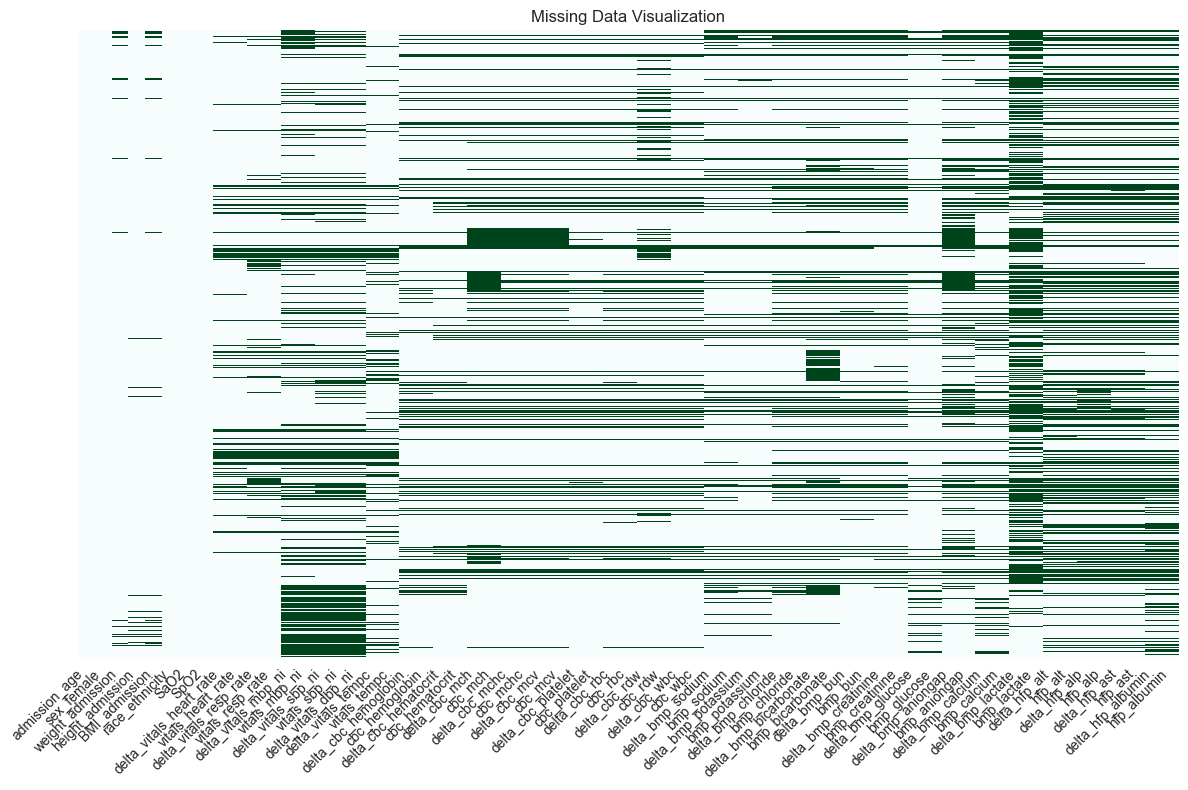

In [14]:
def plot_missing_data(df):
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        df.isnull(),
        cmap='BuGn',
        yticklabels=False,
        cbar=False
    )
    plt.title('Missing Data Visualization')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_missing_data(df_clean)

In [15]:
df_clean.describe()

,admission_age,sex_female,weight_admission,height_admission,BMI_admission,SaO2,SpO2,delta_vitals_heart_rate,vitals_heart_rate,delta_vitals_resp_rate,...,delta_bmp_lactate,bmp_lactate,delta_hfp_alt,hfp_alt,delta_hfp_alp,hfp_alp,delta_hfp_ast,hfp_ast,delta_hfp_albumin,hfp_albumin
count,49091.000000,49093.000000,47989.000000,47809.000000,47108.000000,49093.000000,49093.000000,43643.000000,43643.000000,42217.000000,...,23120.000000,23120.000000,31498.000000,31498.000000,31237.000000,31237.000000,31634.000000,31634.000000,31423.000000,31423.000000
mean,64.429549,0.436580,85.611319,169.347372,200.285514,95.917711,97.137066,-23.353207,89.588365,-25.154203,...,-235.549697,2.757042,-1203.825544,98.536034,-1207.535647,104.793386,-1202.174622,153.505785,-1203.348948,3.060884
std,15.800227,0.495967,27.847338,12.872780,8189.044538,4.180759,3.834850,33.747559,20.402892,36.400583,...,322.631980,2.738231,1808.352051,414.724729,1813.521062,93.436255,1805.695341,799.241998,1825.192870,0.766700
min,14.000000,0.000000,0.000000,0.000000,0.000000,70.000000,70.000000,-240.000000,25.000000,-240.000000,...,-1440.000000,0.200000,-10080.000000,1.000000,-10066.000000,7.000000,-10080.000000,4.000000,-10066.000000,0.600000
25%,55.000000,0.000000,67.400000,162.560000,23.824857,94.600000,96.000000,-30.000000,75.000000,-32.000000,...,-341.000000,1.200000,-1322.000000,17.000000,-1325.000000,63.000000,-1321.750000,20.000000,-1327.000000,2.500000
50%,66.000000,0.000000,81.500000,170.000000,28.058219,97.000000,98.000000,-11.000000,88.000000,-11.000000,...,-97.000000,1.830000,-492.000000,27.000000,-494.000000,83.000000,-491.000000,31.000000,-481.000000,3.100000
75%,76.000000,1.000000,99.000000,177.800000,33.564014,99.000000,100.000000,-4.000000,102.000000,-4.000000,...,0.000000,3.100000,-186.000000,48.000000,-187.000000,116.000000,-186.000000,63.000000,-178.000000,3.600000
max,90.000000,1.000000,771.200000,504.800000,725551.020408,100.000000,100.000000,0.000000,214.000000,0.000000,...,0.000000,29.300000,0.000000,12456.000000,0.000000,2820.000000,0.000000,42606.000000,0.000000,6.300000


In [16]:
list(df_clean.columns.values)

['admission_age',
 'sex_female',
 'weight_admission',
 'height_admission',
 'BMI_admission',
 'race_ethnicity',
 'SaO2',
 'SpO2',
 'delta_vitals_heart_rate',
 'vitals_heart_rate',
 'delta_vitals_resp_rate',
 'vitals_resp_rate',
 'delta_vitals_mbp_ni',
 'vitals_mbp_ni',
 'delta_vitals_sbp_ni',
 'vitals_sbp_ni',
 'delta_vitals_dbp_ni',
 'delta_vitals_tempc',
 'vitals_tempc',
 'delta_cbc_hemoglobin',
 'cbc_hemoglobin',
 'delta_cbc_hematocrit',
 'cbc_hematocrit',
 'delta_cbc_mch',
 'cbc_mch',
 'delta_cbc_mchc',
 'cbc_mchc',
 'delta_cbc_mcv',
 'cbc_mcv',
 'delta_cbc_platelet',
 'cbc_platelet',
 'delta_cbc_rbc',
 'cbc_rbc',
 'delta_cbc_rdw',
 'cbc_rdw',
 'delta_cbc_wbc',
 'cbc_wbc',
 'delta_bmp_sodium',
 'bmp_sodium',
 'delta_bmp_potassium',
 'bmp_potassium',
 'delta_bmp_chloride',
 'bmp_chloride',
 'delta_bmp_bicarbonate',
 'bmp_bicarbonate',
 'delta_bmp_bun',
 'bmp_bun',
 'delta_bmp_creatinine',
 'bmp_creatinine',
 'delta_bmp_glucose',
 'bmp_glucose',
 'delta_bmp_aniongap',
 'bmp_aniongap'

In [17]:
# Check dataframe info
print("DataFrame Info:")
df_clean.info()
# Check if it is a copy or view
print("\nIs df_clean a view?")
print(df_clean._is_view)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49093 entries, 0 to 49092
Data columns (total 65 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   admission_age            49091 non-null  float64
 1   sex_female               49093 non-null  int64  
 2   weight_admission         47989 non-null  float64
 3   height_admission         47809 non-null  float64
 4   BMI_admission            47108 non-null  float64
 5   race_ethnicity           49093 non-null  object 
 6   SaO2                     49093 non-null  float64
 7   SpO2                     49093 non-null  float64
 8   delta_vitals_heart_rate  43643 non-null  float64
 9   vitals_heart_rate        43643 non-null  float64
 10  delta_vitals_resp_rate   42217 non-null  float64
 11  vitals_resp_rate         42217 non-null  float64
 12  delta_vitals_mbp_ni      33626 non-null  float64
 13  vitals_mbp_ni            33626 non-null  float64
 14  delta_

##### Categorical variables were explored using both _NumPy_ and _Pandas_ libraries.

In [18]:
print(df_clean['sex_female'].unique())
print(df_clean['sex_female'].value_counts())

[1 0]
sex_female
0    27660
1    21433
Name: count, dtype: int64


In [19]:
print(df_clean['race_ethnicity'].unique())
print(df_clean['race_ethnicity'].value_counts())

['White' 'Asian' 'Black' 'Unknown' 'American Indian / Alaska Native'
 'Hispanic OR Latino' 'Native Hawaiian / Pacific Islander'
 'More Than One Race']
race_ethnicity
White                                 37380
Black                                  4785
Unknown                                3562
Hispanic OR Latino                     2116
Asian                                   858
American Indian / Alaska Native         380
Native Hawaiian / Pacific Islander        9
More Than One Race                        3
Name: count, dtype: int64


##### All columns with a _delta_ label were dropped.  These columns measured the difference in time that variable measurements were taken in relation to the original SaO2 time.

In [20]:
delta_columns = [col for col in df_clean.columns if 'delta' in col.lower()]
print("Delta columns found:", delta_columns)

Delta columns found: ['delta_vitals_heart_rate', 'delta_vitals_resp_rate', 'delta_vitals_mbp_ni', 'delta_vitals_sbp_ni', 'delta_vitals_dbp_ni', 'delta_vitals_tempc', 'delta_cbc_hemoglobin', 'delta_cbc_hematocrit', 'delta_cbc_mch', 'delta_cbc_mchc', 'delta_cbc_mcv', 'delta_cbc_platelet', 'delta_cbc_rbc', 'delta_cbc_rdw', 'delta_cbc_wbc', 'delta_bmp_sodium', 'delta_bmp_potassium', 'delta_bmp_chloride', 'delta_bmp_bicarbonate', 'delta_bmp_bun', 'delta_bmp_creatinine', 'delta_bmp_glucose', 'delta_bmp_aniongap', 'delta_bmp_calcium', 'delta_bmp_lactate', 'delta_hfp_alt', 'delta_hfp_alp', 'delta_hfp_ast', 'delta_hfp_albumin']


In [21]:
df_dropped = df_clean.drop(delta_columns, axis=1)
df_dropped.shape
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49093 entries, 0 to 49092
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   admission_age      49091 non-null  float64
 1   sex_female         49093 non-null  int64  
 2   weight_admission   47989 non-null  float64
 3   height_admission   47809 non-null  float64
 4   BMI_admission      47108 non-null  float64
 5   race_ethnicity     49093 non-null  object 
 6   SaO2               49093 non-null  float64
 7   SpO2               49093 non-null  float64
 8   vitals_heart_rate  43643 non-null  float64
 9   vitals_resp_rate   42217 non-null  float64
 10  vitals_mbp_ni      33626 non-null  float64
 11  vitals_sbp_ni      34141 non-null  float64
 12  vitals_tempc       41134 non-null  float64
 13  cbc_hemoglobin     42297 non-null  float64
 14  cbc_hematocrit     42360 non-null  float64
 15  cbc_mch            38072 non-null  float64
 16  cbc_mchc           398

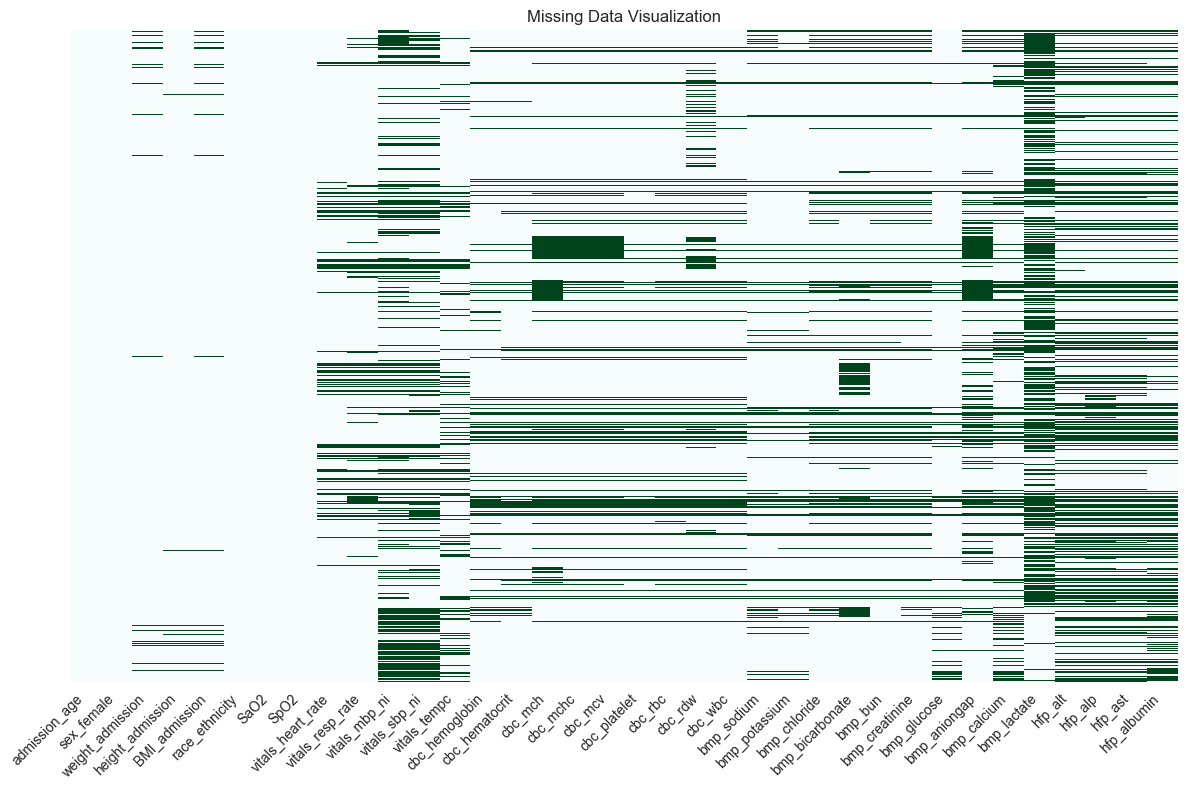

In [22]:
plot_missing_data(df_dropped)

In [23]:
# Examine smaller dataframe
df_dropped.head()

,admission_age,sex_female,weight_admission,height_admission,BMI_admission,race_ethnicity,SaO2,SpO2,vitals_heart_rate,vitals_resp_rate,...,bmp_bun,bmp_creatinine,bmp_glucose,bmp_aniongap,bmp_calcium,bmp_lactate,hfp_alt,hfp_alp,hfp_ast,hfp_albumin
0,67.0,1,86.2,160.0,33.671875,White,94.0,97.0,83.0,23.0,...,NaN,NaN,133.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,83.0,1,NaN,162.6,NaN,White,98.0,95.0,135.0,16.0,...,87.0,4.40,194.0,20.0,8.3,NaN,14.0,97.0,11.0,2.6
2,59.0,1,74.1,162.6,28.027033,White,94.0,96.0,74.0,15.0,...,16.0,0.45,135.0,15.0,8.0,NaN,NaN,NaN,NaN,NaN
3,73.0,0,NaN,152.4,NaN,Asian,99.0,100.0,83.0,11.0,...,11.0,1.11,119.0,15.0,7.3,NaN,NaN,NaN,NaN,2.5
4,57.0,0,NaN,172.7,NaN,White,98.0,97.0,94.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,19.0,60.0,12.0,3.4


In [24]:
df_dropped.shape

(49093, 36)

### C2: Data Preprocessing

The data required preprocessing before it could be used in the RFR model. The majority of preprocessing was done with the SciKit – Learn package. This package is well established and works well with Pandas and NumPy, although it is known to prioritize ease of use over performance.

Further examination was done through visualizing the  distribution using [plot distributions](#Distribution-plots) and quantile-quantile(Q-Q) plots. [Q-Q plots](#Q-Q-Plots) show if the data has a normal distribution. Large data sets may not always have normal data, since the large number of values can actually skew the data (Varshney, 2023). Random Forest models work well with data that does not have a normal distribution and can look for non-linear relationships between data points.
The data was split early in the analysis to prevent data leakage (Brownlee, 2020). This function allowed for the splitting of the data using a single line of code. A disadvantage of using this function is that it may not be well suited to imbalanced data sets.

- from sklearn.model_selection import train_test_split

[Outliers](#Outliers) were identified and managed using winsorization. This was done using the SciPy package. The winsorization technique maintains the statistical power of the data while dealing with extreme outliers. To set the thresholds at appropriate values, it may be necessary to evaluate the variables individually to reduce the risk of imposing arbitrary values. This is a disadvantage to this technique as it can be time-consuming and requires a high level of domain knowledge.

- from scipy import stats
- from scipy.stats.mstats import winsorize

The data was found to be [imbalanced](#Data-(Im)Balance) meaning there is a significantly unequal distribution between the target variable and the features. This presents a problem as the model will be biased toward the majority since it has little data to learn from about the minority cases. One method used to address this problem was stratifying the data during the train-test split. This helps to keep the proportion of cases as they are originally distributed (Roepke, 2024). This ensures that when the data is split the minority class is not left out of the training data, which is a possibility when splitting the data randomly. A problem that can occur with this technique is that the data is not a true representation of real-world data, which can reduce the strength of the model. For stratification purposes, the data was classified based on gap values of three or greater. This threshold was chosen because it will help identify patients with true hypoxemia (SaO2 ≤ 90%) even when their pulse oximetry readings appear normal (SpO2 ≥ 93%).

_It should be noted that the objective here is to find gap values greater than three, which can easily be confused with the RMSE metric where values of three or less are necessary to reject the null hypothesis._

Once the data was stratified and split, the missing values were filled using imputation. The SciKit-Learn package has an iterative imputer function. Imputation is a technique that looks at relationships between values to estimate the missing values rather than simply using mean or median values. The advantage to this is that the new values can help preserve the overall statistical properties within the data. A downside to this method is that it can be time-consuming with larger data sets. The Bayesian method was chosen for imputation since it can handle multicollinearity. A drawback of this method is that it is also computationally expensive and may not capture non-linear relationships.


- from sklearn.experimental import enable_iterative_imputer
- from sklearn.impute import IterativeImputer
- from sklearn.linear_model import BayesianRidge

The categorical data was [encoded](#Encode-Categorical-Variables) into numerical values for the analysis. The columns with low cardinality were one-hot encoded with all columns kept. If the column had more than five unique variables, the variables were target encoded. This is a technique that replaces categorical variables with the mean of the target variable for each category. The main advantage to this technique is that it effectively manages high cardinality variables. A downside is that there is a risk of overfitting if there are rare categories.

Over-sampling and under-sampling methods can also be used in an attempt to balance out the data, so that the trained model has more exposure to the minority outcomes, in turn leading to better predictions. For this analysis, two separate models were built, one of which used the Synthetic Minority Over-sampling Technique for Regression with Gaussian Noise (SMOGN) method, and one that did not. The SMOGN package uses an oversampling technique Synthetic Minority Over-sampling Technique for Regression (SMOTER) that creates synthetic data to help balance out the data for more robust training of regression models (Kunz, 2020). A large benefit to SMOTER is that it combines over-sampling of the minority class with under-sampling of majority instances to create a balance between classes in an attempt to improve predictions. The main drawback of SMOTER is the computational time that was needed for a data set this large. Due to the time and computational constraints of using this technique (approximately six hours of run time), the final RFR model does not use SMOTER in the analysis. The model which did have this technique can be viewed in the [Appendix](#Appendix:-Random-Forest-with-SMOTER-Oversampling).


##### Distribution plots
Distribution of the final columns was visualized.

-----------
Return to [C2: Data Preprocessing](#C2:-Data-Preprocessing) , [Table of Contents](#Table-of-Contents)

In [25]:
#Create function to plot the distributions of columns
def plot_distributions(df, n_cols=3, figsize=(12, 3), max_rows=5000):
    plot_df = df.sample(min(max_rows, len(df))) if len(df) > max_rows else df
    numeric_cols = list(plot_df.select_dtypes(include=['int64', 'float64']).columns)
    # Process in batches
    for i in range(0, len(df.columns), n_cols):
        batch_cols = list(df.columns[i:i+n_cols])
        n_plots = len(batch_cols)

        fig, axes = plt.subplots(1, n_plots, figsize=figsize)
        if n_plots == 1:
            axes = [axes]

        for j, col in enumerate(batch_cols):
            ax = axes[j]

            if col in numeric_cols:
                clean_data = plot_df[col].dropna().values

                if len(clean_data) > 0:
                    ax.hist(clean_data, bins=20, density=True, alpha=0.7)
                    if len(clean_data) > 1:
                        x = np.linspace(min(clean_data), max(clean_data), 100)
                        kde = stats.gaussian_kde(clean_data)
                        ax.plot(x, kde(x), 'r-', linewidth=2)
            else:
                counts = plot_df[col].value_counts().iloc[:10]
                ax.bar(range(len(counts)), counts.values)
                ax.set_xticks(range(len(counts)))
                ax.set_xticklabels([])  # Skip labels entirely for speed

            ax.set_title(col)

        plt.tight_layout()
        plt.show()
        plt.close(fig)  # Important for memory

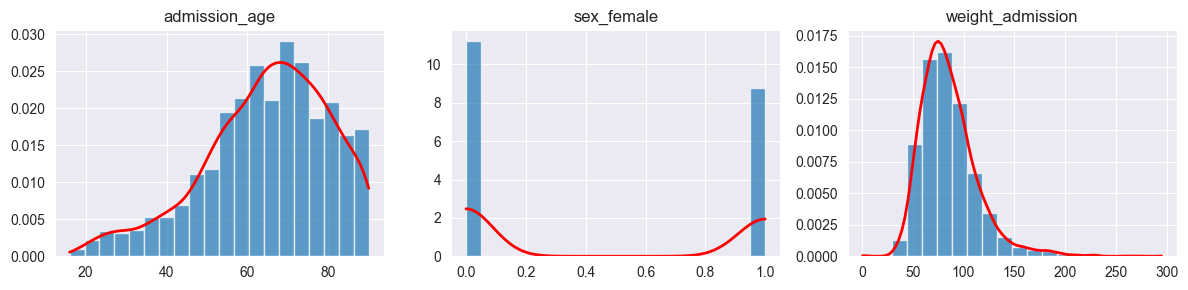

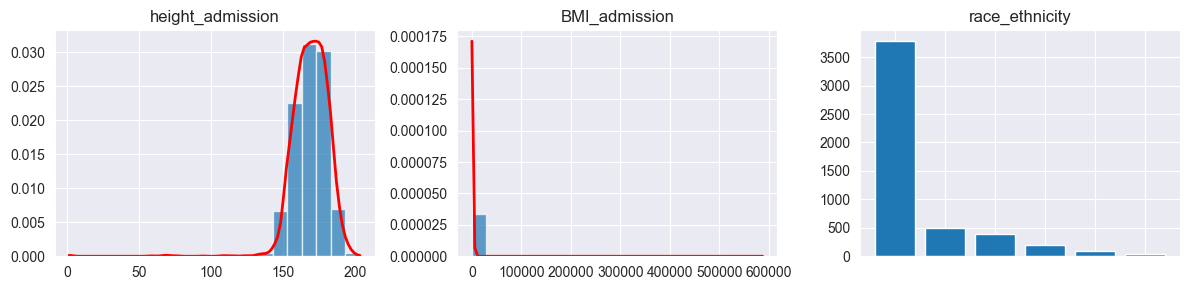

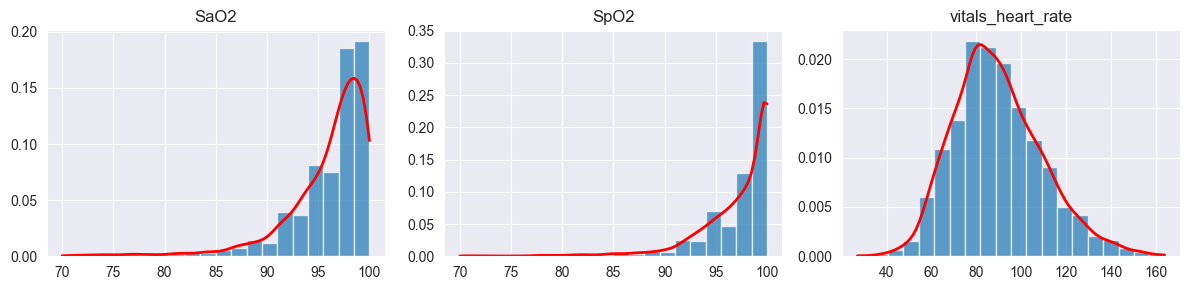

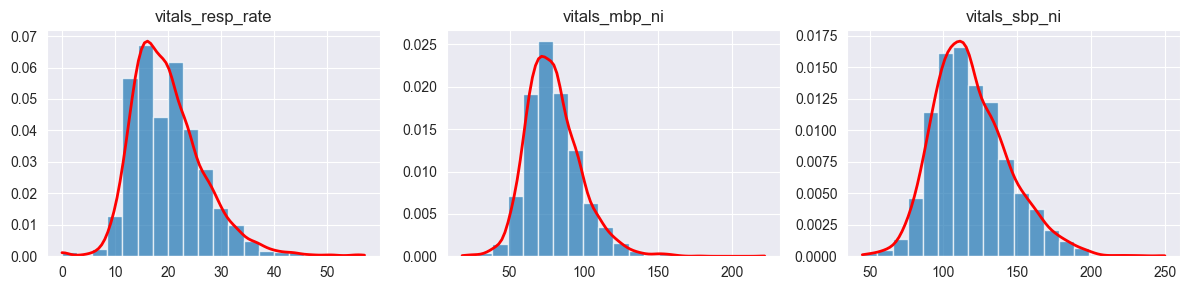

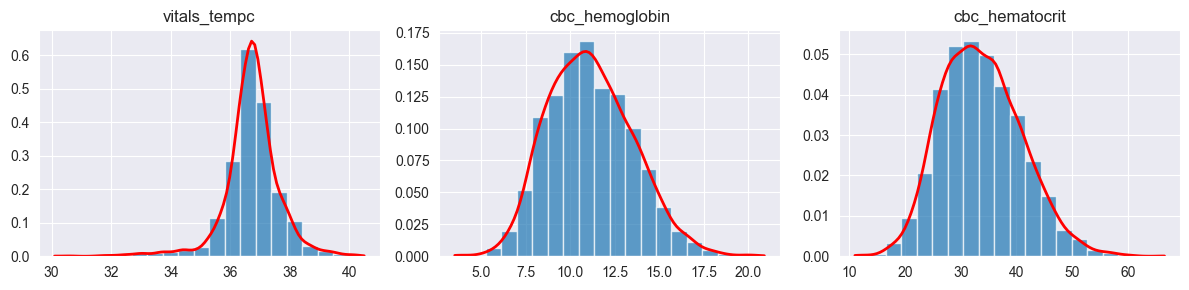

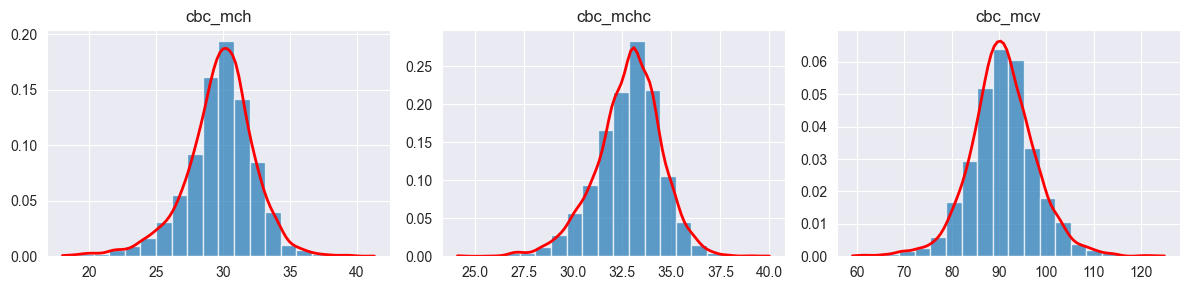

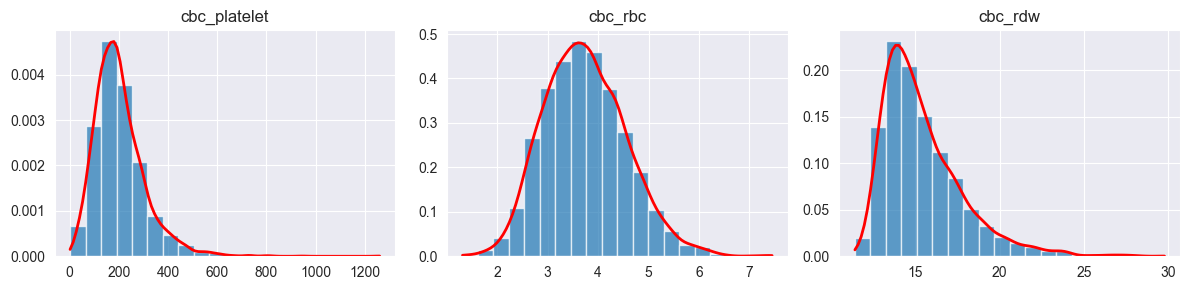

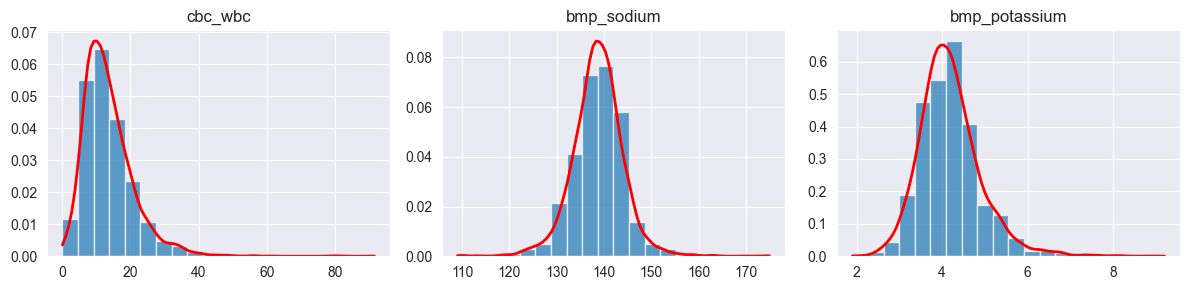

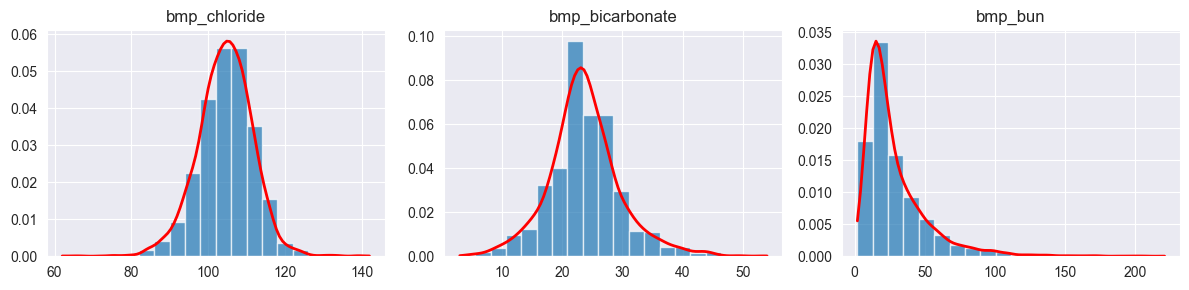

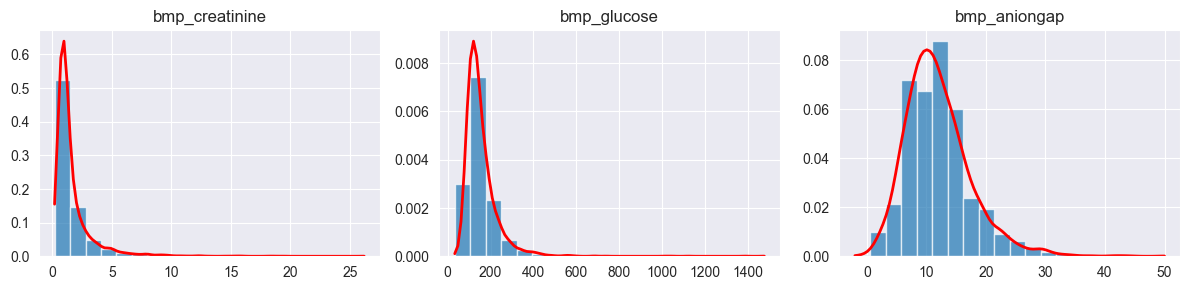

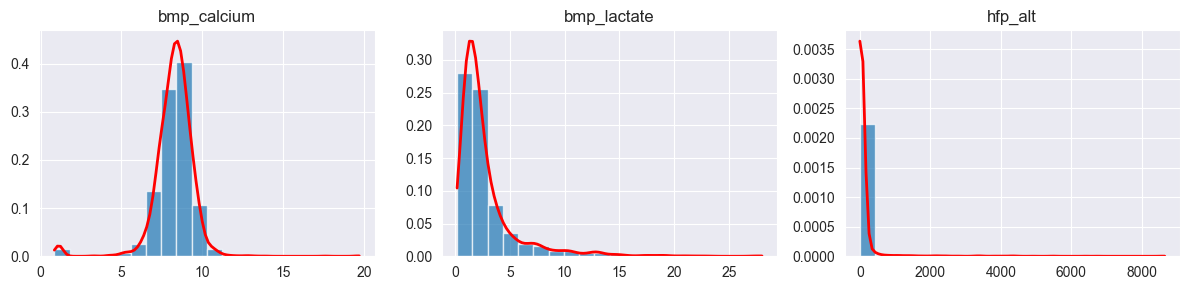

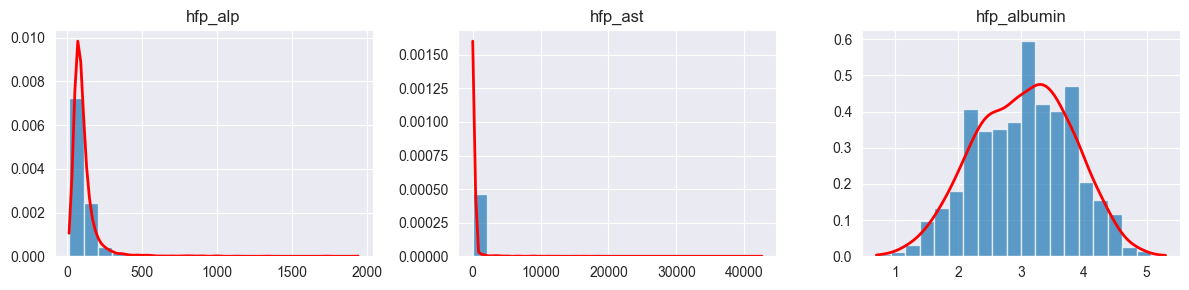

In [26]:
#Visualize distributions
plot_distributions(df_dropped)

In [27]:
# Count unique values in each column using nunique()
column_count = df_dropped.nunique()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
print("Number of unique values in each column:\n", column_count)

Number of unique values in each column:
 admission_age           77
sex_female               2
weight_admission      2833
height_admission       512
BMI_admission        25760
race_ethnicity           8
SaO2                   291
SpO2                    31
vitals_heart_rate      163
vitals_resp_rate        91
vitals_mbp_ni          189
vitals_sbp_ni          205
vitals_tempc           495
cbc_hemoglobin         192
cbc_hematocrit         513
cbc_mch                257
cbc_mchc               139
cbc_mcv                585
cbc_platelet           767
cbc_rbc                567
cbc_rdw                208
cbc_wbc               2823
bmp_sodium             198
bmp_potassium          192
bmp_chloride            87
bmp_bicarbonate        308
bmp_bun                297
bmp_creatinine        1149
bmp_glucose            672
bmp_aniongap           317
bmp_calcium            180
bmp_lactate            767
hfp_alt               1257
hfp_alp                683
hfp_ast               1530
hfp_albumin   

In [28]:
df_dropped.describe()

,admission_age,sex_female,weight_admission,height_admission,BMI_admission,SaO2,SpO2,vitals_heart_rate,vitals_resp_rate,vitals_mbp_ni,vitals_sbp_ni,vitals_tempc,cbc_hemoglobin,cbc_hematocrit,cbc_mch,cbc_mchc,cbc_mcv,cbc_platelet,cbc_rbc,cbc_rdw,cbc_wbc,bmp_sodium,bmp_potassium,bmp_chloride,bmp_bicarbonate,bmp_bun,bmp_creatinine,bmp_glucose,bmp_aniongap,bmp_calcium,bmp_lactate,hfp_alt,hfp_alp,hfp_ast,hfp_albumin
count,49091.000000,49093.000000,47989.000000,47809.000000,47108.000000,49093.000000,49093.000000,43643.000000,42217.000000,33626.000000,34141.000000,41134.000000,42297.000000,42360.000000,38072.000000,39843.000000,39850.000000,41707.000000,41232.000000,38155.000000,41357.000000,42554.000000,43128.000000,41186.000000,38426.000000,41338.000000,41297.000000,44359.000000,35334.000000,38226.000000,23120.000000,31498.000000,31237.000000,31634.000000,31423.000000
mean,64.429549,0.436580,85.611319,169.347372,200.285514,95.917711,97.137066,89.588365,19.913246,79.471560,117.865470,36.739015,11.142147,33.727472,29.825578,32.844846,90.862183,204.453305,3.751152,15.370486,13.581179,138.589879,4.178662,104.251299,23.831729,28.455721,1.610437,154.611804,11.874823,8.229963,2.757042,98.536034,104.793386,153.505785,3.060884
std,15.800227,0.495967,27.847338,12.872780,8189.044538,4.180759,3.834850,20.402892,6.802778,18.146477,25.166951,0.942444,2.433666,7.208671,2.604850,1.635248,7.002086,105.690314,0.805712,2.417463,7.858962,5.459354,0.723046,7.184925,5.976145,22.591640,1.607343,79.172818,5.371220,1.293832,2.738231,414.724729,93.436255,799.241998,0.766700
min,14.000000,0.000000,0.000000,0.000000,0.000000,70.000000,70.000000,25.000000,0.000000,6.000000,30.000000,23.700000,1.900000,5.900000,15.400000,24.100000,58.100000,2.000000,0.660000,0.000000,0.010000,99.000000,1.500000,53.000000,2.000000,1.000000,0.100000,17.000000,-2.000000,0.630000,0.200000,1.000000,7.000000,4.000000,0.600000
25%,55.000000,0.000000,67.400000,162.560000,23.824857,94.600000,96.000000,75.000000,15.000000,67.000000,100.000000,36.400000,9.400000,28.500000,28.500000,31.900000,87.000000,134.000000,3.180000,13.700000,8.530000,136.000000,3.700000,100.000000,20.000000,14.000000,0.800000,110.000000,8.000000,7.800000,1.200000,17.000000,63.000000,20.000000,2.500000
50%,66.000000,0.000000,81.500000,170.000000,28.058219,97.000000,98.000000,88.000000,19.000000,77.000000,115.000000,36.720000,10.900000,33.100000,30.000000,33.000000,90.900000,187.000000,3.700000,14.800000,12.070000,139.000000,4.100000,105.000000,24.000000,21.000000,1.100000,136.000000,11.000000,8.300000,1.830000,27.000000,83.000000,31.000000,3.100000
75%,76.000000,1.000000,99.000000,177.800000,33.564014,99.000000,100.000000,102.000000,24.000000,90.000000,133.000000,37.200000,12.700000,38.500000,31.400000,34.000000,95.000000,255.000000,4.280000,16.400000,16.800000,142.000000,4.600000,109.000000,27.000000,35.000000,1.750000,175.000000,15.000000,8.900000,3.100000,48.000000,116.000000,63.000000,3.600000
max,90.000000,1.000000,771.200000,504.800000,725551.020408,100.000000,100.000000,214.000000,66.000000,238.000000,250.000000,44.300000,96.000000,72.000000,48.800000,48.800000,145.600000,1575.000000,7.960000,58.600000,257.400000,188.000000,9.900000,160.000000,63.000000,259.000000,26.600000,1485.000000,62.000000,22.200000,29.300000,12456.000000,2820.000000,42606.000000,6.300000


##### The percentage of each column's sparsity was calculated to determine which columns will be kept.

In [29]:
# Get count of NaN values in each column
null_counts = df_dropped.isna().sum()
# Calculate the percentage of NaN values in each column
null_percentages = round((df_dropped.isna().sum() / len(df_dropped)) * 100, 2)
# Combine counts and percentages in a DataFrame for better visualization
null_info = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage': null_percentages
})

# Show only columns that have at least one NaN value
null_info_with_nulls = null_info[null_counts > 0]
# Print the results
print("Columns with missing values:")
print(null_info_with_nulls)

Columns with missing values:
                   Null Count  Null Percentage
admission_age               2             0.00
weight_admission         1104             2.25
height_admission         1284             2.62
BMI_admission            1985             4.04
vitals_heart_rate        5450            11.10
vitals_resp_rate         6876            14.01
vitals_mbp_ni           15467            31.51
vitals_sbp_ni           14952            30.46
vitals_tempc             7959            16.21
cbc_hemoglobin           6796            13.84
cbc_hematocrit           6733            13.71
cbc_mch                 11021            22.45
cbc_mchc                 9250            18.84
cbc_mcv                  9243            18.83
cbc_platelet             7386            15.04
cbc_rbc                  7861            16.01
cbc_rdw                 10938            22.28
cbc_wbc                  7736            15.76
bmp_sodium               6539            13.32
bmp_potassium            5965  

##### Columns with greater than 50% of missing values were excluded from the analysis. The lactate variable was removed from the data frame.

In [30]:
df_dropped = df_dropped.drop('bmp_lactate', axis=1)

In [31]:
# Verify removal
df_dropped.shape

(49093, 35)

In [32]:
# Check sparsity of data frame after lactate removal
analyze_nulls(df_dropped)


Total number of NaN values in the DataFrame: 278612
Overall percentage of NaN values: 16.21%


(278612, 16.21)

##### SaO2 and SpO2 variables were examined to determine if any outliers were present. This was done before creating the target variable column to ensure accurate data for the calculation. The original data set had specified the range of values to be between 70% -100%.

In [33]:
#Explore SaO2 values - no value should be above 100 or less than 70
df_dropped['SaO2'] = df_dropped['SaO2'].apply(lambda x: 100 if x >100 else x)
df_dropped['SaO2'] = df_dropped['SaO2'].apply(lambda x: 70 if x < 70 else x)
df_dropped["SaO2"].describe()

count    49093.000000
mean        95.917711
std          4.180759
min         70.000000
25%         94.600000
50%         97.000000
75%         99.000000
max        100.000000
Name: SaO2, dtype: float64

In [34]:
#Explore SpO2 values - no value should be above 100 or less than 70
df_dropped['SpO2'] = df_dropped['SpO2'].apply(lambda x: 100 if x >100 else x)
df_dropped['SpO2'] = df_dropped['SpO2'].apply(lambda x: 70 if x < 70 else x)
df_dropped["SpO2"].describe()

count    49093.000000
mean        97.137066
std          3.834850
min         70.000000
25%         96.000000
50%         98.000000
75%        100.000000
max        100.000000
Name: SpO2, dtype: float64

##### The target variable of gap was calculated and added to the data frame. Gap is the difference between the SpO2 and the SaO2 measurements.

In [35]:
# Add the measurement of the gap between SpO2 and SaO2
df_dropped.insert(5, 'gap', df_dropped['SpO2'] - df_dropped['SaO2'])
df_dropped.head(10)

,admission_age,sex_female,weight_admission,height_admission,BMI_admission,gap,race_ethnicity,SaO2,SpO2,vitals_heart_rate,vitals_resp_rate,vitals_mbp_ni,vitals_sbp_ni,vitals_tempc,cbc_hemoglobin,cbc_hematocrit,cbc_mch,cbc_mchc,cbc_mcv,cbc_platelet,cbc_rbc,cbc_rdw,cbc_wbc,bmp_sodium,bmp_potassium,bmp_chloride,bmp_bicarbonate,bmp_bun,bmp_creatinine,bmp_glucose,bmp_aniongap,bmp_calcium,hfp_alt,hfp_alp,hfp_ast,hfp_albumin
0,67.0,1,86.2,160.0,33.671875,3.0,White,94.0,97.0,83.0,23.0,NaN,111.0,37.4,13.2,39.8,29.2,33.2,88.1,145.0,4.52,13.7,17.3,NaN,3.1,NaN,NaN,NaN,NaN,133.0,NaN,NaN,NaN,NaN,NaN,NaN
1,83.0,1,NaN,162.6,NaN,-3.0,White,98.0,95.0,135.0,16.0,NaN,99.0,36.6,9.4,30.7,25.6,30.6,83.7,314.0,3.67,16.8,7.9,141.0,5.1,108.0,18.0,87.0,4.40,194.0,20.0,8.3,14.0,97.0,11.0,2.6
2,59.0,1,74.1,162.6,28.027033,2.0,White,94.0,96.0,74.0,15.0,73.0,99.0,36.6,12.2,35.2,31.3,34.7,90.3,199.0,3.90,13.1,10.6,141.0,3.3,104.0,25.0,16.0,0.45,135.0,15.0,8.0,NaN,NaN,NaN,NaN
3,73.0,0,NaN,152.4,NaN,1.0,Asian,99.0,100.0,83.0,11.0,NaN,85.0,36.0,11.4,34.1,29.8,33.4,89.0,100.0,3.83,12.6,9.5,145.0,3.6,113.0,21.0,11.0,1.11,119.0,15.0,7.3,NaN,NaN,NaN,2.5
4,57.0,0,NaN,172.7,NaN,-1.0,White,98.0,97.0,94.0,8.0,NaN,140.0,36.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,60.0,12.0,3.4
5,59.0,0,116.7,175.3,37.975808,8.0,White,87.0,95.0,68.0,16.0,NaN,125.0,37.6,9.4,31.0,22.3,30.3,73.6,251.0,4.21,15.2,13.1,NaN,4.2,NaN,NaN,NaN,NaN,437.0,NaN,NaN,NaN,NaN,NaN,NaN
6,63.0,1,60.2,149.9,26.791265,1.0,White,95.0,96.0,78.0,12.0,NaN,133.0,37.6,10.5,30.1,32.2,34.9,92.3,143.0,3.26,14.8,15.0,NaN,NaN,NaN,NaN,NaN,NaN,111.0,NaN,NaN,NaN,NaN,NaN,NaN
7,63.0,1,84.8,154.9,35.342154,2.0,White,96.0,98.0,78.0,20.0,NaN,NaN,36.9,10.8,31.8,29.8,34.0,87.6,148.0,3.63,13.7,8.0,NaN,4.1,NaN,NaN,NaN,NaN,146.0,NaN,NaN,NaN,NaN,NaN,NaN
8,60.0,0,132.4,180.3,40.728323,1.0,White,93.0,94.0,78.0,13.0,NaN,120.0,36.6,12.2,37.5,28.4,32.5,87.2,153.0,4.30,13.8,16.8,NaN,3.6,NaN,NaN,NaN,NaN,67.0,NaN,NaN,NaN,NaN,NaN,NaN
9,60.0,0,125.9,172.7,42.212498,0.0,White,96.0,96.0,85.0,16.0,85.0,117.0,38.1,12.8,36.4,29.6,35.2,84.3,180.0,4.32,12.3,15.4,138.0,3.8,104.0,21.0,10.0,0.80,151.0,17.0,7.0,42.0,58.0,20.0,3.9


In [36]:
# More cleaning of the dataframe
# Make all lower case
df_dropped.columns = df_dropped.columns.str.lower()

for col in df_dropped.columns:
    if df_dropped[col].dtype == 'object':
        df_dropped[col] = df_dropped[col].str.lower()

#round values to 2 decimal points
df_lower = df_dropped.round(2)
#Verify space removal/ replacement
df_lower.head(10)

,admission_age,sex_female,weight_admission,height_admission,bmi_admission,gap,race_ethnicity,sao2,spo2,vitals_heart_rate,vitals_resp_rate,vitals_mbp_ni,vitals_sbp_ni,vitals_tempc,cbc_hemoglobin,cbc_hematocrit,cbc_mch,cbc_mchc,cbc_mcv,cbc_platelet,cbc_rbc,cbc_rdw,cbc_wbc,bmp_sodium,bmp_potassium,bmp_chloride,bmp_bicarbonate,bmp_bun,bmp_creatinine,bmp_glucose,bmp_aniongap,bmp_calcium,hfp_alt,hfp_alp,hfp_ast,hfp_albumin
0,67.0,1,86.2,160.0,33.67,3.0,white,94.0,97.0,83.0,23.0,NaN,111.0,37.4,13.2,39.8,29.2,33.2,88.1,145.0,4.52,13.7,17.3,NaN,3.1,NaN,NaN,NaN,NaN,133.0,NaN,NaN,NaN,NaN,NaN,NaN
1,83.0,1,NaN,162.6,NaN,-3.0,white,98.0,95.0,135.0,16.0,NaN,99.0,36.6,9.4,30.7,25.6,30.6,83.7,314.0,3.67,16.8,7.9,141.0,5.1,108.0,18.0,87.0,4.40,194.0,20.0,8.3,14.0,97.0,11.0,2.6
2,59.0,1,74.1,162.6,28.03,2.0,white,94.0,96.0,74.0,15.0,73.0,99.0,36.6,12.2,35.2,31.3,34.7,90.3,199.0,3.90,13.1,10.6,141.0,3.3,104.0,25.0,16.0,0.45,135.0,15.0,8.0,NaN,NaN,NaN,NaN
3,73.0,0,NaN,152.4,NaN,1.0,asian,99.0,100.0,83.0,11.0,NaN,85.0,36.0,11.4,34.1,29.8,33.4,89.0,100.0,3.83,12.6,9.5,145.0,3.6,113.0,21.0,11.0,1.11,119.0,15.0,7.3,NaN,NaN,NaN,2.5
4,57.0,0,NaN,172.7,NaN,-1.0,white,98.0,97.0,94.0,8.0,NaN,140.0,36.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,60.0,12.0,3.4
5,59.0,0,116.7,175.3,37.98,8.0,white,87.0,95.0,68.0,16.0,NaN,125.0,37.6,9.4,31.0,22.3,30.3,73.6,251.0,4.21,15.2,13.1,NaN,4.2,NaN,NaN,NaN,NaN,437.0,NaN,NaN,NaN,NaN,NaN,NaN
6,63.0,1,60.2,149.9,26.79,1.0,white,95.0,96.0,78.0,12.0,NaN,133.0,37.6,10.5,30.1,32.2,34.9,92.3,143.0,3.26,14.8,15.0,NaN,NaN,NaN,NaN,NaN,NaN,111.0,NaN,NaN,NaN,NaN,NaN,NaN
7,63.0,1,84.8,154.9,35.34,2.0,white,96.0,98.0,78.0,20.0,NaN,NaN,36.9,10.8,31.8,29.8,34.0,87.6,148.0,3.63,13.7,8.0,NaN,4.1,NaN,NaN,NaN,NaN,146.0,NaN,NaN,NaN,NaN,NaN,NaN
8,60.0,0,132.4,180.3,40.73,1.0,white,93.0,94.0,78.0,13.0,NaN,120.0,36.6,12.2,37.5,28.4,32.5,87.2,153.0,4.30,13.8,16.8,NaN,3.6,NaN,NaN,NaN,NaN,67.0,NaN,NaN,NaN,NaN,NaN,NaN
9,60.0,0,125.9,172.7,42.21,0.0,white,96.0,96.0,85.0,16.0,85.0,117.0,38.1,12.8,36.4,29.6,35.2,84.3,180.0,4.32,12.3,15.4,138.0,3.8,104.0,21.0,10.0,0.80,151.0,17.0,7.0,42.0,58.0,20.0,3.9


##### Q-Q Plots
The normality of the data was visualized with Q-Q plots. Random forest regression models do not work on assumptions of normality and are able to handle data that is not normal. Often times in larger data sets, the data is found to be non-normally distributed (Varshney, 2023).

-----------
Return to [C2: Data Preprocessing](#C2:-Data-Preprocessing) , [Table of Contents](#Table-of-Contents)

DataFrame shape: (49093, 36)
Showing first 10 features out of 35
admission_age: Sampling 10,000 points from 49091 total


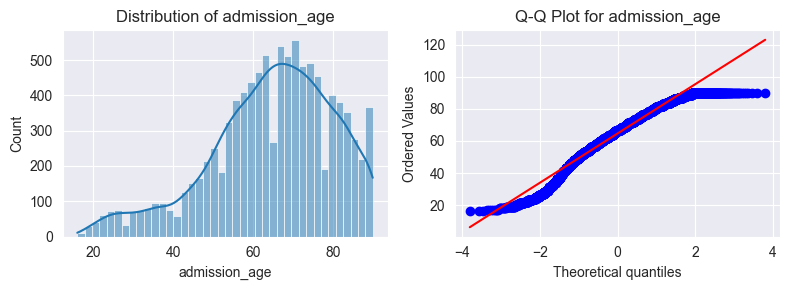

admission_age: Skewness = -0.6583
  Not normal

sex_female: Sampling 10,000 points from 49093 total


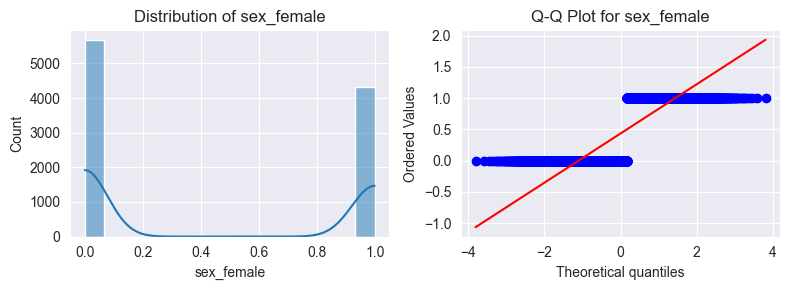

sex_female: Skewness = 0.2709
  Approximately normal

weight_admission: Sampling 10,000 points from 47989 total


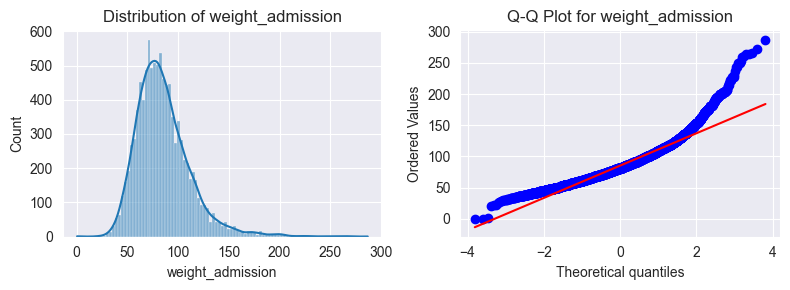

weight_admission: Skewness = 1.3863
  Not normal

height_admission: Sampling 10,000 points from 47809 total


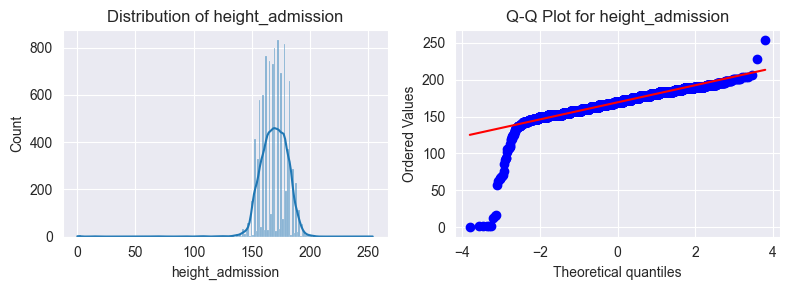

height_admission: Skewness = -2.6976
  Not normal

bmi_admission: Sampling 10,000 points from 47108 total


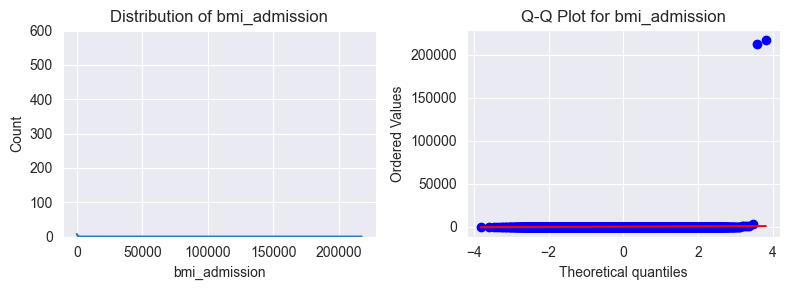

bmi_admission: Skewness = 70.7006
  Not normal

gap: Sampling 10,000 points from 49093 total


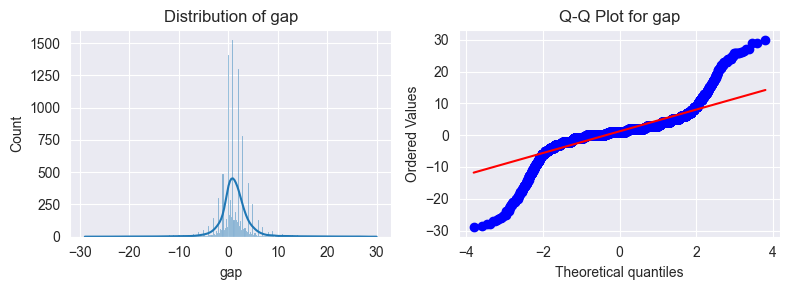

gap: Skewness = -0.1730
  Approximately normal

sao2: Sampling 10,000 points from 49093 total


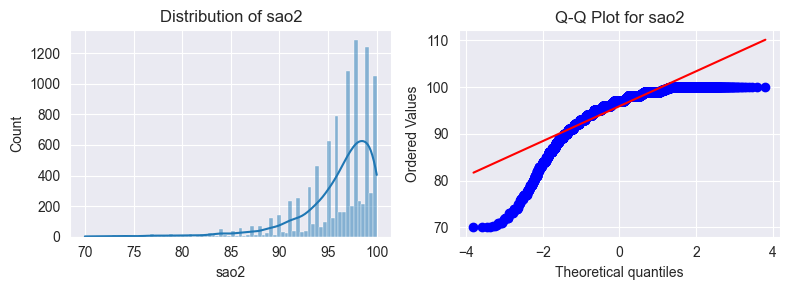

sao2: Skewness = -2.2332
  Not normal

spo2: Sampling 10,000 points from 49093 total


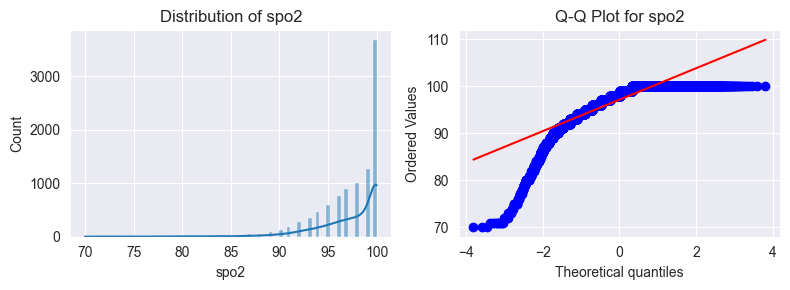

spo2: Skewness = -2.4713
  Not normal

vitals_heart_rate: Sampling 10,000 points from 43643 total


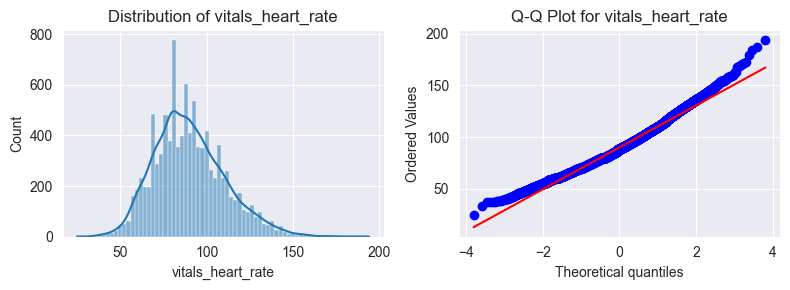

vitals_heart_rate: Skewness = 0.5217
  Not normal

vitals_resp_rate: Sampling 10,000 points from 42217 total


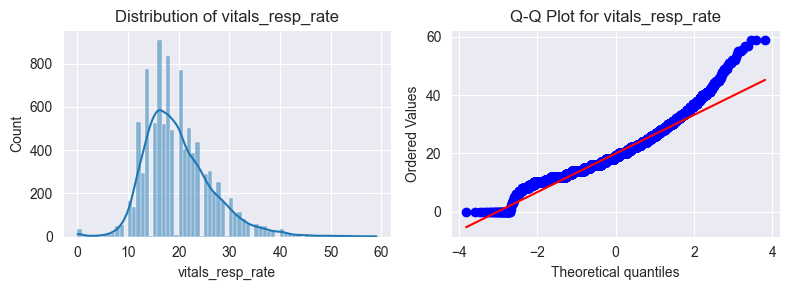

vitals_resp_rate: Skewness = 0.9852
  Not normal



In [37]:
def check_normality(data, max_features=10):
    numeric_cols = data.select_dtypes('number').columns
    if len(numeric_cols) > max_features:
        print(f"Showing first {max_features} features out of {len(numeric_cols)}")
        numeric_cols = numeric_cols[:max_features]

    for col in numeric_cols:
        try:
            col_data = data[col].dropna()
            if len(col_data) < 10:
                print(f"{col}: Too few non-missing values")
                continue

            if len(col_data) > 10000:
                print(f"{col}: Sampling 10,000 points from {len(col_data)} total")
                col_data = col_data.sample(10000, random_state=42)

            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
            sns.histplot(col_data, kde=True, ax=ax1)
            ax1.set_title(f'Distribution of {col}')
            stats.probplot(col_data, plot=ax2)
            ax2.set_title(f'Q-Q Plot for {col}')
            plt.tight_layout()
            plt.show()
            plt.close(fig)
            skew = col_data.skew()
            print(f"{col}: Skewness = {skew:.4f}")
            if abs(skew) < 0.5:
                print("  Approximately normal")
            else:
                print("  Not normal")

            print()

        except Exception as e:
            print(f"Error processing {col}: {str(e)}")
            continue

print(f"DataFrame shape: {df_lower.shape}")
check_normality(df_lower)

##### Data (Im)Balance
Check for imbalance in the data between the hidden hypoxemia and gap columns.

-----------
Return to [C2: Data Preprocessing](#C2:-Data-Preprocessing) , [Table of Contents](#Table-of-Contents)

In [38]:
# Create a binary that identifies hidden hypoxemia cases
# Hidden hypoxemia: SpO2 >= 88% but SaO2 < 88%
df_hidden = ((df_lower['spo2'] >= 88) & (df_lower['sao2'] < 88)).astype(int)
# Check the distribution
print(f"Hidden hypoxemia cases: {df_hidden.sum()}")
print(f"Percentage: {df_hidden.mean() * 100:.2f}%")

Hidden hypoxemia cases: 1731
Percentage: 3.53%


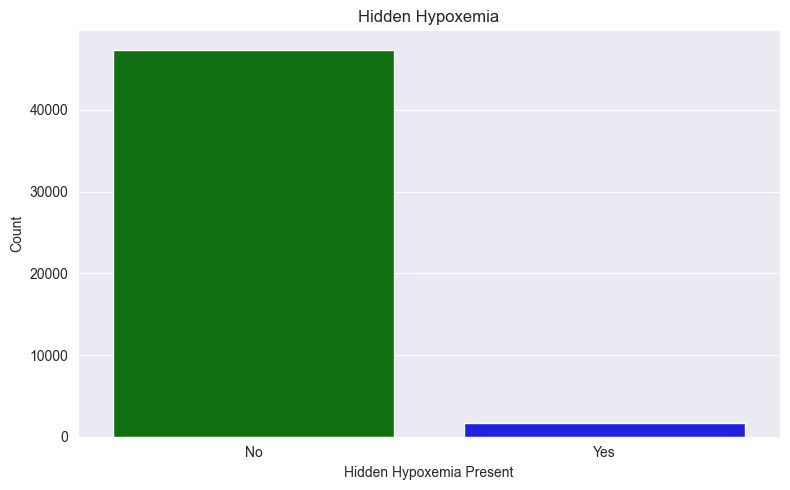

In [39]:
df_mapped = df_hidden.map({1: "Yes", 0: "No"})
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=df_mapped, hue=df_mapped, palette=['green', 'blue'], legend=False)
plt.xlabel("Hidden Hypoxemia Present")
plt.ylabel("Count")
plt.title("Hidden Hypoxemia")
plt.tight_layout()
plt.show()

##### The gap threshold will be set at 3. This threshold was chosen because it helps identify patients with true hypoxemia (SaO2 ≤ 90%) even when their pulse oximetry readings appear normal (SpO2 ≥ 93%).

Samples with gap ≥ 3: 11457
Percentage: 23.34%


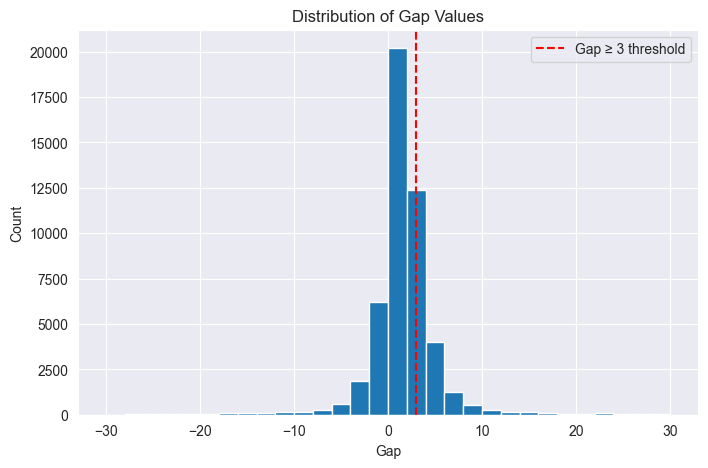

In [40]:
# Create a column for significant gap (≥ 3)
df_significant_gap = (df_lower['gap'] >= 3).astype(int)

# Check the distribution of this new column
print(f"Samples with gap ≥ 3: {df_significant_gap.sum()}")
print(f"Percentage: {df_significant_gap.mean() * 100:.2f}%")

# Visualize the distribution of the gap values with the new threshold
plt.figure(figsize=(8, 5))
plt.hist(df_lower['gap'], bins=30)
plt.axvline(x=3, color='r', linestyle='--', label='Gap ≥ 3 threshold')
plt.xlabel('Gap')
plt.ylabel('Count')
plt.title('Distribution of Gap Values')
plt.legend()
plt.show()

In [41]:
# Split the data using stratification
# Define features and target
features = df_lower.drop(['sao2', 'gap'], axis=1) #SaO2 is no longer needed
target = df_lower['gap']
stratification = df_significant_gap
#split the data using stratification
X_train, X_test, y_train, y_test = train_test_split(
    features,
    target,
    test_size=0.2,
    stratify=stratification,
    random_state=42
)

In [42]:
# Function to confirm alignment of data sets
def check_alignment(X_train, X_test, y_train, y_test):
    print(f"X_train: {X_train.shape}")
    print(f"y_train: {y_train.shape if hasattr(y_train, 'shape') else (len(y_train),)}")
    print(f"X_test: {X_test.shape}")
    print(f"y_test: {y_test.shape if hasattr(y_test, 'shape') else (len(y_test),)}")

    # Check if X and y match in rows
    if len(X_train) != len(y_train):
        print("ERROR: X_train and y_train row counts don't match!")
    if len(X_test) != len(y_test):
        print("ERROR: X_test and y_test row counts don't match!")

    if len(X_train) == len(y_train) and len(X_test) == len(y_test):
        print("All datasets aligned correctly!")

    return

In [43]:
check_alignment(X_train, X_test, y_train, y_test)

X_train: (39274, 34)
y_train: (39274,)
X_test: (9819, 34)
y_test: (9819,)
All datasets aligned correctly!


##### Outliers

Outliers were managed using the technique of winsorization. Any value that falls outside a prescribed percentile is replaced with the value at that percentile. This means that rather than cutting an outlier out of the data, it is recoded to the outside value (Horsch, 2021). This was important for this data set since many variables had non-error outliers, that is, the outliers were expected. Box plots, interquartile ranges, and percentile values were all used in the process of determining which values were to be kept and at which percentile. This process relied heavily on the subject matter expertise of the medical field.

--------
Return to [C2: Data Preprocessing](#C2:-Data-Preprocessing) , [Table of Contents](#Table-of-Contents)

In [44]:
#Function detection of outliers for Winsorization, using IQR
def winz_outliers(df):
    print("Outlier Analysis Report")
    print("=" * 50)
    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            # Check if column has NaN values
            nan_count = df[col].isna().sum()

            if nan_count == len(df):
                print(f"\nColumn: {col}")
                print("All values are NaN - skipping outlier analysis")
                continue

            col_data = df[col].dropna()

            if len(col_data) == 0:
                print(f"\nColumn: {col}")
                print("All values are NaN - skipping outlier analysis")
                continue

            Q1 = col_data.quantile(0.25)
            Q3 = col_data.quantile(0.75)
            IQR = Q3 - Q1
            outliers = ((col_data < (Q1 - 1.5 * IQR)) | (col_data > (Q3 + 1.5 * IQR)))
            outlier_count = outliers.sum()

            if outlier_count > 0:
                outer_fence = 3 * IQR
                outer_fence_low = Q1 - outer_fence
                outer_fence_up = Q3 + outer_fence

                print(f"\nColumn: {col}")
                print(f"Number of NaN values: {nan_count}")
                print(f"Number of Outliers: {outlier_count}")
                print(f"Minimum: {round(col_data.min(), 2)}")
                print(f"Lower Outer Fence: {round(outer_fence_low, 2)}")
                print(f"Maximum: {round(col_data.max(), 2)}")
                print(f"Upper Outer Fence: {round(outer_fence_up, 2)}")

    print("=" * 50)

In [45]:
# Examine outlier statistics
winz_outliers(X_train)

Outlier Analysis Report

Column: admission_age
Number of NaN values: 1
Number of Outliers: 630
Minimum: 14.0
Lower Outer Fence: -8.0
Maximum: 90.0
Upper Outer Fence: 139.0

Column: weight_admission
Number of NaN values: 889
Number of Outliers: 1202
Minimum: 0.0
Lower Outer Fence: -27.3
Maximum: 771.2
Upper Outer Fence: 193.9

Column: height_admission
Number of NaN values: 1033
Number of Outliers: 268
Minimum: 0.0
Lower Outer Fence: 116.84
Maximum: 504.8
Upper Outer Fence: 223.52

Column: bmi_admission
Number of NaN values: 1586
Number of Outliers: 1561
Minimum: 0.0
Lower Outer Fence: -5.34
Maximum: 725551.02
Upper Outer Fence: 62.77

Column: spo2
Number of NaN values: 0
Number of Outliers: 1631
Minimum: 70.0
Lower Outer Fence: 84.0
Maximum: 100.0
Upper Outer Fence: 112.0

Column: vitals_heart_rate
Number of NaN values: 4380
Number of Outliers: 422
Minimum: 25.0
Lower Outer Fence: -6.0
Maximum: 214.0
Upper Outer Fence: 183.0

Column: vitals_resp_rate
Number of NaN values: 5496
Number of

Values to winsorize:
* weight — upper and lower
* height — upper and lower
* bmi - upper and lower
* Resp_rate — lower
* mean bp — upper and lower
* temp — lower
* wbc - upper
* alt - upper and lower
* alp - upper and lower
* ast - upper and lower

In [46]:
# Function to create boxplots
def box_plot_viz(df, figsize=(10, 4), n_cols=3):
    n_plots = len(df.columns)
    n_rows = (n_plots + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(figsize[0]*n_cols, figsize[1]*n_rows))
    axes = axes.flatten() if n_plots > 1 else [axes]

    for i, column in enumerate(df.columns):
        sns.boxenplot(x=df[column], ax=axes[i])
        axes[i].set_title(column)
        axes[i].set_xlabel('')

    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

##### Variables that had unexpected values as determined by the outlier function were visualized.

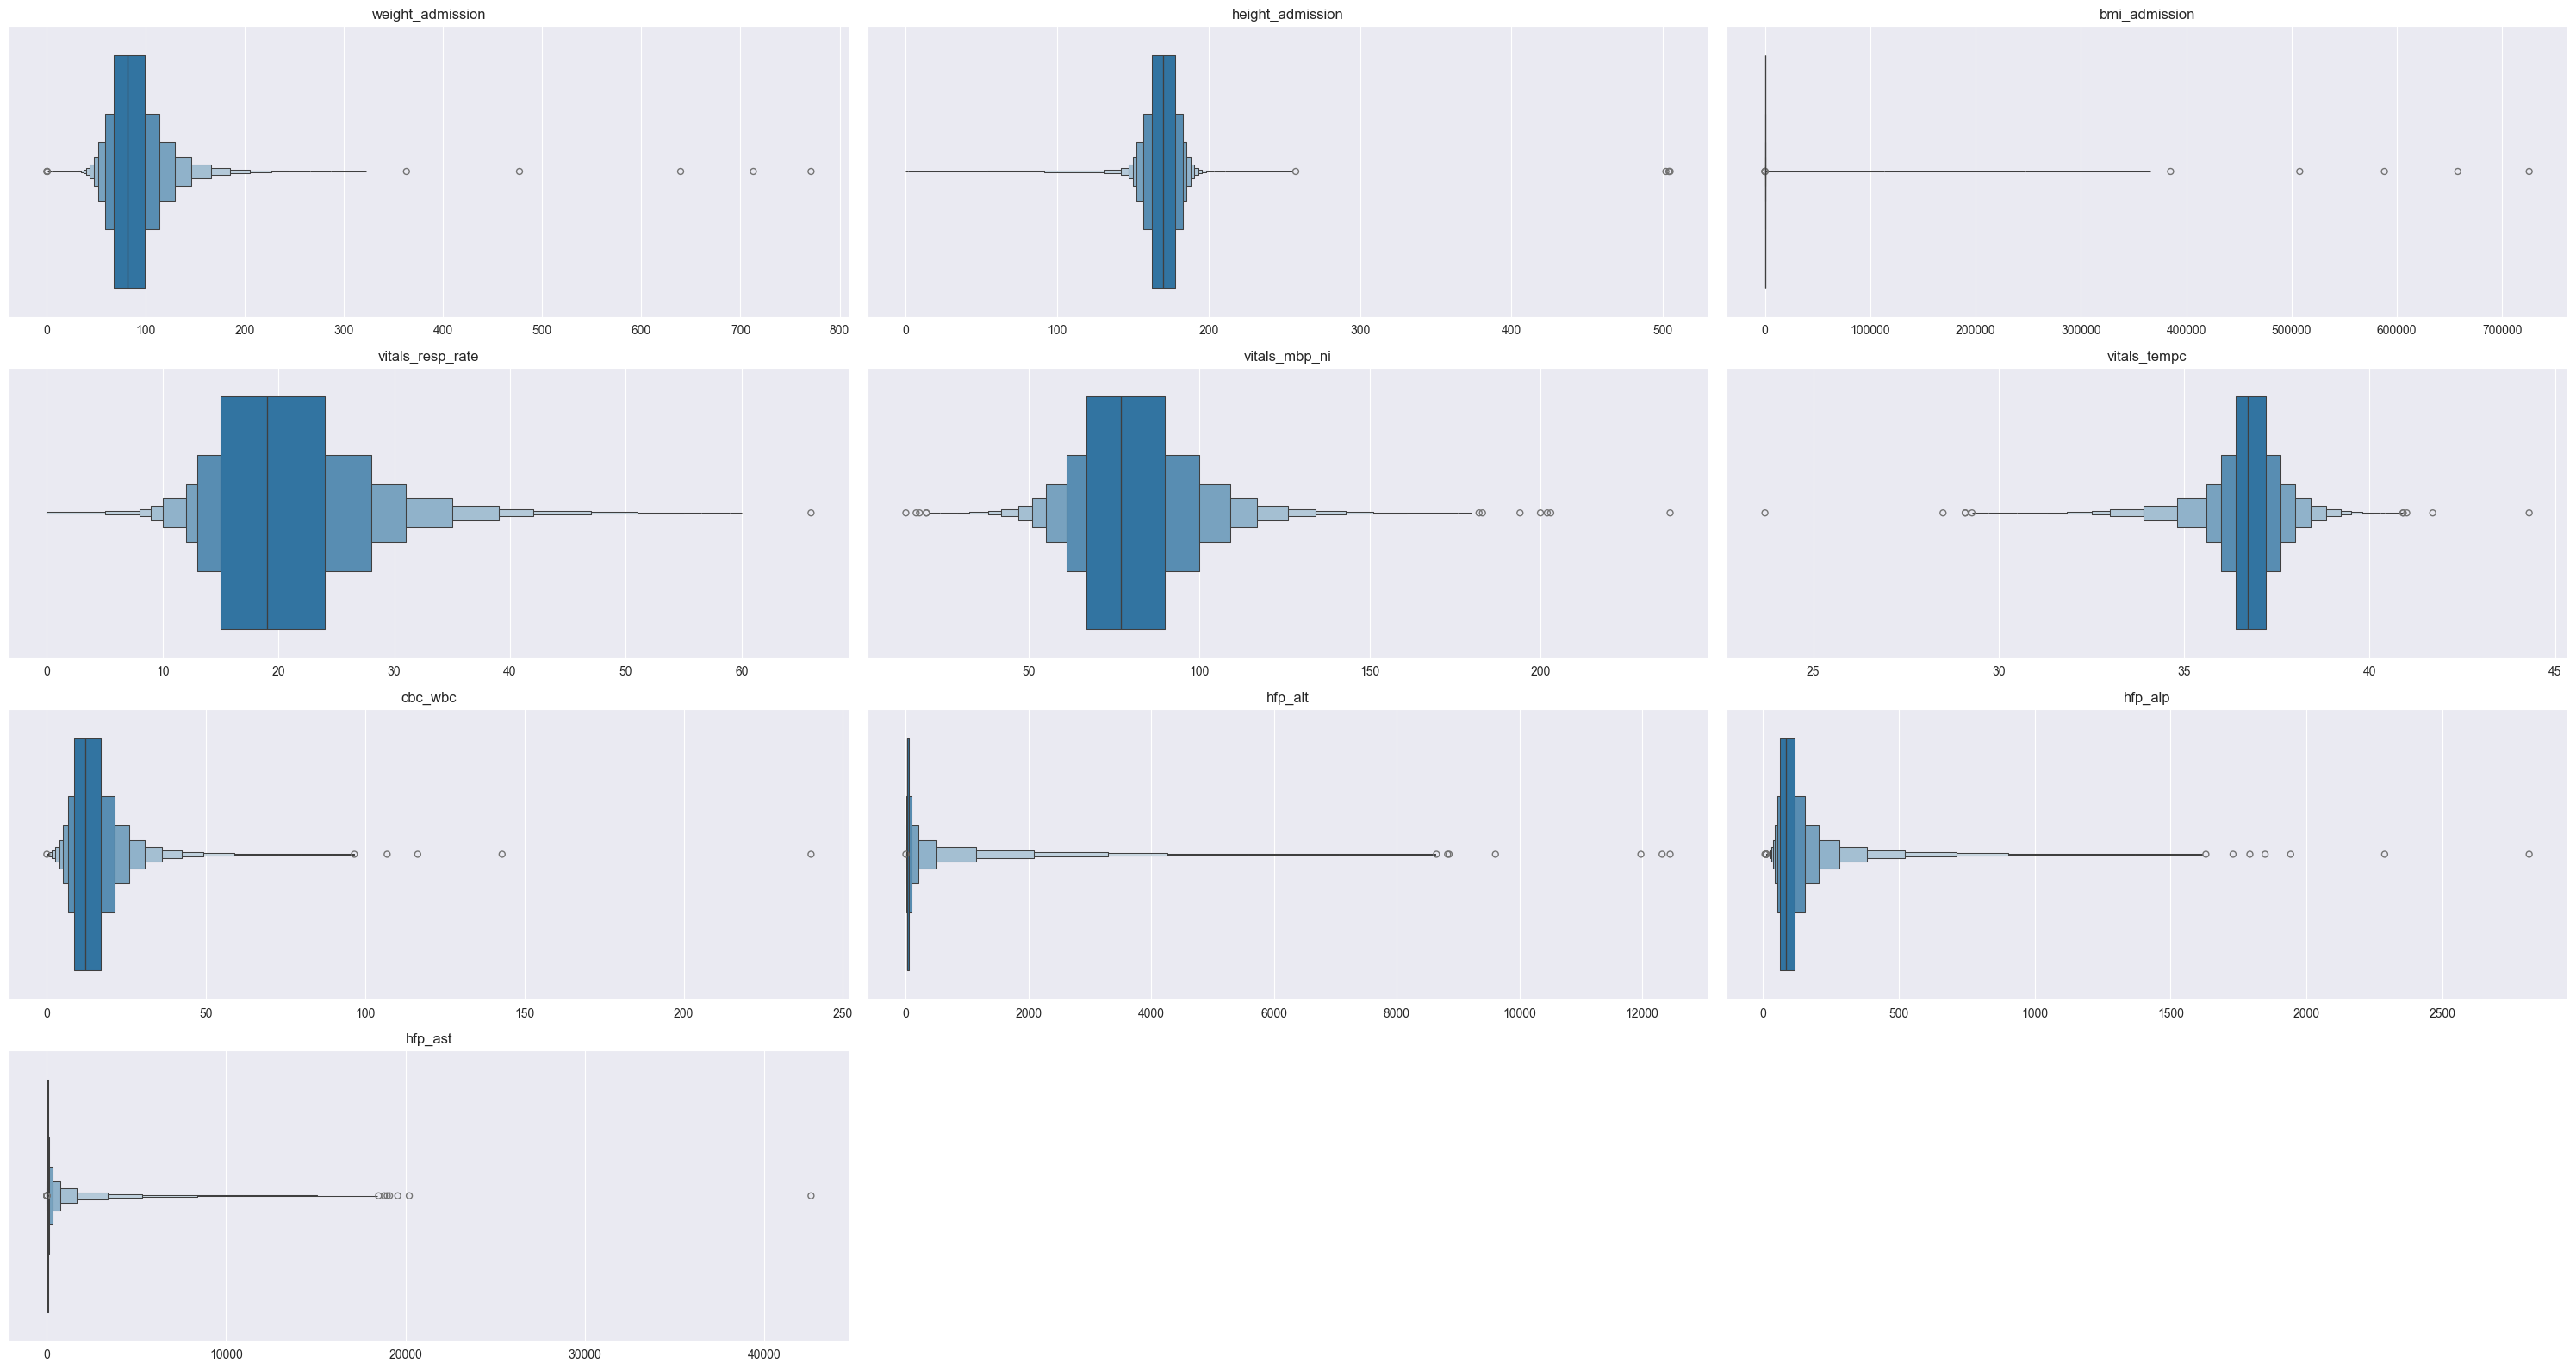

In [47]:
# Create a boxplot for each column that has unexpected values
outlier_shape = X_train[['weight_admission', 'height_admission', 'bmi_admission', 'vitals_resp_rate', 'vitals_mbp_ni', 'vitals_tempc','cbc_wbc', 'hfp_alt', 'hfp_alp', 'hfp_ast']]
box_plot_viz(outlier_shape)

A function was created to examine the percentiles of the variables identified as having outliers. This allowed for the determination of non-error outlier values versus outliers that were due to errors. Each identified variable was examined individually to set custom percentile ranges for the winsorization.

In [48]:
# Function to find winsorization markers
def print_quantiles(column):
    # Lower quantiles
    print('Lower quantiles:')
    print('0.5% quantile:  ', column.quantile(0.005))
    print('1% quantile:    ', column.quantile(0.01))
    print('5% quantile:    ', column.quantile(0.05))
    print('10% quantile:   ', column.quantile(0.10))
    # Upper Quantiles
    print('\nUpper quantiles:')
    print('90% quantile:   ', column.quantile(0.90))
    print('92.5% quantile: ', column.quantile(0.925))
    print('95% quantile:   ', column.quantile(0.95))
    print('97.5% quantile: ', column.quantile(0.975))
    print('99% quantile:   ', column.quantile(0.99))
    print('99.9% quantile: ', column.quantile(0.999))

In [49]:
print_quantiles(X_train['weight_admission'])

Lower quantiles:
0.5% quantile:   38.092000000000006
1% quantile:     40.8
5% quantile:     50.3
10% quantile:    56.47

Upper quantiles:
90% quantile:    118.8
92.5% quantile:  125.0
95% quantile:    135.0
97.5% quantile:  152.6
99% quantile:    178.9
99.9% quantile:  244.4677600000002


In [50]:
print_quantiles(X_train['height_admission'])

Lower quantiles:
0.5% quantile:   136.20000000000002
1% quantile:     144.7
5% quantile:     152.4
10% quantile:    155.0

Upper quantiles:
90% quantile:    182.9
92.5% quantile:  185.0
95% quantile:    185.42
97.5% quantile:  188.0
99% quantile:    193.0
99.9% quantile:  200.7


In [51]:
print_quantiles(X_train['bmi_admission'])

Lower quantiles:
0.5% quantile:   14.69
1% quantile:     15.82
5% quantile:     18.91
10% quantile:    20.67

Upper quantiles:
90% quantile:    40.50300000000003
92.5% quantile:  42.95474999999999
95% quantile:    46.32
97.5% quantile:  53.14824999999997
99% quantile:    63.32649999999987
99.9% quantile:  266.92186000000237


In [52]:
print_quantiles(X_train['vitals_resp_rate'])

Lower quantiles:
0.5% quantile:   6.0
1% quantile:     8.0
5% quantile:     12.0
10% quantile:    12.0

Upper quantiles:
90% quantile:    29.0
92.5% quantile:  30.0
95% quantile:    32.0
97.5% quantile:  36.0
99% quantile:    41.0
99.9% quantile:  54.22300000000541


In [53]:
print_quantiles(X_train['vitals_mbp_ni'])

Lower quantiles:
0.5% quantile:   39.0
1% quantile:     44.0
5% quantile:     54.0
10% quantile:    59.0

Upper quantiles:
90% quantile:    103.0
92.5% quantile:  107.0
95% quantile:    111.0
97.5% quantile:  120.0
99% quantile:    131.0
99.9% quantile:  160.11000000000422


In [54]:
print_quantiles(X_train['vitals_tempc'])

Lower quantiles:
0.5% quantile:   32.7
1% quantile:     33.3
5% quantile:     35.39
10% quantile:    35.9

Upper quantiles:
90% quantile:    37.8
92.5% quantile:  37.9
95% quantile:    38.17
97.5% quantile:  38.6
99% quantile:    39.1
99.9% quantile:  40.1


In [55]:
print_quantiles(X_train['cbc_wbc'])

Lower quantiles:
0.5% quantile:   1.1
1% quantile:     2.0
5% quantile:     4.7
10% quantile:    6.1

Upper quantiles:
90% quantile:    22.6
92.5% quantile:  24.6
95% quantile:    27.6
97.5% quantile:  32.5
99% quantile:    39.92699999999997
99.9% quantile:  72.1348000000001


In [56]:
print_quantiles(X_train['hfp_alt'])

Lower quantiles:
0.5% quantile:   6.0
1% quantile:     6.0
5% quantile:     9.0
10% quantile:    12.0

Upper quantiles:
90% quantile:    118.0
92.5% quantile:  162.35000000000218
95% quantile:    271.0
97.5% quantile:  659.0
99% quantile:    1701.7000000000044
99.9% quantile:  5541.992000000129


In [57]:
print_quantiles(X_train['hfp_alp'])

Lower quantiles:
0.5% quantile:   26.0
1% quantile:     30.0
5% quantile:     42.0
10% quantile:    49.0

Upper quantiles:
90% quantile:    170.0
92.5% quantile:  191.0
95% quantile:    225.0
97.5% quantile:  309.0
99% quantile:    473.0
99.9% quantile:  1130.6670000000304


In [58]:
print_quantiles(X_train['hfp_ast'])

Lower quantiles:
0.5% quantile:   8.0
1% quantile:     9.0
5% quantile:     12.0
10% quantile:    15.0

Upper quantiles:
90% quantile:    173.0
92.5% quantile:  245.0
95% quantile:    429.0
97.5% quantile:  1014.625
99% quantile:    2735.249999999982
99.9% quantile:  10722.73500000099


Values to winsorize:
* weight — upper and lower (.01, 0.001)
* height — upper and lower (0.005, 0.001)
* bmi - upper and lower (0.05, 0.01)
* Resp_rate - lower (0.005, 0)
* mean bp- upper and lower (0.005, 0.001)
* temp - lower (0.005, 0)
* wbc - upper (0, 0.001)
* alt - upper and lower (0, 0.025)
* alp- upper and lower (0, 0.01)
* ast - upper and lower (0, 0.05)

In [59]:
## Winsorize the outliers
import warnings
warnings.filterwarnings('ignore', message="Warning: 'partition' will ignore the 'mask' of the MaskedArray")
#When using the limits, you are specifying "how much" to take off, not the "where" to take off
X_train['weight_winz'] = winsorize(X_train['weight_admission'].values, limits=(0.01, 0.001))
X_train['height_winz'] = winsorize(X_train['height_admission'].values, limits=(0.005, 0.001))
X_train['bmi_winz'] = winsorize(X_train['bmi_admission'].values, limits=(0.05, 0.01))
X_train['resp_winz'] = winsorize(X_train['vitals_resp_rate'].values, limits=(0.005, 0))
X_train['mbp_winz'] = winsorize(X_train['vitals_mbp_ni'].values, limits=(0.005, 0.001))
X_train['temp_winz'] = winsorize(X_train['vitals_tempc'].values, limits=(0.005, 0))
X_train['wbc_winz'] = winsorize(X_train['cbc_wbc'].values, limits=(0, 0.001))
X_train['alt_winz'] = winsorize(X_train['hfp_alt'].values, limits=(0, 0.05))
X_train['alp_winz'] = winsorize(X_train['hfp_alp'].values, limits=(0, 0.01))
X_train['ast_winz'] = winsorize(X_train['hfp_ast'].values, limits=(0, 0.005))

In [60]:
#Verify the addition of the winsorized columns
X_train.tail(10)

,admission_age,sex_female,weight_admission,height_admission,bmi_admission,race_ethnicity,spo2,vitals_heart_rate,vitals_resp_rate,vitals_mbp_ni,vitals_sbp_ni,vitals_tempc,cbc_hemoglobin,cbc_hematocrit,cbc_mch,cbc_mchc,cbc_mcv,cbc_platelet,cbc_rbc,cbc_rdw,cbc_wbc,bmp_sodium,bmp_potassium,bmp_chloride,bmp_bicarbonate,bmp_bun,bmp_creatinine,bmp_glucose,bmp_aniongap,bmp_calcium,hfp_alt,hfp_alp,hfp_ast,hfp_albumin,weight_winz,height_winz,bmi_winz,resp_winz,mbp_winz,temp_winz,wbc_winz,alt_winz,alp_winz,ast_winz
1578,52.0,0,50.6,175.26,16.47,white,96.0,127.0,24.0,68.0,85.0,36.1,9.1,30.4,27.5,29.9,91.8,624.0,3.31,18.6,15.3,135.0,5.3,98.0,24.0,19.0,0.60,115.0,13.0,7.90,42.0,106.0,39.0,2.1,50.6,175.26,19.00,24.0,68.0,36.1,15.3,42.0,106.0,39.0
43950,56.0,0,131.0,185.42,38.10,white,100.0,70.0,12.0,NaN,NaN,NaN,11.0,33.0,31.1,35.4,88.0,154.0,3.55,13.5,11.0,135.0,3.5,102.0,NaN,11.0,1.10,90.0,14.0,1.07,34.0,68.0,31.0,3.5,131.0,185.42,38.10,12.0,NaN,NaN,11.0,34.0,68.0,31.0
12757,67.0,1,98.3,160.00,38.40,white,96.0,75.0,22.0,75.0,140.0,37.4,7.2,21.9,29.2,32.6,89.4,332.0,2.45,16.5,21.3,137.0,3.7,106.0,20.0,29.0,2.48,131.0,11.0,8.00,NaN,NaN,NaN,NaN,98.3,160.00,38.40,22.0,75.0,37.4,21.3,NaN,NaN,NaN
36878,87.0,0,85.0,180.40,26.12,white,96.0,80.0,20.0,71.0,110.0,36.0,12.4,38.2,30.6,32.5,94.3,200.0,4.05,17.2,6.3,143.0,5.3,104.0,38.0,47.0,1.15,204.0,1.0,8.80,13.0,61.0,14.0,3.6,85.0,180.40,26.12,20.0,71.0,36.0,6.3,13.0,61.0,14.0
28758,64.0,1,89.4,167.60,31.83,white,100.0,87.0,20.0,73.0,104.0,38.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,228.0,NaN,NaN,NaN,NaN,NaN,NaN,89.4,167.60,31.83,20.0,73.0,38.2,NaN,NaN,NaN,NaN
10110,54.0,0,100.0,182.00,30.19,white,96.0,NaN,NaN,NaN,NaN,36.7,16.8,49.8,31.9,33.7,95.0,299.0,5.26,NaN,13.1,131.0,3.2,97.0,13.0,14.0,1.11,403.0,21.0,8.80,30.0,59.0,29.0,3.6,100.0,182.00,30.19,NaN,NaN,36.7,13.1,30.0,59.0,29.0
42845,69.0,1,77.1,157.50,31.08,black,91.0,84.0,49.0,75.0,115.0,37.4,7.9,24.0,26.0,33.0,80.0,259.0,3.02,16.4,5.1,137.0,4.3,109.0,24.0,11.0,1.27,92.0,4.0,8.00,6.0,48.0,15.0,2.1,77.1,157.50,31.08,49.0,75.0,37.4,5.1,6.0,48.0,15.0
32826,78.0,0,68.7,170.00,23.77,white,100.0,93.0,20.0,64.0,112.0,37.1,12.0,35.3,30.2,34.0,89.0,93.0,3.97,13.6,5.0,144.0,4.1,118.0,17.0,44.0,1.43,104.0,13.1,7.70,29.0,84.0,29.0,3.7,68.7,170.00,23.77,20.0,64.0,37.1,5.0,29.0,84.0,29.0
31704,74.0,1,98.2,172.70,32.93,white,94.0,58.0,27.0,49.0,70.0,36.5,11.5,35.7,29.6,32.2,92.0,183.0,3.88,15.0,21.8,148.0,4.7,108.0,23.0,34.0,2.36,332.0,21.7,10.10,55.0,84.0,88.0,2.3,98.2,172.70,32.93,27.0,49.0,36.5,21.8,55.0,84.0,88.0
18863,72.0,1,122.0,157.00,49.49,black,96.0,102.0,12.0,NaN,NaN,35.1,8.2,24.0,NaN,NaN,NaN,108.0,NaN,NaN,NaN,139.0,4.5,NaN,NaN,NaN,NaN,182.0,NaN,NaN,NaN,NaN,NaN,NaN,122.0,157.00,49.49,12.0,NaN,35.1,NaN,NaN,NaN,NaN


In [61]:
X_train.describe()

,admission_age,sex_female,weight_admission,height_admission,bmi_admission,spo2,vitals_heart_rate,vitals_resp_rate,vitals_mbp_ni,vitals_sbp_ni,vitals_tempc,cbc_hemoglobin,cbc_hematocrit,cbc_mch,cbc_mchc,cbc_mcv,cbc_platelet,cbc_rbc,cbc_rdw,cbc_wbc,bmp_sodium,bmp_potassium,bmp_chloride,bmp_bicarbonate,bmp_bun,bmp_creatinine,bmp_glucose,bmp_aniongap,bmp_calcium,hfp_alt,hfp_alp,hfp_ast,hfp_albumin,weight_winz,height_winz,bmi_winz,resp_winz,mbp_winz,temp_winz,wbc_winz,alt_winz,alp_winz,ast_winz
count,39273.000000,39274.000000,38385.000000,38241.000000,37688.000000,39274.000000,34894.000000,33778.000000,26891.000000,27319.000000,32914.000000,33878.000000,33936.000000,30458.000000,31892.000000,31898.000000,33413.000000,33032.000000,30555.000000,33131.000000,34047.000000,34527.000000,32966.000000,30778.000000,33086.000000,33063.000000,35512.000000,28267.000000,30567.000000,25183.000000,24978.000000,25296.000000,25125.000000,38385.000000,38241.000000,37688.000000,33778.000000,26891.000000,32914.000000,33131.000000,25183.000000,24978.000000,25296.000000
mean,64.398238,0.436447,85.733947,169.386713,197.634432,97.129933,89.580988,19.909053,79.391111,117.790732,36.739479,11.148379,33.746823,29.833009,32.849561,90.873757,204.342861,3.753360,15.370306,13.624538,138.561127,4.182314,104.232179,23.825015,28.543390,1.614716,154.571272,11.873206,8.226805,97.384903,104.679838,151.231736,3.060595,85.781852,169.620144,197.738982,19.930250,79.433802,36.745220,13.624538,97.384903,104.679838,151.231736
std,15.807949,0.495951,27.951675,12.868888,8270.321521,3.841922,20.345055,6.797280,18.134434,25.186018,0.940279,2.450491,7.231715,2.603666,1.634388,7.003864,105.702304,0.807136,2.425560,7.839238,5.445012,0.724466,7.152930,6.000868,22.696044,1.608357,79.175390,5.375418,1.288596,408.696893,92.175949,780.680557,0.767081,27.861478,11.342685,8270.319235,6.745269,18.030193,0.909754,7.839238,408.696893,92.175949,780.680557
min,14.000000,0.000000,0.000000,0.000000,0.000000,70.000000,25.000000,0.000000,14.000000,30.000000,23.700000,1.900000,5.900000,15.400000,24.100000,58.100000,2.000000,0.660000,0.000000,0.050000,99.000000,1.500000,53.000000,2.000000,1.000000,0.100000,17.000000,-2.000000,0.630000,1.000000,7.000000,4.000000,0.600000,40.820000,137.000000,19.000000,6.000000,41.000000,32.900000,0.050000,1.000000,7.000000,4.000000
25%,55.000000,0.000000,67.500000,162.560000,23.850000,96.000000,75.000000,15.000000,67.000000,100.000000,36.400000,9.400000,28.500000,28.500000,31.900000,87.000000,134.000000,3.180000,13.700000,8.600000,136.000000,3.700000,100.000000,20.000000,14.000000,0.800000,110.000000,8.000000,7.800000,17.000000,63.000000,20.000000,2.500000,67.500000,162.560000,23.850000,15.000000,67.000000,36.400000,8.600000,17.000000,63.000000,20.000000
50%,66.000000,0.000000,81.600000,170.000000,28.080000,98.000000,88.000000,19.000000,77.000000,115.000000,36.720000,11.000000,33.200000,30.000000,33.000000,90.900000,186.000000,3.700000,14.800000,12.100000,139.000000,4.100000,105.000000,24.000000,21.000000,1.100000,136.000000,11.000000,8.300000,27.000000,83.000000,31.000000,3.100000,81.600000,170.000000,28.080000,19.000000,77.000000,36.720000,12.100000,27.000000,83.000000,31.000000
75%,76.000000,1.000000,99.100000,177.800000,33.580000,100.000000,102.000000,24.000000,90.000000,133.000000,37.200000,12.700000,38.500000,31.400000,34.000000,95.000000,254.000000,4.290000,16.400000,16.900000,142.000000,4.600000,109.000000,27.000000,35.000000,1.760000,175.000000,15.000000,8.900000,48.000000,116.000000,63.000000,3.600000,99.100000,177.800000,33.580000,24.000000,90.000000,37.200000,16.900000,48.000000,116.000000,63.000000
max,90.000000,1.000000,771.200000,504.800000,725551.020000,100.000000,214.000000,66.000000,238.000000,250.000000,44.300000,96.000000,72.000000,48.800000,48.800000,145.600000,1575.000000,7.960000,58.600000,240.000000,188.000000,9.900000,160.000000,63.000000,259.000000,26.600000,1485.000000,62.000000,22.200000,12456.000000,2820.000000,42606.000000,6.300000,771.20

##### The newly created columns were visualized using the box plot function.

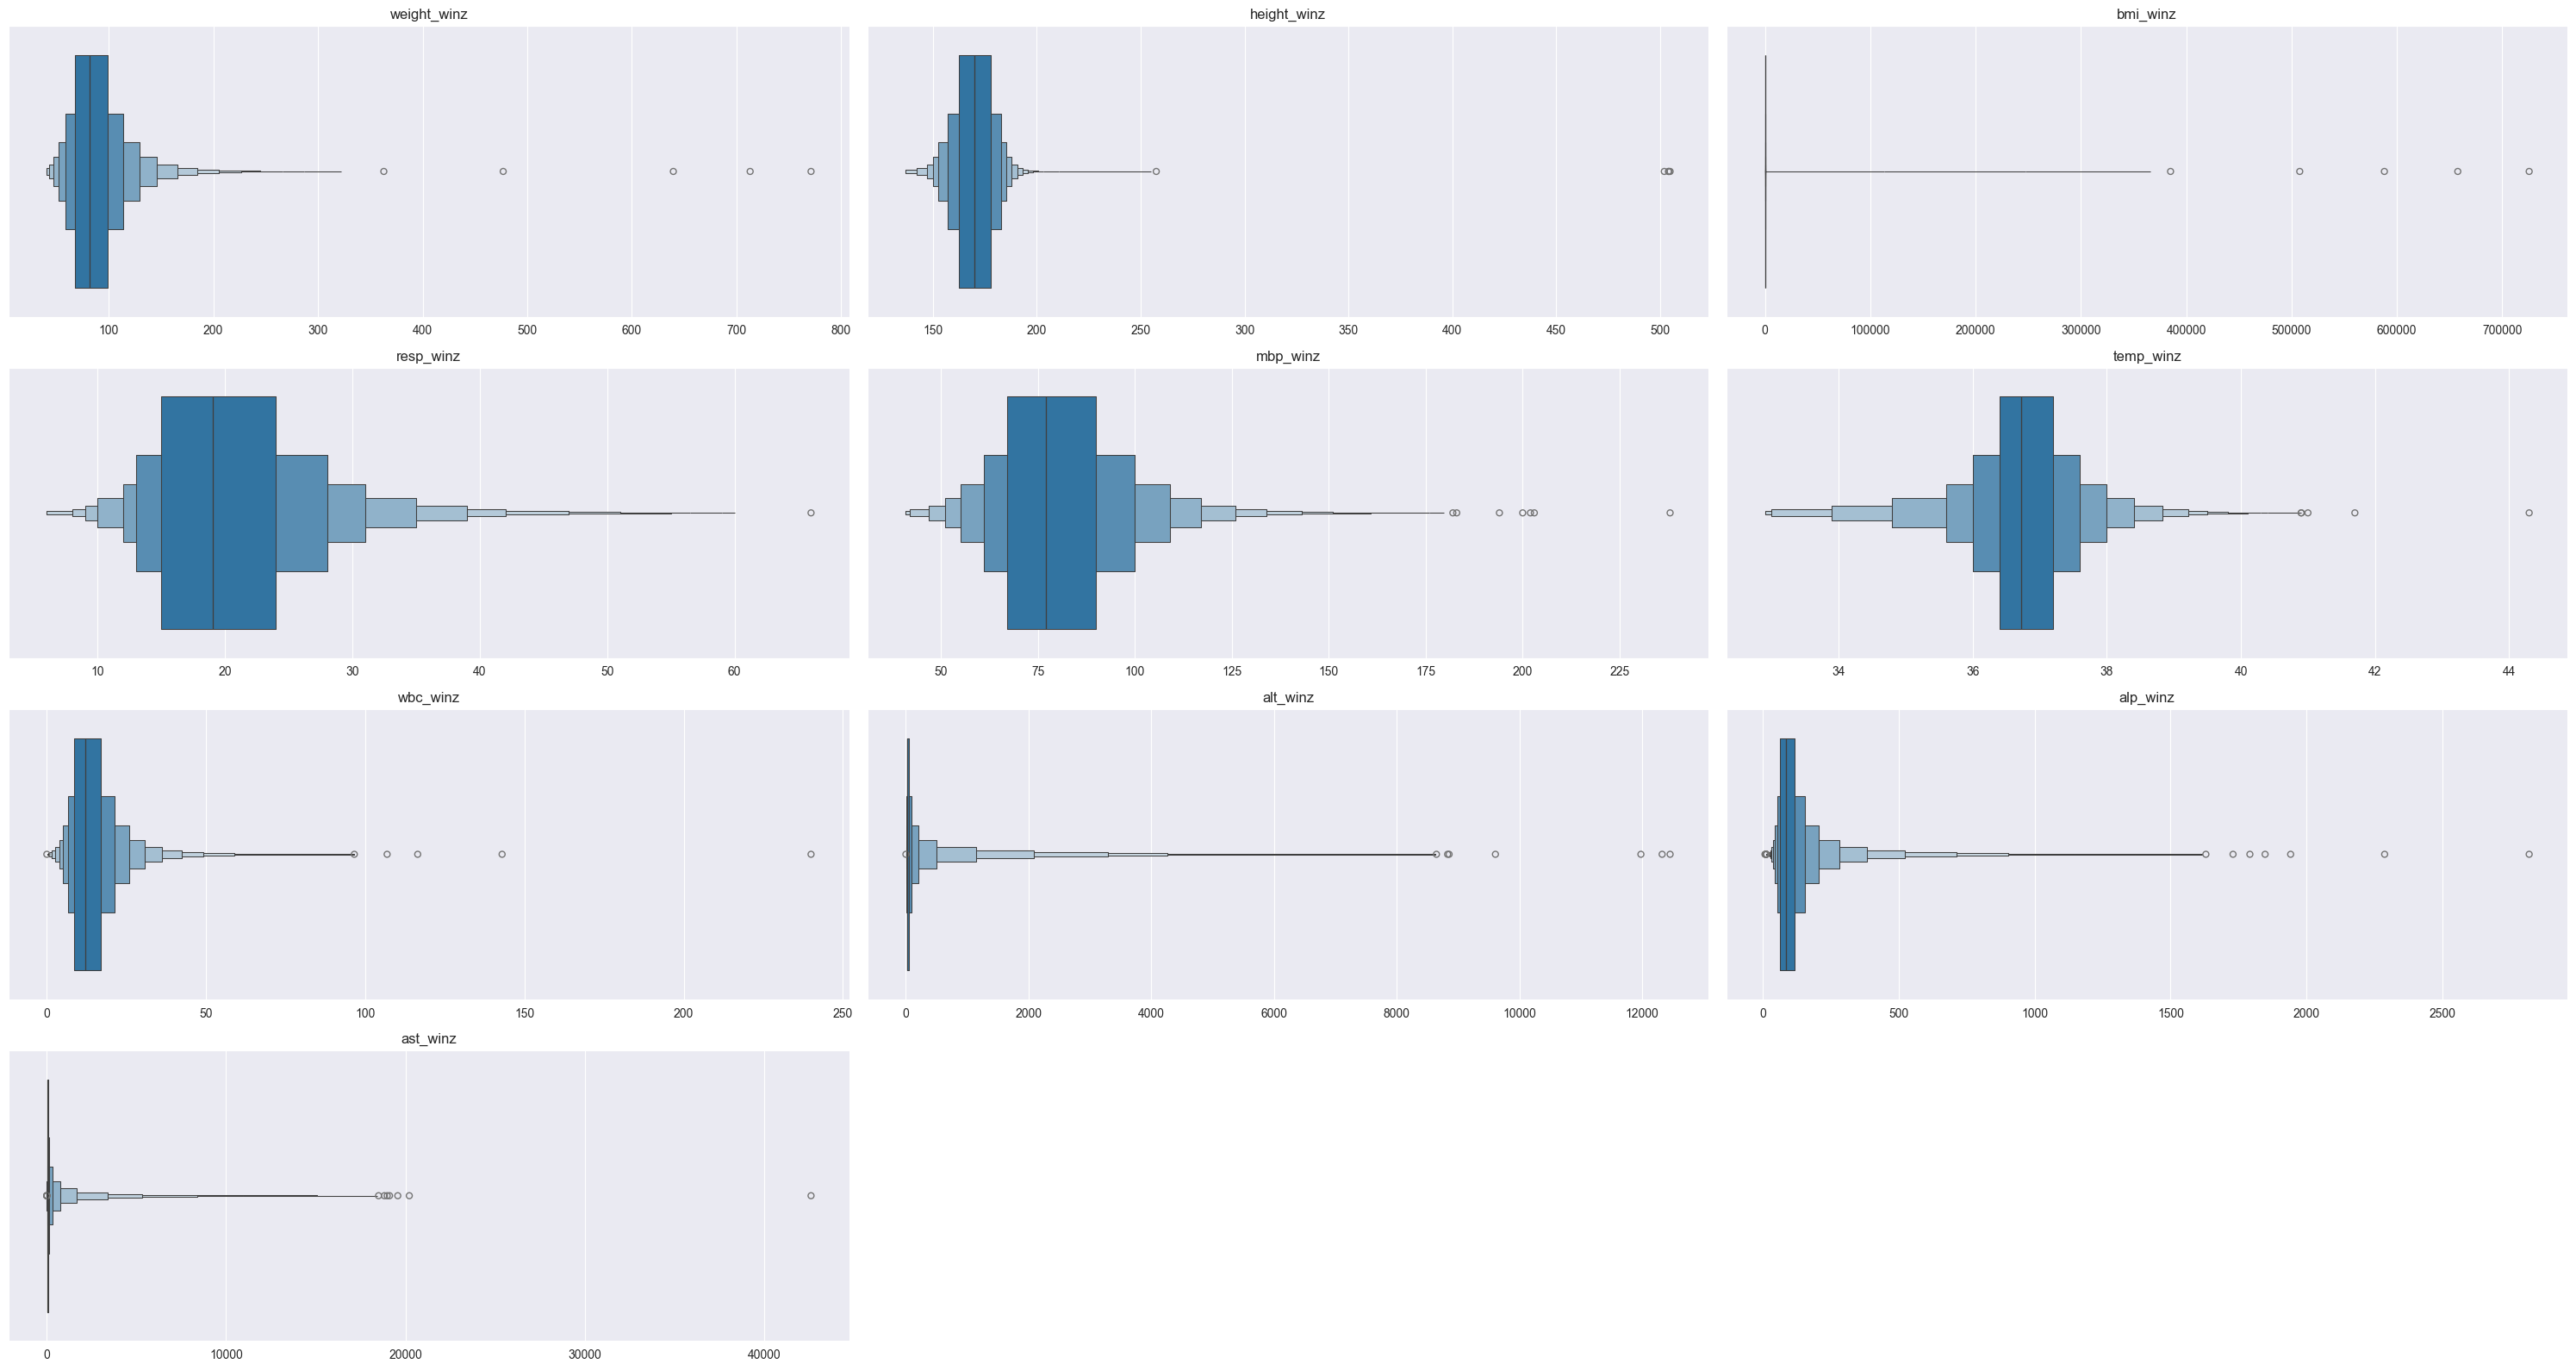

In [62]:
# Examine the new winsorized columns
winz_df = X_train[['weight_winz', 'height_winz', 'bmi_winz', 'resp_winz', 'mbp_winz', 'temp_winz', 'wbc_winz', 'alt_winz', 'alp_winz', 'ast_winz']]
box_plot_viz(winz_df)

In [63]:
#Remake data set with the outliers columns removed
X_train_winz = X_train.drop(columns=outlier_shape, axis = 1)
#verify removal
print(X_train_winz.columns)

Index(['admission_age', 'sex_female', 'race_ethnicity', 'spo2',
       'vitals_heart_rate', 'vitals_sbp_ni', 'cbc_hemoglobin',
       'cbc_hematocrit', 'cbc_mch', 'cbc_mchc', 'cbc_mcv', 'cbc_platelet',
       'cbc_rbc', 'cbc_rdw', 'bmp_sodium', 'bmp_potassium', 'bmp_chloride',
       'bmp_bicarbonate', 'bmp_bun', 'bmp_creatinine', 'bmp_glucose',
       'bmp_aniongap', 'bmp_calcium', 'hfp_albumin', 'weight_winz',
       'height_winz', 'bmi_winz', 'resp_winz', 'mbp_winz', 'temp_winz',
       'wbc_winz', 'alt_winz', 'alp_winz', 'ast_winz'],
      dtype='object')


The winsorization was then performed on the test data. Test data was not used in the process of determining which variables or percentiles to treat in regard to outliers. By keeping the test data outside the evaluation of outliers, data leakage was prevented.

In [64]:
# Apply training winsorization limits to the test data
X_test['weight_winz'] = winsorize(X_test['weight_admission'].values, limits=(0.01, 0.001))
X_test['height_winz'] = winsorize(X_test['height_admission'].values, limits=(0.005, 0.001))
X_test['bmi_winz'] = winsorize(X_test['bmi_admission'].values, limits=(0.05, 0.01))
X_test['resp_winz'] = winsorize(X_test['vitals_resp_rate'].values, limits=(0.005, 0))
X_test['mbp_winz'] = winsorize(X_test['vitals_mbp_ni'].values, limits=(0.005, 0.001))
X_test['temp_winz'] = winsorize(X_test['vitals_tempc'].values, limits=(0.005, 0))
X_test['wbc_winz'] = winsorize(X_test['cbc_wbc'].values, limits=(0, 0.001))
X_test['alt_winz'] = winsorize(X_test['hfp_alt'].values, limits=(0, 0.05))
X_test['alp_winz'] = winsorize(X_test['hfp_alp'].values, limits=(0, 0.01))
X_test['ast_winz'] = winsorize(X_test['hfp_ast'].values, limits=(0, 0.005))

In [65]:
#Remake data set with the outliers removed
X_test_winz = X_test.drop(columns=outlier_shape, axis = 1)
#verify removal
print(X_test_winz.columns)

Index(['admission_age', 'sex_female', 'race_ethnicity', 'spo2',
       'vitals_heart_rate', 'vitals_sbp_ni', 'cbc_hemoglobin',
       'cbc_hematocrit', 'cbc_mch', 'cbc_mchc', 'cbc_mcv', 'cbc_platelet',
       'cbc_rbc', 'cbc_rdw', 'bmp_sodium', 'bmp_potassium', 'bmp_chloride',
       'bmp_bicarbonate', 'bmp_bun', 'bmp_creatinine', 'bmp_glucose',
       'bmp_aniongap', 'bmp_calcium', 'hfp_albumin', 'weight_winz',
       'height_winz', 'bmi_winz', 'resp_winz', 'mbp_winz', 'temp_winz',
       'wbc_winz', 'alt_winz', 'alp_winz', 'ast_winz'],
      dtype='object')


In [66]:
check_alignment(X_train_winz, X_test_winz, y_train, y_test)

X_train: (39274, 34)
y_train: (39274,)
X_test: (9819, 34)
y_test: (9819,)
All datasets aligned correctly!


In [67]:
# Function to check sparsity
def sparcity_check(X_train, X_test, y_train, y_test):   # the function is spelled differently than the word on purpose
    if not isinstance(y_train, pd.DataFrame):
        y_train = pd.DataFrame(y_train, columns=['target'])
    if not isinstance(y_test, pd.DataFrame):
        y_test = pd.DataFrame(y_test, columns=['target'])
    train_full = pd.concat([X_train, y_train], axis=1)
    test_full = pd.concat([X_test, y_test], axis=1)

    # Combine train and test
    combined_df = pd.concat([train_full, test_full], axis=0)
    total_nulls = combined_df.isna().sum().sum()
    total_cells = combined_df.size
    sparsity_percentage = round(total_nulls/total_cells*100, 2)

    print(f"Total sparsity: {total_nulls} missing values out of {total_cells} cells ({sparsity_percentage}%)")

    return sparsity_percentage

##### Clean Data Sparsity

In [68]:
sparcity_check(X_train, X_test, y_train, y_test)

Total sparsity: 423026 missing values out of 2209185 cells (19.15%)


19.15

##### Encode Categorical Variables
Categorical variables must be encoded into numerical values for the RFR model

-----------
Return to [C2: Data Preprocessing](#C2:-Data-Preprocessing) , [Table of Contents](#Table-of-Contents)

In [69]:
#Function to encode the data - one-hot encoding (5 or less) and target encoding (>5 categories)
def wrangle_cat(df, target_values=None, target_col=None, max_categories_for_onehot=5, is_train=True):
    result_df = df.copy()

    for col in result_df.columns:
        if pd.api.types.is_string_dtype(result_df[col]):
            result_df[col] = result_df[col].astype(str).str.strip().str.lower()
            if result_df[col].isin(['yes', 'no', 'true', 'false']).all():
                mapping = {'yes': 1, 'no': 0, 'true': 1, 'false': 0}
                result_df[col] = result_df[col].map(mapping)

    categorical_cols = result_df.columns[result_df.dtypes == 'object']
    high_cardinality_cols = []
    low_cardinality_cols = []
    encoding_maps = {}

    for col in categorical_cols:
        if result_df[col].nunique() > max_categories_for_onehot:
            high_cardinality_cols.append(col)
        else:
            low_cardinality_cols.append(col)

    for col in high_cardinality_cols:
        if is_train:
            df_with_target = pd.DataFrame({col: df[col], 'target': target_values})
            target_means = df_with_target.groupby(col)['target'].mean()
            encoding_maps[col] = target_means

            result_df[col + '_target_encoded'] = result_df[col].map(target_means)
        else:
            result_df[col + '_target_encoded'] = result_df[col].map(target_col)

        result_df = result_df.drop(col, axis=1)

    if low_cardinality_cols:
        result_df = pd.get_dummies(result_df, columns=low_cardinality_cols, dtype=int, drop_first=False)

    if is_train:
        return result_df, encoding_maps
    else:
        return result_df

##### Training and test data were encoded separately to prevent data leakage.

In [70]:
# For training data
X_train_encode, encoding_maps = wrangle_cat(X_train_winz, target_values=y_train, is_train=True, max_categories_for_onehot=5)
X_train_encode.head(10)

,admission_age,sex_female,spo2,vitals_heart_rate,vitals_sbp_ni,cbc_hemoglobin,cbc_hematocrit,cbc_mch,cbc_mchc,cbc_mcv,cbc_platelet,cbc_rbc,cbc_rdw,bmp_sodium,bmp_potassium,bmp_chloride,bmp_bicarbonate,bmp_bun,bmp_creatinine,bmp_glucose,bmp_aniongap,bmp_calcium,hfp_albumin,weight_winz,height_winz,bmi_winz,resp_winz,mbp_winz,temp_winz,wbc_winz,alt_winz,alp_winz,ast_winz,race_ethnicity_target_encoded
17744,77.0,0,96.0,NaN,NaN,13.1,39.3,31.3,33.3,93.8,622.0,4.19,NaN,130.0,5.8,93.0,25.0,78.0,2.70,91.0,12.0,14.0,2.3,82.55,175.3,26.86,NaN,NaN,NaN,73.04,36.0,406.0,49.0,1.151623
36775,90.0,1,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.50,167.6,19.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.151623
29773,67.0,1,100.0,89.0,161.0,7.0,21.4,28.0,32.7,85.6,233.0,2.50,15.0,NaN,NaN,NaN,NaN,NaN,NaN,240.0,NaN,NaN,NaN,190.20,167.6,67.71,29.0,76.0,37.1,24.30,NaN,NaN,NaN,1.692491
521,86.0,1,99.0,66.0,NaN,11.0,35.0,28.2,31.4,89.7,372.0,3.90,17.1,136.0,7.0,102.0,17.0,66.0,2.40,263.0,24.0,9.4,2.2,57.70,167.6,20.54,20.0,NaN,36.6,24.00,16.0,147.0,43.0,1.151623
30702,19.0,0,97.0,114.0,109.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131.0,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.00,165.1,21.65,16.0,79.0,NaN,NaN,NaN,NaN,NaN,1.151623
17508,58.0,0,97.0,NaN,NaN,8.8,28.1,24.1,31.3,77.0,458.0,3.65,NaN,136.0,4.1,109.0,21.0,10.0,0.70,405.0,6.0,7.8,1.1,45.80,160.0,19.00,NaN,NaN,NaN,17.20,19.0,149.0,15.0,1.129546
21502,85.0,0,100.0,98.0,88.0,9.5,34.9,20.3,27.2,74.4,320.0,4.69,20.9,141.0,5.1,110.0,23.0,39.0,3.33,114.0,8.0,7.9,3.2,85.30,172.7,28.60,21.0,55.0,37.6,22.57,23.0,63.0,46.0,1.151623
35909,74.0,0,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138.0,3.7,107.0,23.0,35.0,1.91,111.0,8.0,8.0,NaN,113.90,188.0,32.23,NaN,NaN,34.1,NaN,NaN,NaN,NaN,1.151623
47211,22.0,1,94.0,113.0,119.0,9.8,29.7,27.8,33.1,84.0,295.0,3.54,14.0,136.0,3.6,108.0,21.0,11.0,0.60,76.0,11.0,7.8,2.0,115.00,157.0,46.66,20.0,55.0,NaN,10.40,18.0,101.0,19.0,1.151623
39133,48.0,0,99.0,110.0,112.0,15.0,47.3,25.8,31.6,81.8,335.0,5.79,15.2,132.0,5.0,77.0,11.0,35.0,1.60,492.0,44.0,10.8,4.8,92.90,175.3,30.23,14.0,98.0,NaN,13.40,19.0,109.0,11.0,1.692491


In [71]:
# For test data
X_test_encode = wrangle_cat(X_test_winz, target_col=encoding_maps, is_train=False, max_categories_for_onehot=5)
X_test_encode.head(10)

,admission_age,sex_female,spo2,vitals_heart_rate,vitals_sbp_ni,cbc_hemoglobin,cbc_hematocrit,cbc_mch,cbc_mchc,cbc_mcv,cbc_platelet,cbc_rbc,cbc_rdw,bmp_sodium,bmp_potassium,bmp_chloride,bmp_bicarbonate,bmp_bun,bmp_creatinine,bmp_glucose,bmp_aniongap,bmp_calcium,hfp_albumin,weight_winz,height_winz,bmi_winz,resp_winz,mbp_winz,temp_winz,wbc_winz,alt_winz,alp_winz,ast_winz,race_ethnicity_target_encoded
38120,83.0,0,100.0,133.0,89.0,8.0,25.6,27.0,31.3,86.2,87.0,2.97,NaN,133.0,4.1,103.0,7.0,41.0,1.56,104.0,23.0,8.3,2.5,89.3,190.50,24.61,17.0,68.0,35.90,6.3,16.0,65.0,23.0,NaN
9312,61.0,0,94.0,82.0,72.0,8.7,25.4,27.1,34.3,79.0,142.0,3.21,15.5,144.0,3.7,124.0,10.0,79.0,4.20,101.0,14.0,8.4,1.5,65.0,180.00,20.06,21.0,53.0,34.00,0.3,49.0,106.0,51.0,NaN
8928,85.0,1,97.0,78.0,NaN,10.0,30.3,27.1,33.0,82.0,157.0,3.69,13.7,140.0,3.7,105.0,28.0,20.0,0.60,159.0,7.0,11.4,NaN,73.5,160.00,28.71,27.0,NaN,35.10,8.6,NaN,NaN,NaN,NaN
1827,71.0,1,100.0,74.0,151.0,7.7,27.6,24.4,27.9,87.6,129.0,3.15,23.2,137.0,4.3,93.0,24.0,12.0,2.40,177.0,20.0,7.8,3.5,88.0,167.64,31.31,21.0,69.0,36.11,5.9,19.0,135.0,53.0,NaN
9513,89.0,1,86.0,67.0,119.0,12.4,39.1,32.4,31.7,102.0,196.0,3.83,14.2,139.0,4.3,105.0,28.0,24.0,1.18,83.0,6.0,9.1,3.8,65.1,165.10,23.88,38.0,81.0,NaN,6.0,14.0,57.0,18.0,NaN
30552,31.0,1,96.0,81.0,112.0,7.1,20.2,38.8,35.1,110.4,47.0,1.83,22.1,138.0,3.7,101.0,24.0,9.0,0.50,119.0,13.0,8.5,3.2,59.0,172.70,19.78,16.0,78.0,36.90,3.7,49.0,107.0,91.0,NaN
41312,68.0,1,94.0,66.0,111.0,14.6,43.9,31.9,33.2,95.9,120.0,4.58,13.8,136.0,4.1,103.0,25.0,32.0,0.90,204.0,8.0,NaN,NaN,99.4,172.70,33.33,24.0,78.0,36.90,9.5,27.0,80.0,NaN,NaN
3500,67.0,0,100.0,120.0,146.0,8.4,26.3,28.0,32.0,87.0,146.0,3.01,15.7,136.0,3.9,105.0,24.0,28.0,1.10,203.0,7.0,7.0,2.7,84.3,180.30,25.93,18.0,100.0,37.50,1.3,39.0,87.0,37.0,NaN
33455,90.0,0,92.0,NaN,NaN,10.7,34.0,28.8,31.5,91.0,170.0,3.72,15.0,135.0,4.3,101.0,31.0,31.0,1.62,94.0,9.5,8.9,NaN,70.1,162.60,26.51,NaN,NaN,NaN,3.7,NaN,NaN,NaN,NaN
11554,25.0,0,100.0,95.0,101.0,14.8,45.2,30.4,32.9,92.6,316.0,4.88,12.6,143.0,5.9,98.0,29.0,35.0,1.60,156.0,NaN,NaN,4.6,76.8,182.90,22.96,28.0,83.0,36.00,20.6,82.0,84.0,45.0,NaN


##### Imputation of the Data
Impute the _Nans_ using the Bayesian Ridge iterative imputer

-----------
Return to [C2: Data Preprocessing](#C2:-Data-Preprocessing) , [Table of Contents](#Table-of-Contents)

In [72]:
# Handle NaNs with imputation
# BayesianRidge as estimator
imputer = IterativeImputer(
    estimator=BayesianRidge(),
    n_nearest_features=10
)
imputer.fit(X_train_encode)
X_train_imputed = imputer.transform(X_train_encode)
X_test_imputed = imputer.transform(X_test_encode)

In [73]:
# Convert imputed NumPy arrays back to pandas DataFrames
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X_train_encode.columns)
X_test_imputed_df = pd.DataFrame(X_test_imputed, columns=X_test_encode.columns)

In [74]:
# Reset indices on both dataframes
X_train_imputed_df = X_train_imputed_df.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

#create the combined dataframe
train_data = X_train_imputed_df.copy()
train_data['gap'] = y_train

# Verify the indices are aligned
print(f"X_train_encoded shape: {X_train_encode.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"train_data shape: {train_data.shape}")
print(f"'gap' in train_data columns: {'gap' in train_data.columns}")

X_train_encoded shape: (39274, 34)
y_train shape: (39274,)
train_data shape: (39274, 35)
'gap' in train_data columns: True


##### Feature Engineering
Several features were added to the data since they were not in the original data set. These features are :
- BUN/ Creatinine ratio: a measurement of how well the kidneys are functioning. Elevated ratios may indicate dehydration or kidney problems.
- Oxygen Carrying capacity: how much oxygen a person is able to deliver to the body, based on hemoglobin levels.
- Predicted body weight: An estimate based on height and gender used to determine appropriate ventilator settings. This value serves as a surrogate for lung size.

--------
Return to [B: Data Collection](#B:-Data-Collection) , [Table of Contents](#Table-of-Contents)

In [75]:
# will add column for o2 carrying capacity
X_train_imputed_df.insert(10, 'o2_carry', X_train_imputed_df['cbc_hemoglobin'] * 1.34)
X_test_imputed_df.insert(10, 'o2_carry', X_test_imputed_df['cbc_hemoglobin'] * 1.34)
X_train_imputed_df.head(10)

,admission_age,sex_female,spo2,vitals_heart_rate,vitals_sbp_ni,cbc_hemoglobin,cbc_hematocrit,cbc_mch,cbc_mchc,cbc_mcv,o2_carry,cbc_platelet,cbc_rbc,cbc_rdw,bmp_sodium,bmp_potassium,bmp_chloride,bmp_bicarbonate,bmp_bun,bmp_creatinine,bmp_glucose,bmp_aniongap,bmp_calcium,hfp_albumin,weight_winz,height_winz,bmi_winz,resp_winz,mbp_winz,temp_winz,wbc_winz,alt_winz,alp_winz,ast_winz,race_ethnicity_target_encoded
0,77.0,0.0,96.0,93.651957,115.399476,13.100000,39.300000,31.300000,33.300000,93.800000,17.554000,622.000000,4.190000,15.538800,130.000000,5.800000,93.000000,25.000000,78.000000,2.700000,91.000000,12.000000,14.000000,2.300000,82.55,175.3,26.86,22.848474,77.152766,37.116238,73.040000,36.000000,406.000000,49.000000,1.151623
1,90.0,1.0,86.0,88.343687,109.792537,10.962366,33.818113,29.498348,32.302577,91.362421,14.689570,216.025359,3.732060,15.888665,139.191002,4.189098,103.324017,23.931627,35.321574,1.721368,151.807229,12.792769,8.256877,2.785672,52.50,167.6,19.00,23.201213,74.730043,36.745236,13.944013,102.411136,109.539395,154.306487,1.151623
2,67.0,1.0,100.0,89.000000,161.000000,7.000000,21.400000,28.000000,32.700000,85.600000,9.380000,233.000000,2.500000,15.000000,137.789395,4.244146,103.490459,20.747175,39.184011,3.095699,240.000000,15.087799,8.088201,2.492538,190.20,167.6,67.71,29.000000,76.000000,37.100000,24.300000,112.189762,120.678819,182.201876,1.692491
3,86.0,1.0,99.0,66.000000,106.602061,11.000000,35.000000,28.200000,31.400000,89.700000,14.740000,372.000000,3.900000,17.100000,136.000000,7.000000,102.000000,17.000000,66.000000,2.400000,263.000000,24.000000,9.400000,2.200000,57.70,167.6,20.54,20.000000,70.107212,36.600000,24.000000,16.000000,147.000000,43.000000,1.151623
4,19.0,0.0,97.0,114.000000,109.000000,11.662283,34.227424,30.650782,34.341502,89.213036,15.627459,216.599015,3.834184,14.376844,131.000000,3.500000,102.565748,19.732733,18.367165,1.173080,173.707630,13.479235,7.877342,3.205636,59.00,165.1,21.65,16.000000,79.000000,36.976719,14.662529,113.766369,96.289952,187.317020,1.151623
5,58.0,0.0,97.0,99.874132,117.383901,8.800000,28.100000,24.100000,31.300000,77.000000,11.792000,458.000000,3.650000,17.094299,136.000000,4.100000,109.000000,21.000000,10.000000,0.700000,405.000000,6.000000,7.800000,1.100000,45.80,160.0,19.00,21.551785,79.085564,36.570246,17.200000,19.000000,149.000000,15.000000,1.129546
6,85.0,0.0,100.0,98.000000,88.000000,9.500000,34.900000,20.300000,27.200000,74.400000,12.730000,320.000000,4.690000,20.900000,141.000000,5.100000,110.000000,23.000000,39.000000,3.330000,114.000000,8.000000,7.900000,3.200000,85.30,172.7,28.60,21.000000,55.000000,37.600000,22.570000,23.000000,63.000000,46.000000,1.151623
7,74.0,0.0,99.0,70.602423,111.919759,11.246928,33.472409,30.250022,33.363684,90.709621,15.070883,175.949093,3.731004,15.100132,138.000000,3.700000,107.000000,23.000000,35.000000,1.910000,111.000000,8.000000,8.000000,3.067682,113.90,188.0,32.23,17.427667,74.196858,34.100000,12.817852,89.405439,94.343282,138.198130,1.151623
8,22.0,1.0,94.0,113.000000,119.000000,9.800000,29.700000,27.800000,33.100000,84.000000,13.132000,295.000000,3.540000,14.000000,136.000000,3.600000,108.000000,21.000000,11.000000,0.600000,76.000000,11.000000,7.800000,2.000000,115.00,157.0,46.66,20.000000,55.000000,37.114978,10.400000,18.000000,101.000000,19.000000,1.151623
9,48.0,0.0,99.0,110.000000,112.000000,15.000000,47.300000,25.800000,31.600000,81.800000,20.100000,335.000000,5.790000,15.200000,132.000000,5.000000,77.000000,11.000000,35.000000,1.600000,492.000000,44.000000,10.800000,4.800000,92.90,175.3,30.23,14.000000,98.000000,36.489625,13.400000,19.000000,109.000000,11.000000,1.692491


In [76]:
# Add BUN/ Creatinine ratio
X_train_imputed_df.insert(25, 'bun_cr_ratio', X_train_imputed_df['bmp_bun'] / X_train_imputed_df['bmp_creatinine'])
X_test_imputed_df.insert(25, 'bun_cr_ratio', X_test_imputed_df['bmp_bun'] / X_test_imputed_df['bmp_creatinine'])
X_test_imputed_df.head(10)

,admission_age,sex_female,spo2,vitals_heart_rate,vitals_sbp_ni,cbc_hemoglobin,cbc_hematocrit,cbc_mch,cbc_mchc,cbc_mcv,o2_carry,cbc_platelet,cbc_rbc,cbc_rdw,bmp_sodium,bmp_potassium,bmp_chloride,bmp_bicarbonate,bmp_bun,bmp_creatinine,bmp_glucose,bmp_aniongap,bmp_calcium,hfp_albumin,weight_winz,bun_cr_ratio,height_winz,bmi_winz,resp_winz,mbp_winz,temp_winz,wbc_winz,alt_winz,alp_winz,ast_winz,race_ethnicity_target_encoded
0,83.0,0.0,100.0,133.000000,89.000000,8.0,25.6,27.0,31.3,86.2,10.720,87.0,2.97,17.352827,133.0,4.1,103.0,7.0,41.0,1.56,104.0,23.000000,8.300000,2.500000,89.3,26.282051,190.50,24.61,17.000000,68.000000,35.900000,6.3,16.000000,65.000000,23.000000,1.231066
1,61.0,0.0,94.0,82.000000,72.000000,8.7,25.4,27.1,34.3,79.0,11.658,142.0,3.21,15.500000,144.0,3.7,124.0,10.0,79.0,4.20,101.0,14.000000,8.400000,1.500000,65.0,18.809524,180.00,20.06,21.000000,53.000000,34.000000,0.3,49.000000,106.000000,51.000000,1.265002
2,85.0,1.0,97.0,78.000000,114.351516,10.0,30.3,27.1,33.0,82.0,13.400,157.0,3.69,13.700000,140.0,3.7,105.0,28.0,20.0,0.60,159.0,7.000000,11.400000,2.831257,73.5,33.333333,160.00,28.71,27.000000,76.625796,35.100000,8.6,55.143496,88.723919,59.318223,1.209196
3,71.0,1.0,100.0,74.000000,151.000000,7.7,27.6,24.4,27.9,87.6,10.318,129.0,3.15,23.200000,137.0,4.3,93.0,24.0,12.0,2.40,177.0,20.000000,7.800000,3.500000,88.0,5.000000,167.64,31.31,21.000000,69.000000,36.110000,5.9,19.000000,135.000000,53.000000,1.294262
4,89.0,1.0,86.0,67.000000,119.000000,12.4,39.1,32.4,31.7,102.0,16.616,196.0,3.83,14.200000,139.0,4.3,105.0,28.0,24.0,1.18,83.0,6.000000,9.100000,3.800000,65.1,20.338983,165.10,23.88,38.000000,81.000000,36.785326,6.0,14.000000,57.000000,18.000000,1.134160
5,31.0,1.0,96.0,81.000000,112.000000,7.1,20.2,38.8,35.1,110.4,9.514,47.0,1.83,22.100000,138.0,3.7,101.0,24.0,9.0,0.50,119.0,13.000000,8.500000,3.200000,59.0,18.000000,172.70,19.78,16.000000,78.000000,36.900000,3.7,49.000000,107.000000,91.000000,1.187898
6,68.0,1.0,94.0,66.000000,111.000000,14.6,43.9,31.9,33.2,95.9,19.564,120.0,4.58,13.800000,136.0,4.1,103.0,25.0,32.0,0.90,204.0,8.000000,8.610658,3.314356,99.4,35.555556,172.70,33.33,24.000000,78.000000,36.900000,9.5,27.000000,80.000000,29.720027,1.182050
7,67.0,0.0,100.0,120.000000,146.000000,8.4,26.3,28.0,32.0,87.0,11.256,146.0,3.01,15.700000,136.0,3.9,105.0,24.0,28.0,1.10,203.0,7.000000,7.000000,2.700000,84.3,25.454545,180.30,25.93,18.000000,100.000000,37.500000,1.3,39.000000,87.000000,37.000000,1.255882
8,90.0,0.0,92.0,83.042568,114.388373,10.7,34.0,28.8,31.5,91.0,14.338,170.0,3.72,15.000000,135.0,4.3,101.0,31.0,31.0,1.62,94.0,9.500000,8.900000,2.939321,70.1,19.135802,162.60,26.51,20.780454,76.993104,36.781140,3.7,71.582153,94.708601,98.084416,1.187877
9,25.0,0.0,100.0,95.000000,101.000000,14.8,45.2,30.4,32.9,92.6,19.832,316.0,4.88,12.600000,143.0,5.9,98.0,29.0,35.0,1.60,156.0,9.495151,9.262870,4.600000,76.8,21.875000,182.90,22.96,28.000000,83.000000,36.000000,20.6,82.000000,84.000000,45.000000,1.259067


In [77]:
# Will add a predicted body weight column, as that is what ventilator setting are based on if following the ARDSNet criteria
X_train_imputed_df.insert(32, 'pbw', X_train_imputed_df.apply(lambda x:
    (45.5 + 0.91 * (x['height_winz'] - 152.4)) if x['sex_female'] == 1
    else (50 + 0.91 * (x['height_winz'] - 152.4)), axis=1))

X_test_imputed_df.insert(32, 'pbw', X_test_imputed_df.apply(lambda x:
    (45.5 + 0.91 * (x['height_winz'] - 152.4)) if x['sex_female'] == 1
    else (50 + 0.91 * (x['height_winz'] - 152.4)), axis=1))

X_train_imputed_df.head(10)

,admission_age,sex_female,spo2,vitals_heart_rate,vitals_sbp_ni,cbc_hemoglobin,cbc_hematocrit,cbc_mch,cbc_mchc,cbc_mcv,o2_carry,cbc_platelet,cbc_rbc,cbc_rdw,bmp_sodium,bmp_potassium,bmp_chloride,bmp_bicarbonate,bmp_bun,bmp_creatinine,bmp_glucose,bmp_aniongap,bmp_calcium,hfp_albumin,weight_winz,bun_cr_ratio,height_winz,bmi_winz,resp_winz,mbp_winz,temp_winz,wbc_winz,pbw,alt_winz,alp_winz,ast_winz,race_ethnicity_target_encoded
0,77.0,0.0,96.0,93.651957,115.399476,13.100000,39.300000,31.300000,33.300000,93.800000,17.554000,622.000000,4.190000,15.538800,130.000000,5.800000,93.000000,25.000000,78.000000,2.700000,91.000000,12.000000,14.000000,2.300000,82.55,28.888889,175.3,26.86,22.848474,77.152766,37.116238,73.040000,70.839,36.000000,406.000000,49.000000,1.151623
1,90.0,1.0,86.0,88.343687,109.792537,10.962366,33.818113,29.498348,32.302577,91.362421,14.689570,216.025359,3.732060,15.888665,139.191002,4.189098,103.324017,23.931627,35.321574,1.721368,151.807229,12.792769,8.256877,2.785672,52.50,20.519482,167.6,19.00,23.201213,74.730043,36.745236,13.944013,59.332,102.411136,109.539395,154.306487,1.151623
2,67.0,1.0,100.0,89.000000,161.000000,7.000000,21.400000,28.000000,32.700000,85.600000,9.380000,233.000000,2.500000,15.000000,137.789395,4.244146,103.490459,20.747175,39.184011,3.095699,240.000000,15.087799,8.088201,2.492538,190.20,12.657564,167.6,67.71,29.000000,76.000000,37.100000,24.300000,59.332,112.189762,120.678819,182.201876,1.692491
3,86.0,1.0,99.0,66.000000,106.602061,11.000000,35.000000,28.200000,31.400000,89.700000,14.740000,372.000000,3.900000,17.100000,136.000000,7.000000,102.000000,17.000000,66.000000,2.400000,263.000000,24.000000,9.400000,2.200000,57.70,27.500000,167.6,20.54,20.000000,70.107212,36.600000,24.000000,59.332,16.000000,147.000000,43.000000,1.151623
4,19.0,0.0,97.0,114.000000,109.000000,11.662283,34.227424,30.650782,34.341502,89.213036,15.627459,216.599015,3.834184,14.376844,131.000000,3.500000,102.565748,19.732733,18.367165,1.173080,173.707630,13.479235,7.877342,3.205636,59.00,15.657211,165.1,21.65,16.000000,79.000000,36.976719,14.662529,61.557,113.766369,96.289952,187.317020,1.151623
5,58.0,0.0,97.0,99.874132,117.383901,8.800000,28.100000,24.100000,31.300000,77.000000,11.792000,458.000000,3.650000,17.094299,136.000000,4.100000,109.000000,21.000000,10.000000,0.700000,405.000000,6.000000,7.800000,1.100000,45.80,14.285714,160.0,19.00,21.551785,79.085564,36.570246,17.200000,56.916,19.000000,149.000000,15.000000,1.129546
6,85.0,0.0,100.0,98.000000,88.000000,9.500000,34.900000,20.300000,27.200000,74.400000,12.730000,320.000000,4.690000,20.900000,141.000000,5.100000,110.000000,23.000000,39.000000,3.330000,114.000000,8.000000,7.900000,3.200000,85.30,11.711712,172.7,28.60,21.000000,55.000000,37.600000,22.570000,68.473,23.000000,63.000000,46.000000,1.151623
7,74.0,0.0,99.0,70.602423,111.919759,11.246928,33.472409,30.250022,33.363684,90.709621,15.070883,175.949093,3.731004,15.100132,138.000000,3.700000,107.000000,23.000000,35.000000,1.910000,111.000000,8.000000,8.000000,3.067682,113.90,18.324607,188.0,32.23,17.427667,74.196858,34.100000,12.817852,82.396,89.405439,94.343282,138.198130,1.151623
8,22.0,1.0,94.0,113.000000,119.000000,9.800000,29.700000,27.800000,33.100000,84.000000,13.132000,295.000000,3.540000,14.000000,136.000000,3.600000,108.000000,21.000000,11.000000,0.600000,76.000000,11.000000,7.800000,2.000000,115.00,18.333333,157.0,46.66,20.000000,55.000000,37.114978,10.400000,49.686,18.000000,101.000000,19.000000,1.151623
9,48.0,0.0,99.0,110.000000,112.000000,15.000000,47.300000,25.800000,31.600000,81.800000,20.100000,335.000000,5.790000,15.200000,132.000000,5.000000,77.000000,11.000000,35.000000,1.600000,492.000000,44.000000,10.800000,4.800000,92.90,21.875000,175.3,30.23,14.000000,98.000000,36.489625,13.400000,70.839,19.000000,109.000000,11.000000,1.692491


In [78]:
X_train_imputed_df.shape

(39274, 37)

In [79]:
check_alignment(X_train_imputed_df, X_test_imputed_df, y_train, y_test)

X_train: (39274, 37)
y_train: (39274,)
X_test: (9819, 37)
y_test: (9819,)
All datasets aligned correctly!


In [80]:
sparcity_check(X_train_imputed_df, X_test_imputed_df, y_train, y_test)

Total sparsity: 49093 missing values out of 1865534 cells (2.63%)


2.63

## D: Random Forest Regression Analysis
This analysis created two different models, one with the synthesized data to handle the data imbalance, and one that only used the stratified data.  The SMOGN model had worse results than the stratified only data and required significantly more computational time that included six hours for balancing of the data and over ten hours for the hyperparameter tuning. Further tuning of the parameters within the SMOTER or Optuna was prohibitive due to these extended run times. The stratified only data was used for the final model and analysis. The SMOTER model creation and results can be found in the Appendix.

After the data was cleaned, prepared and split, it was then used to create a random forest regression (RFR) model. RFR was chosen for its ability to handle a large number of variables. It is an ensemble method, meaning that it creates many different trees and averages the results to reduce variability. An attribute of an RFR model is the ability to determine which features are the most important in regard to the model’s accuracy. It is more resistant to overfitting, but it can be more difficult to interpret than other types of regression models.


An [initial model](#Initial-Random-Forest-Regression-model) was built and baseline metrics calculated.  The metrics used to evaluate the model were:
- Mean absolute error (MAE) : The average absolute  measure of the difference between predicted and actual values. The units are the same as the target variable. Lower values indicate better model performance.
    > MAE = (1/n) * Σ|y_i - ŷ_i|
- Mean squared error (MSE) : The average measure of predicted and actual values, squared. Larger errors are penalized more due to the values being squared, and lower values indicate better model performance.
    > MSE = (1/n) * Σ(y_i - ŷ_i)²
- Root mean squared error (RMSE): This is the root value of MSE and is in the same units as the target variable. Larger errors are penalized, and it is easier to interpret than MSE. Lower values are again indicative of better model performance.
    > RMSE = √[(1/n) * Σ(y_i - ŷ_i)²] = √MSE
- R2 score (Coefficient of Determination): The measurement of the amount variance in the target variable that can be predicted from the independent variables. This typically ranges from 0 to 1, with higher values representing more robust models. Values less than zero indicate that a model’s performance is worse than if the mean had simply been used as the prediction.
    > R² = 1 - [Σ(y_i - ŷ_i)² / Σ(y_i - ȳ)²] = 1 - (MSE / Variance of y)

After the basic model was [evaluated](#Evaluations-Metrics), [feature selection](#Feature-Selection) was performed. This is done to reduce dimensionality and improve model performance. A disadvantage to this technique of using only the most important variables is that some features may be removed that have a complex relationship with the target variable.

An [Optuna study](#Optuna-Study) was performed for hyperparameter optimization (Preferred Networks, Inc., 2024). Optuna is able to search for the best hyperparameters, as well as ending poor performing trials early. This allows for reduced computational time. A weakness of the Optuna studies is that multiple studies may need to be done in order to ensure that the optimal hyperparameters have been found.

The [final model](#Final-Model) was trained using the Optuna hyperparameters. The test data was then used in the model and the evaluation metrics [compared](#Model-Comparison) with those of the baseline model. While there was some improvement in metrics with the final model, overall, the improvement was not enough to reject the stated null hypothesis that a random forest model cannot detect the difference between the SpO2 and the SaO2 with an RMSE of less than 3 percentage points.

[Visualizations](#Visualizations) for stakeholders were created using the package SHapley Additive exPlanations (SHAP), which aims to simplify the explanation of machine learning models results. The visualization allows for an easier understanding of the impact the features have on the model. The SHAP values presented are based on the game theory developed by Lloyd S. Shapley in 1953 that assigns values to the features based on the contribution to the prediction (Molnar, 2025). An advantage of this package is the built-in visualizations and computations. A shortcoming is that the results may be misunderstood to be the causal relationship the features have with the target variable rather than the influence on the model.

##### Initial Random Forest Regression model

----------
Return to [D: Random Forest Regression Analysis](#D:-Random-Forest-Regression-Analysis) , [Table of Contents](#Table-of-Contents)

In [81]:
# Initialize and build a Random forest model for the data that was stratified (but not oversampled data)
rfr_stratified = RandomForestRegressor(
    n_estimators=100,
    max_features="sqrt",  # Square root of the number of features for a regression task
    random_state=42,
    oob_score=True
)
rfr_stratified.fit(X_train_imputed_df, y_train)
y_pred_rfr_strat = rfr_stratified.predict(X_test_imputed_df)

##### Visualization of the first tree

[Text(0.5, 0.9, 'spo2 <= 85.5\nsquared_error = 14.956\nsamples = 24838\nvalue = 1.217'),
 Text(0.25, 0.7, 'vitals_sbp_ni <= 120.72\nsquared_error = 93.762\nsamples = 475\nvalue = -9.687'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'spo2 <= 79.5\nsquared_error = 95.661\nsamples = 340\nvalue = -10.872'),
 Text(0.0625, 0.3, 'cbc_rbc <= 2.02\nsquared_error = 98.759\nsamples = 134\nvalue = -16.125'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'admission_age <= 75.5\nsquared_error = 62.583\nsamples = 206\nvalue = -7.343'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'cbc_mchc <= 33.005\nsquared_error = 77.986\nsamples = 135\nvalue = -6.871'),
 Text(0.3125, 0.3, 'bmp_bun <= 107.5\nsquared_error = 63.03\nsamples = 81\nvalue = -4.895'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'spo2 <= 79.5\nsquared_error = 85.492\nsamples = 54\nvalue =

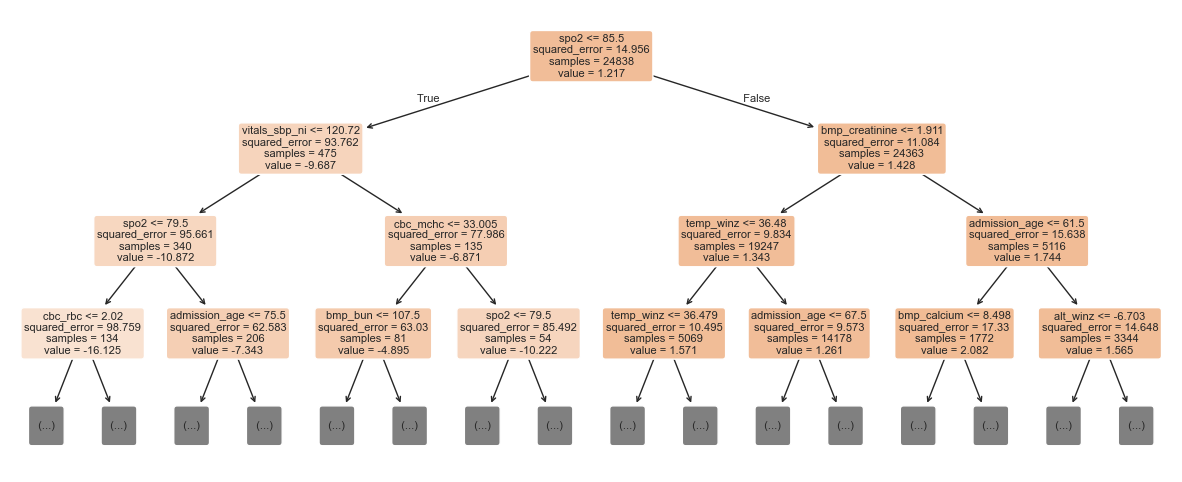

In [82]:
# First tree of stratified data
# Define feature_names as a list of column names
feature_names_strat = X_train_imputed_df.columns.tolist()

# Extract the first tree from RFR_stratified model
first_tree_strat = rfr_stratified.estimators_[0]
plt.figure(figsize=(15,6))
tree.plot_tree(first_tree_strat,
               feature_names=feature_names_strat,
               fontsize=8,
               filled=True,
               rounded=True,
               max_depth=3)

##### Evaluation Metrics

------------
Return to [D: Analysis](#D:-Analysis) , [Table of Contents](#Table-of-Contents)

In [83]:
#Evaluation metrics for initial model
mse_strat = round(mean_squared_error(y_test, y_pred_rfr_strat), 2)
rmse_strat = round(np.sqrt(mean_squared_error(y_test, y_pred_rfr_strat)), 2)  # Calculate RMSE
# View scores
print("Mean Absolute Error:", round(mean_absolute_error(y_test, y_pred_rfr_strat), 2))
print("Mean Squared Error:", mse_strat)
print("Root Mean Squared Error:", rmse_strat)
print("R² Score:", round(r2_score(y_test, y_pred_rfr_strat), 4))

Mean Absolute Error: 2.11
Mean Squared Error: 11.11
Root Mean Squared Error: 3.33
R² Score: 0.2287


##### Feature Selection

----------
Return to [D: Random Forest Regression Analysis](#D:-Random-Forest-Regression-Analysis) , [Table of Contents](#Table-of-Contents)

In [84]:
# Select features using only training data to reduce data leakage
selector = SelectFromModel(rfr_stratified, threshold="median")
selector.fit(X_train_imputed_df, y_train)

# Get selected feature names
selected_features = X_train_imputed_df.columns[selector.get_support()]
print(f"Selected {len(selected_features)} features out of {X_train_imputed_df.shape[1]}")
print(selected_features.tolist())

# Transform data to use only selected features
X_train_selected_strat = selector.transform(X_train_imputed_df)
X_test_selected_strat = selector.transform(X_test_imputed_df)

Selected 19 features out of 37
['admission_age', 'spo2', 'vitals_heart_rate', 'vitals_sbp_ni', 'cbc_mchc', 'cbc_platelet', 'cbc_rdw', 'bmp_creatinine', 'bmp_glucose', 'bmp_aniongap', 'weight_winz', 'bun_cr_ratio', 'bmi_winz', 'mbp_winz', 'temp_winz', 'wbc_winz', 'alt_winz', 'alp_winz', 'ast_winz']


The model determined that 19 features were important for predictions of the target variable. These features were visualized in order of importance.

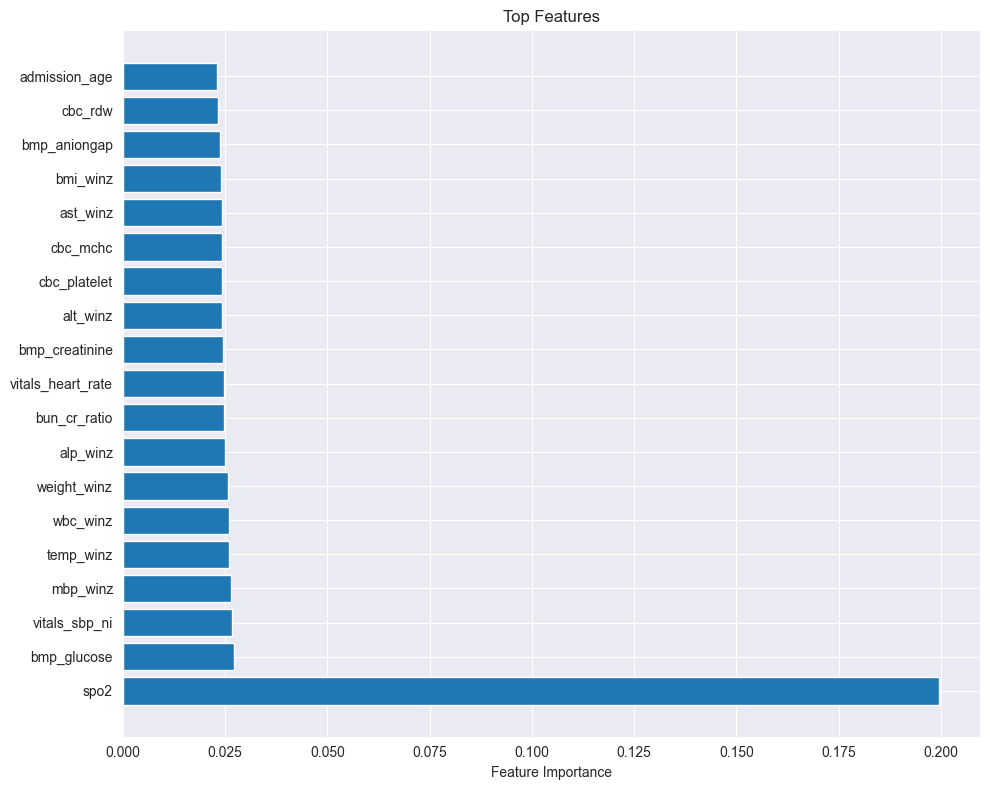

In [85]:
# Get feature importance
importances_strat = rfr_stratified.feature_importances_
feature_names_strat = X_train_imputed_df.columns
indices = np.argsort(importances_strat)[::-1]

# Plot only top features
plt.figure(figsize=(10, 8))
plt.barh(range(19), importances_strat[indices][:19])
plt.yticks(range(19), [feature_names_strat[i] for i in indices[:19]])
plt.xlabel('Feature Importance')
plt.title('Top Features')
plt.tight_layout()
plt.show()

##### Optuna Study
An optuna study was done to determine the best hyperparameters to use in the RFR model.

> **Note**: The output from this code is _tracking_ of the process, _not an error_.

------------
Return to [D: Random Forest Regression Analysis](#D:-Random-Forest-Regression-Analysis) , [Table of Contents](#Table-of-Contents)

In [86]:
# Define the objective function for Optuna
# Time needed - approx 45 min
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 800),
        'max_depth': trial.suggest_int('max_depth', 10, 80, log=True),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', 0.5, None]),
        'max_samples': trial.suggest_categorical('max_samples', [0.7, 0.9, None])
    }

    rf = RandomForestRegressor(**params, random_state=42)
    score = cross_val_score(
        rf,
        X_train_selected_strat,
        y_train,
        cv=3,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    # Convert MSE to RMSE
    return np.sqrt(-np.mean(score))  # Square root of MSE = RMSE

study_strat = optuna.create_study(direction='minimize')
study_strat.optimize(objective, n_trials=50)

print("Best trial:")
trial_strat = study_strat.best_trial
print("  Value: {}".format(trial_strat.value))
print("  Params: ")
for key, value in trial_strat.params.items():
    print("    {}: {}".format(key, value))

[I 2025-03-31 08:39:48,895] A new study created in memory with name: no-name-f590f5fb-c105-4473-a16d-95b33fb7923d
[I 2025-03-31 08:40:05,892] Trial 0 finished with value: 3.4277416450202116 and parameters: {'n_estimators': 233, 'max_depth': 27, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': None}. Best is trial 0 with value: 3.4277416450202116.
[I 2025-03-31 08:40:34,996] Trial 1 finished with value: 3.4189183216435963 and parameters: {'n_estimators': 464, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_samples': 0.9}. Best is trial 1 with value: 3.4189183216435963.
[I 2025-03-31 08:41:19,952] Trial 2 finished with value: 3.4146876471638263 and parameters: {'n_estimators': 622, 'max_depth': 11, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 0.5, 'max_samples': None}. Best is trial 2 with value: 3.4146876471638263.
[I 2025-03-31 08:41:36,073] Trial 3 finished with value: 3.4267664922279706 a

Best trial:
  Value: 3.4144803305538245
  Params: 
    n_estimators: 793
    max_depth: 12
    min_samples_split: 5
    min_samples_leaf: 4
    max_features: 0.5
    max_samples: 0.9


##### Due to the amount of time that was taken to run the optimization search, the study was saved to avoid re-running if the notebook had to be re-run at any point in the analysis.

In [88]:
# Save the completed study
joblib.dump(study_strat, 'optuna_strat.pkl')

# To load it later:
#loaded_study = joblib.load('optuna_strat.pkl')

['optuna_strat.pkl']

##### Final Model
The final model was fit and trained on the data using the best fit determined from the Optuna study. The data used for this model was the top 19 features selected from the initial model.

------------
Return to [D: Random Forest Regression Analysis](#D:-Random-Forest-Regression-Analysis) , [Table of Contents](#Table-of-Contents)

In [91]:
# Train the best model on the selected features training set
#best_params_strat = loaded_study.best_params # If using loaded study
best_params_strat = study_strat.best_params
best_rf_strat = RandomForestRegressor(**best_params_strat, random_state=42)
best_rf_strat.fit(X_train_selected_strat, y_train)

RandomForestRegressor(max_depth=12, max_features=0.5, max_samples=0.9,
                      min_samples_leaf=4, min_samples_split=5, n_estimators=793,
                      random_state=42)

##### Make Predictions
The test data was then fit to the final model and evaluated using the same four metrics as the initial model.

--------------
Return to [D: Random Forest Regression Analysis](#D:-Random-Forest-Regression-Analysis) , [Table of Contents](#Table-of-Contents)

In [92]:
# Make predictions using the test data
y_pred_optuna_strat = best_rf_strat.predict(X_test_selected_strat)

In [93]:
#Evaluation metrics
mse_optuna_strat = round(mean_squared_error(y_test, y_pred_optuna_strat), 2)
rmse_optuna_strat = round(np.sqrt(mean_squared_error(y_test, y_pred_optuna_strat)), 2)
# View accuracy scores
print("Mean Absolute Error:", round(mean_absolute_error(y_test, y_pred_optuna_strat), 2))
print("Mean Squared Error:", mse_optuna_strat)
print("Root Mean Squared Error:", rmse_optuna_strat)
print("R² Score:", round(r2_score(y_test, y_pred_optuna_strat), 4))

Mean Absolute Error: 2.08
Mean Squared Error: 10.83
Root Mean Squared Error: 3.29
R² Score: 0.2483


#### Model Comparison
Comparison of the basic model to the final model


| Metric                    | Model 1 | Model 2 |
|---------------------------|---------|---------|
| Mean Absolute Error (MAE) | 2.13    | 2.08    |
| Mean Squared Error (MSE)  | 11.12   | 10.83   |
| Root Mean Squared Error (RMSE) | 3.33    | 3.29    |
| R² Score                  | 0.2279  | 0.2483  |

-----------
Return to [D: Random Forest Regression Analysis](#D:-Random-Forest-Regression-Analysis) , [Table of Contents](#Table-of-Contents)

## E: Data Summary and Implications
The model was unable to predict SpO2 - SaO2 gap value, as shown by the RMSE. While it was close with a final value of 3.29, this is slightly worse than the current FDA standard for pulse oximetry accuracy requirements. The null hypothesis of a random forest model cannot detect the difference between the SpO2 and the SaO2 with an RMSE of less than 3 percentage points failed to be rejected.

The [final model](#Model-Comparison) did show improvement over the initial model, with the actual improvement being only a difference of 0.04 RMSE.

For the final model, the MAE was 2.08, meaning that on average, the error was 2%. In the medical realm, that amount can be the difference between the diagnosis of hypoxemia and all the treatments that accompany the diagnosis. There was also an improvement in the MSE, although it remained high. The R2 score also remained very low. Overall, these metrics revealed that the RFR model was not able to predict the actual SpO2 values appropriately.

A [confusion matrix](#Confusion-Matrix) was also done to evaluate the accuracy and recall of the model. This RFR can be considered a “model” study in why accuracy should not be the only metric used for evaluation. This accuracy of the final RFR was 84%, which on the surface seems like a robust value. But when broken down, it is shown how poorly this model actually performed.

The class of predictions that were within the FDA error tolerance had values within three SpO2 percentage points and will be referred to as “within tolerance.” The values that were  equal or greater than 3 percentage points can be the group at risk for hidden hypoxemia and will be referred to as the “at risk” group.

Confusion Matrix Results:

- 8205 correctly predicted "within Tolerance"    |    67 incorrectly predicted "at Risk"
- 1525 incorrectly predicted "within Tolerance"  |    22 correctly predicted "at Risk"

The number of true negatives was 8205, meaning that “within tolerance” was correctly predicted. However, there were 1525 false negatives, meaning the model predicted "within tolerance" when the result was actually "at risk."

There were 67 false positives, meaning that “at risk” was predicted incorrectly for “within tolerance” cases. The number of true positives was only 22, meaning the model only correctly predicted these cases as “at risk.”

The model was great at predicting “within tolerance” values and was able to do so 99% of the time (the recall metric) but only identified "at risk" cases 1% of the time. This striking imbalance reveals that despite “good” overall accuracy of 84%, the model fails to identify patients who might have hidden hypoxemia.

With the analysis result not offering an improvement in SpO2 analysis, the recommendation is to continue with the current process of using SaO2 values as the standard for determining hypoxemia. While the current process has shortcomings, creating any changes based on this model will add to the number of missed hypoxemia cases. Within the understanding of the deficits of SpO2 monitoring, it may be worthwhile to create educational opportunities to re-enforce the concept of using all available resources and critical thinking to make clinical decisions rather than relying on a single tool.

A limitation of this analysis was the data was over a 24-hour period, which may have actually rendered the usefulness of the laboratory tests to be near null. Within an ICU setting, laboratory tests are often drawn within four hours of interventions. A hematocrit drawn eight hours after the SpO2 reading was recorded will have little real-life value. SpO2 is a continuous measurement with many changing variables, yet this analysis can be considered static, again drawing away from usefulness in a dynamic clinical setting.

In the future, improvements in this model can take on a couple of directions. The first would be to incorporate venous blood gas (VBG) values into the analysis. This is a non-arterial blood draw that can add a large amount of information to an RFR model, while remaining relatively low risk for the patient since it can be drawn at the same time an IV is started.  While VBGs are not a replacement for ABG and SaO2, it may be able to add enough data to allow the model to make accurate predictions. It may also be helpful to use data that incorporates the use of medications, types of oxygen intervention, as well as the amounts of oxygen and the medication dosages. Vasoactive drugs are often administered to critically ill patients and can decrease peripheral blood flow, affecting SpO2 readings. Supplemental oxygen and ventilators also have an effect on the SpO2 and SaO2 measurements. This would add to the robustness of the data, allowing for a better overall understanding of the patients' condition.

A second direction that could be taken with this data would be to shift away from regression and tree models since this RFR model did not have strong results. A neural network used to predict the hidden hypoxia question which would be framed as a classification problem. By simplifying the prediction to binary results, it would also simplify it for the bedside clinician who would not have to interpret the results based on a numeric outcome. Neural networks do well with large data sets as well as finding complex non-linear relationships within data.

##### Confusion Matrix

In [94]:
# Convert gap to binary outcome
y_true_binary = (y_test > 3).astype(int)  # 1 if gap > 3%, 0 otherwise

# Convert predictions to binary
y_pred_binary = (y_pred_optuna_strat > 3).astype(int)

# Calculate metrics
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_true_binary, y_pred_binary))
print(classification_report(y_true_binary, y_pred_binary))

[[8205   67]
 [1525   22]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      8272
           1       0.25      0.01      0.03      1547

    accuracy                           0.84      9819
   macro avg       0.55      0.50      0.47      9819
weighted avg       0.75      0.84      0.77      9819



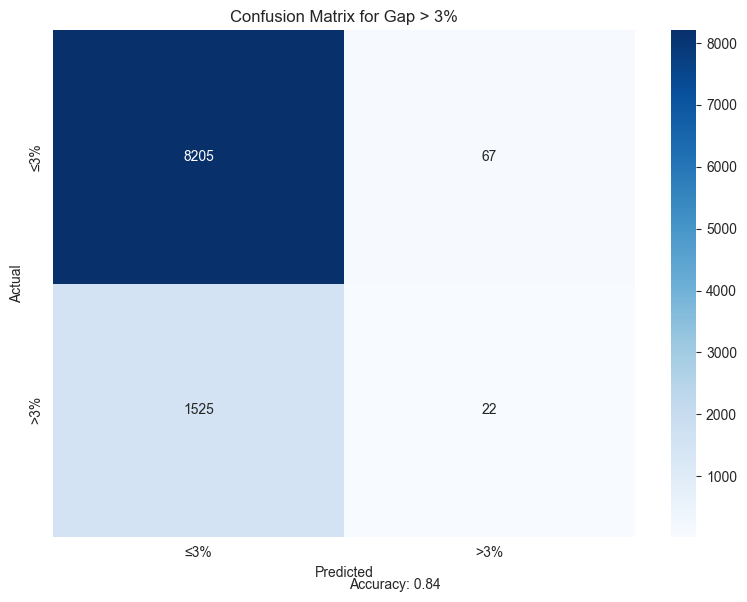

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      8272
           1       0.25      0.01      0.03      1547

    accuracy                           0.84      9819
   macro avg       0.55      0.50      0.47      9819
weighted avg       0.75      0.84      0.77      9819



In [95]:
# Calculate confusion matrix
cm = confusion_matrix(y_true_binary, y_pred_binary)
# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)

# Add labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gap > 3%')
plt.xticks([0.5, 1.5], ['≤3%', '>3%'])
plt.yticks([0.5, 1.5], ['≤3%', '>3%'])
# Add accuracy as text
accuracy = np.trace(cm) / np.sum(cm)
plt.figtext(0.5, 0.01, f'Accuracy: {accuracy:.2f}', ha='center')

plt.tight_layout()
plt.show()

# Print the classification report
print(classification_report(y_true_binary, y_pred_binary))

##### Visualizations

Although not required for the analysis, several visualizations were done using the SHAP package to better understand the relationships between the target variable and the included features. SHAP can help simplify machine learning outputs  in an intuitive and accessible manner. These visualizations were created with the intention of using some in the presentation of findings.

---------
Return to [D: Random Forest Regression Analysis](#D:-Random-Forest-Regression-Analysis) , [Table of Contents](#Table-of-Contents)

In [96]:
#Use SHAP (SHapley Additive exPlanations)
explainer = shap.TreeExplainer(best_rf_strat)

In [97]:
shap_values = explainer.shap_values(X_test_selected_strat)
X_test_shap_df = pd.DataFrame(X_test_selected_strat, columns= selected_features)

In [98]:
#Interaction values - this takes a while ( ~ 3 hr 40 min)
shap_interaction_values = explainer.shap_interaction_values(X_test_shap_df)

In [ ]:
shap_explanation = explainer(X_test_shap_df)

Waterfall plot for a single observation

This plot illustrates feature influence for a single row. The predicted gap is 2.36. The X axis shows the average value of the gap, which in this instance is 1.2. SpO2 has the greatest influence on this prediction, with age having the second-highest influence, although it moved the gap value in a negative direction. This is an example of how the features are working within the model for each observation.

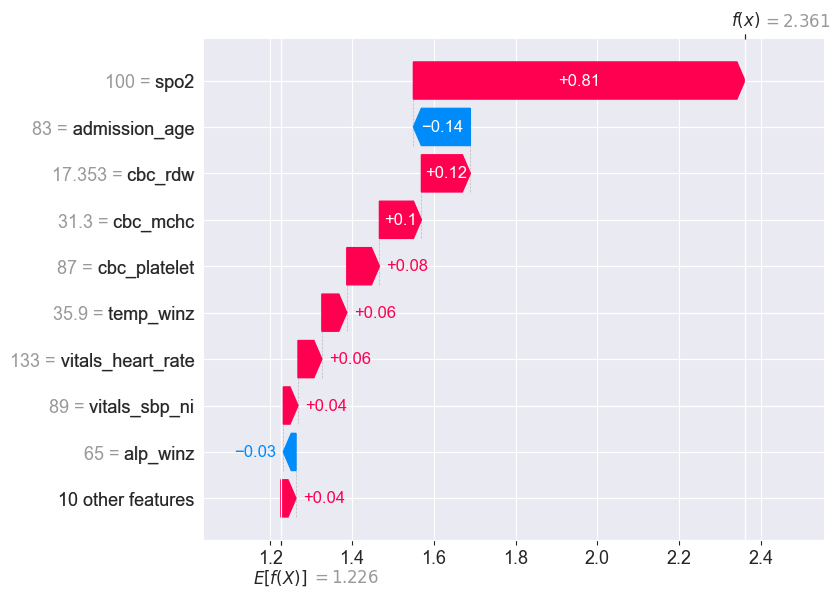

In [100]:
#Single row
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
exp = shap.Explanation(values=shap_values,
                       base_values=explainer.expected_value,
                       data=X_test_shap_df.values,
                       feature_names=X_test_shap_df.columns)

# waterfall plot
shap.plots.waterfall(exp[0])

Beeswarm plot

It can become tedious to view each observation, so a beeswarm plot allows for the interpretation of feature influence on the model as a whole. Each dot represents a specific instance from the data set. The SHAP values are shown on the X axis and explain how much each feature moves the prediction away from the baseline, with negative values decreasing the prediction, and positive values moving the prediction in a positive direction. The plot below illustrates that lower SPO2 values, which are shown in blue have a stronger negative influence on the prediction, while lower admission age has a positive influence.  This type of visualization is helpful to identify the patterns of influence of the variables.

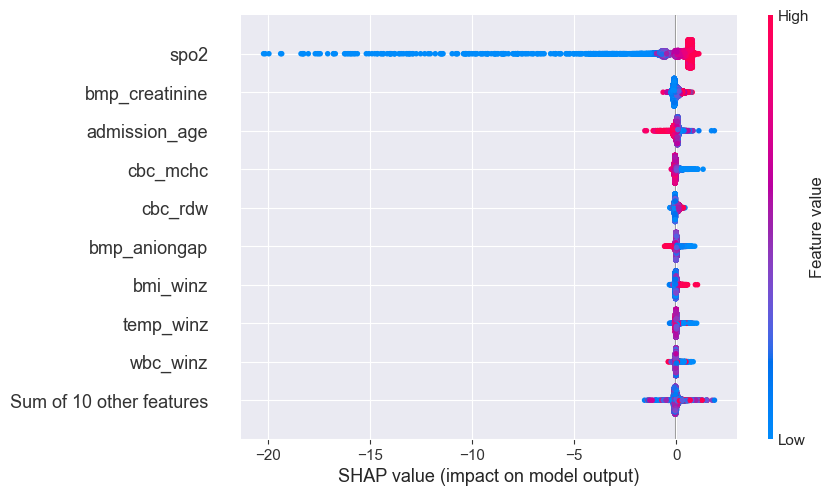

In [101]:
# Plot of the features
shap.plots.beeswarm(shap_explanation)

The bar plot below shows the strength of the influence a feature had on the prediction, regardless of the direction of that influence.

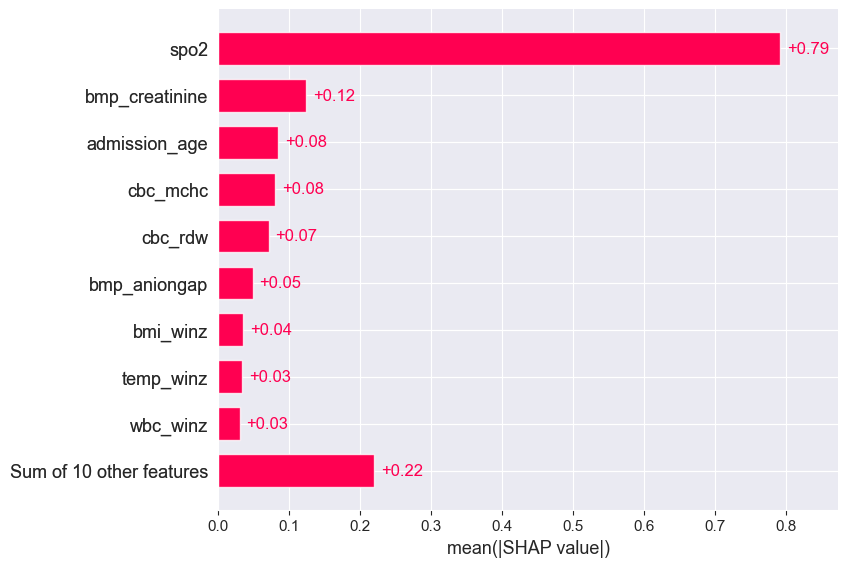

In [102]:
shap.plots.bar(shap_explanation)

An interaction matrix was created to look at more than just the relationship the features had with the target variable, but with one another. The Matrix revealed a strong relationship between SpO2 and creatinine, age and the anion gap.

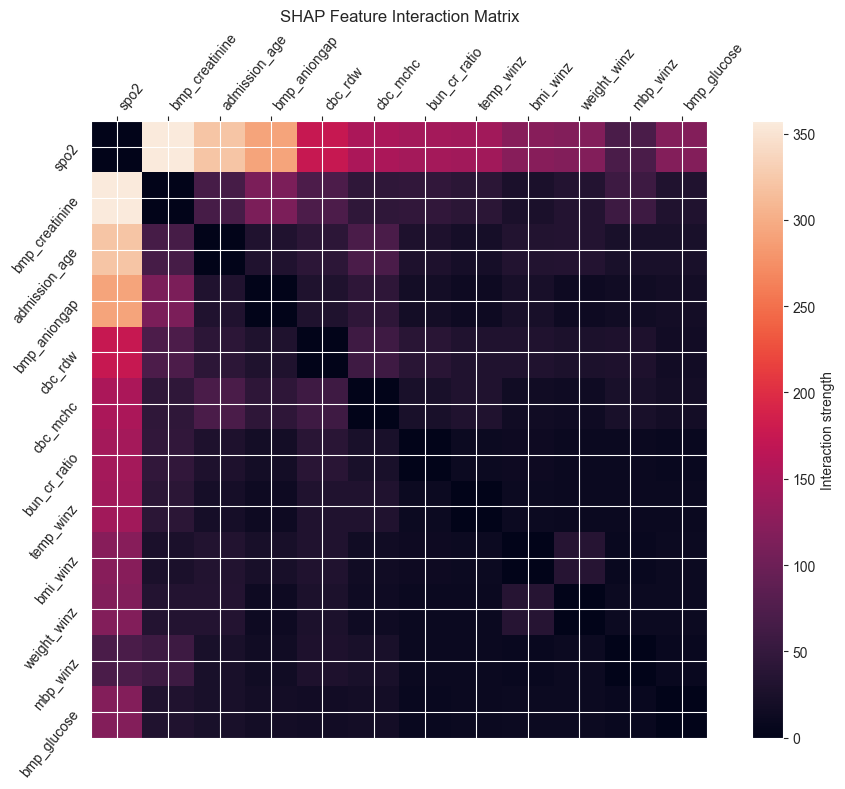

In [103]:
# Create interaction matrix
interaction_matrix = np.abs(shap_interaction_values).sum(0)

for i in range(interaction_matrix.shape[0]):
    interaction_matrix[i, i] = 0

# Get indices of top features by interaction strength
inds = np.argsort(-interaction_matrix.sum(0))[:12]
sorted_ia_matrix = interaction_matrix[inds, :][:, inds]

plt.figure(figsize=(10, 8))
plt.imshow(sorted_ia_matrix)
plt.yticks(
    range(sorted_ia_matrix.shape[0]),
    X_test_shap_df.columns[inds],
    rotation=50.4,
    horizontalalignment="right",
)
plt.xticks(
    range(sorted_ia_matrix.shape[0]),
    X_test_shap_df.columns[inds],
    rotation=50.4,
    horizontalalignment="left",
)
plt.gca().xaxis.tick_top()
plt.colorbar(label='Interaction strength')
plt.title('SHAP Feature Interaction Matrix')
plt.tight_layout()
plt.show()

The next two plots show the interaction between SpO2 and creatinine and SpO2 and age. For both of these plots, it can be noted that the variability in the amount of SHAP influence increases greatly around the 89–90% SpO2 level. This aligns clinically with lower SpO2 values having a greater chance of being incorrect when using pulse oximetry.

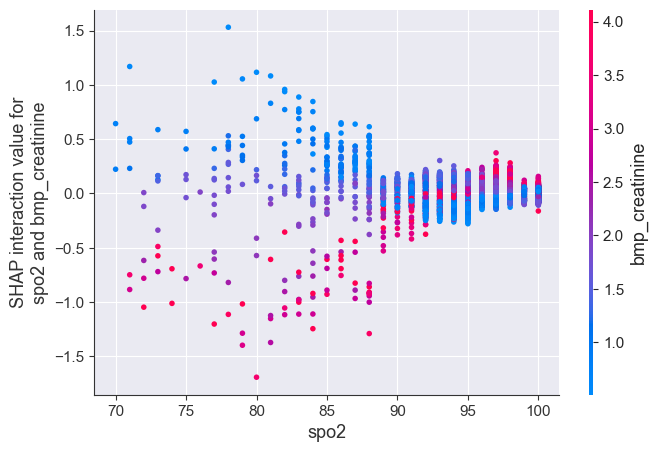

In [104]:
#SpO2 and Creatinine interaction
spo2_idx = list(X_test_shap_df.columns).index('spo2')
creatinine_idx = list(X_test_shap_df.columns).index('bmp_creatinine')
shap.dependence_plot((spo2_idx, creatinine_idx), shap_interaction_values, X_test_shap_df)

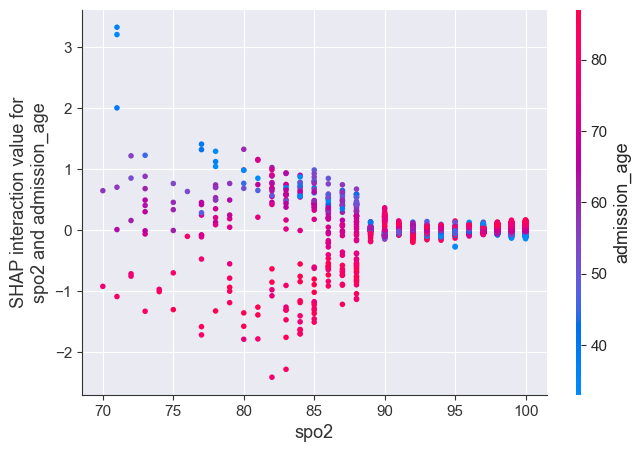

In [105]:
#SpO2 and Age interaction
age_idx = list(X_test_shap_df.columns).index('admission_age')
shap.dependence_plot((spo2_idx, age_idx), shap_interaction_values, X_test_shap_df)

The dependence between SpO2 and age was also explored. Similar to the two plots above, there is increased variability with the SHAP influence as the SpO2 values decrease. There is also a notable change in which direction the variability occurs at approximately age 70. Again, this matches clinically since people have lower oxygen carrying levels as they age.

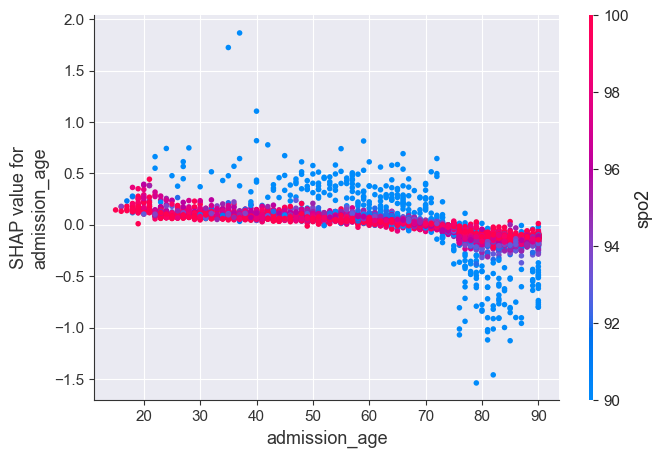

In [106]:
# Explore age
shap.dependence_plot(age_idx, shap_values, X_test_shap_df)

### Appendix: Random Forest with SMOTER Oversampling
-------------------------------

In [107]:
# Combine X_train_imputed_df and y_train into single dataframe
# smogn.smoter expects a single dataframe features and target
train_data = X_train_imputed_df.copy()
train_data['gap'] = y_train

In [108]:
#Apply SMOTER (time ~ 6 hr)
synthesized_data = smogn.smoter(
    data=train_data,
    y='gap',  # target column
    k=5,
    samp_method='extreme',
    rel_thres=0.3,
    rel_method='auto',
    rel_xtrm_type='high',
    rel_coef=0.8,
    rel_ctrl_pts_rg=None
)

# Extract features and target from synthesized data
X_train_smoter = synthesized_data.drop('gap', axis=1)
y_train_smoter = synthesized_data['gap']

r_index: 100%|##########| 8162/8162 [00:05<00:00, 1363.67it/s]


In [109]:
# Save X and y separately to reload if needed later
X_train_smoter.to_csv('X_train_smoter.csv', index=False)
y_train_smoter.to_csv('y_train_smoter.csv', index=False)

In [ ]:
# to load:
# X_train_smoter = pd.read_csv('X_train_smoter.csv')
# y_train_smoter = pd.read_csv('y_train_smoter.csv', squeeze=True)  # squeeze=True to get a Series


In [110]:
X_train_smoter.shape

(46011, 37)

In [111]:
y_train_smoter.shape

(46011,)

In [113]:
# Get percentage of samples with gap ≤ 3 (target value)
before_target_pct = (train_data['gap'] <= 3).mean() * 100
after_target_pct = (synthesized_data['gap'] <= 3).mean() * 100

# Print simple summary
print("Gap ≤ 3:")
print(f"  Before SMOTER: {before_target_pct:.2f}%")
print(f"  After SMOTER: {after_target_pct:.2f}%")
print(f"  Change: {after_target_pct - before_target_pct:.2f} percentage points")

# Simple comparison of data sizes
print("\nDataset Sizes:")
print(f"  Original training data: {len(train_data)} samples")
print(f"  After SMOTER: {len(synthesized_data)} samples")
print(f"  Change: {len(synthesized_data) - len(train_data)} samples")

Gap ≤ 3:
  Before SMOTER: 84.31%
  After SMOTER: 50.44%
  Change: -33.86 percentage points

Dataset Sizes:
  Original training data: 39274 samples
  After SMOTER: 46011 samples
  Change: 6737 samples


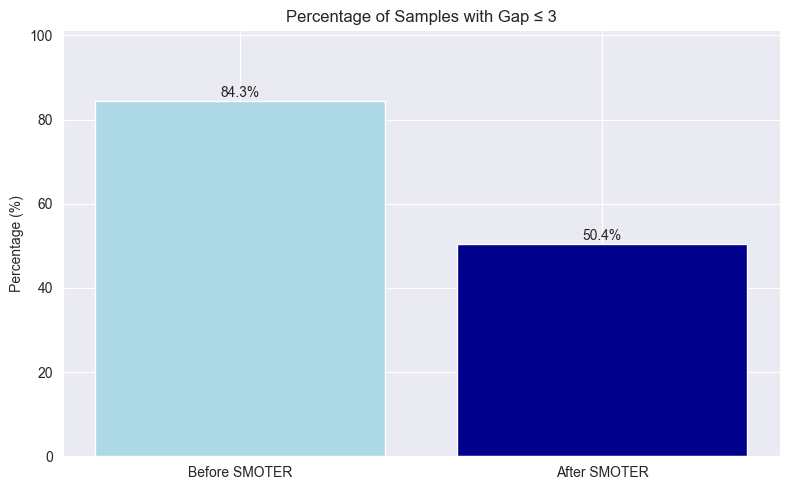

In [114]:
# Data for visualization
labels = ['Before SMOTER', 'After SMOTER']
target_pct = [before_target_pct, after_target_pct]

# Create simple bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, target_pct, color=['lightblue', 'darkblue'])

# Add percentages on top of bars
for i, v in enumerate(target_pct):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center')

# Add title and labels
plt.title('Percentage of Samples with Gap ≤ 3')
plt.ylabel('Percentage (%)')
plt.ylim(0, max(target_pct) * 1.2)  # Set y limit with some headroom

plt.tight_layout()
plt.show()

In [115]:
# Initialize and build a Random forest model for SMOTER Data
rfr = RandomForestRegressor(
    n_estimators=100,
    max_features="sqrt",  # Square root of the number of features for a regression task
    random_state=42,
    oob_score=True
)
rfr.fit(X_train_smoter, y_train_smoter)
y_pred_rfr = rfr.predict(X_test_imputed_df)

[Text(0.5, 0.9, 'spo2 <= 84.036\nsquared_error = 12.673\nsamples = 29107\nvalue = 2.845'),
 Text(0.25, 0.7, 'cbc_hemoglobin <= 12.95\nsquared_error = 104.962\nsamples = 279\nvalue = -8.311'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'spo2 <= 74.5\nsquared_error = 99.306\nsamples = 212\nvalue = -9.674'),
 Text(0.0625, 0.3, 'bmp_calcium <= 8.454\nsquared_error = 63.457\nsamples = 21\nvalue = -21.21'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'cbc_mch <= 30.197\nsquared_error = 88.211\nsamples = 191\nvalue = -8.517'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'spo2 <= 79.357\nsquared_error = 98.358\nsamples = 67\nvalue = -3.996'),
 Text(0.3125, 0.3, 'ast_winz <= 48.0\nsquared_error = 120.949\nsamples = 24\nvalue = -10.035'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'admission_age <= 75.5\nsquared_error = 47.201\nsamples = 43\

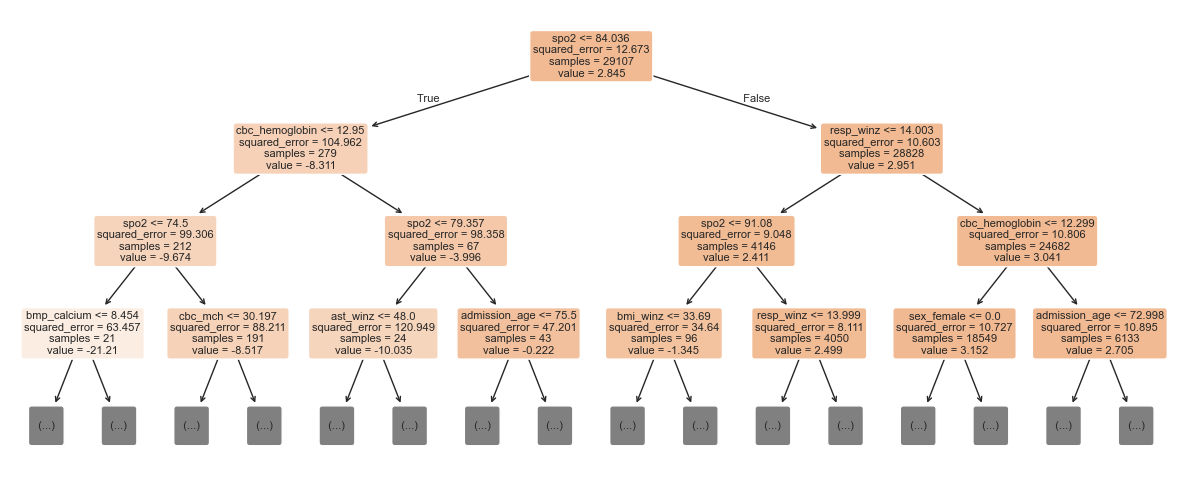

In [116]:
# A visualization of the first tree
feature_names = X_train_smoter.columns.tolist()

# Extract the first tree from RFR model
first_tree = rfr.estimators_[0]
plt.figure(figsize=(15,6))
tree.plot_tree(first_tree,
               feature_names=feature_names,
               fontsize=8,
               filled=True,
               rounded=True,
               max_depth=3)

In [117]:
#Evaluation metrics
mse = round(mean_squared_error(y_test, y_pred_rfr), 2)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred_rfr)), 2)  # Calculate RMSE

# View accuracy score
print("Mean Absolute Error:", round(mean_absolute_error(y_test, y_pred_rfr), 2))
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", round(r2_score(y_test, y_pred_rfr), 4))


Mean Absolute Error: 3.14
Mean Squared Error: 16.79
Root Mean Squared Error: 4.1
R² Score: -0.1658


In [118]:
# Select features using only training data to reduce data leakage
selector = SelectFromModel(rfr, threshold="median")
selector.fit(X_train_smoter, y_train_smoter)

# Get selected feature names
selected_features = X_train_smoter.columns[selector.get_support()]
print(f"Selected {len(selected_features)} features out of {X_train_smoter.shape[1]}")
print(selected_features.tolist())

# Transform data to use only selected features
X_train_selected = selector.transform(X_train_smoter)
X_test_selected = selector.transform(X_test_imputed_df)

Selected 19 features out of 37
['admission_age', 'spo2', 'vitals_heart_rate', 'vitals_sbp_ni', 'cbc_mchc', 'cbc_platelet', 'cbc_rdw', 'bmp_bun', 'bmp_creatinine', 'bmp_glucose', 'weight_winz', 'bmi_winz', 'resp_winz', 'mbp_winz', 'temp_winz', 'wbc_winz', 'alt_winz', 'alp_winz', 'ast_winz']


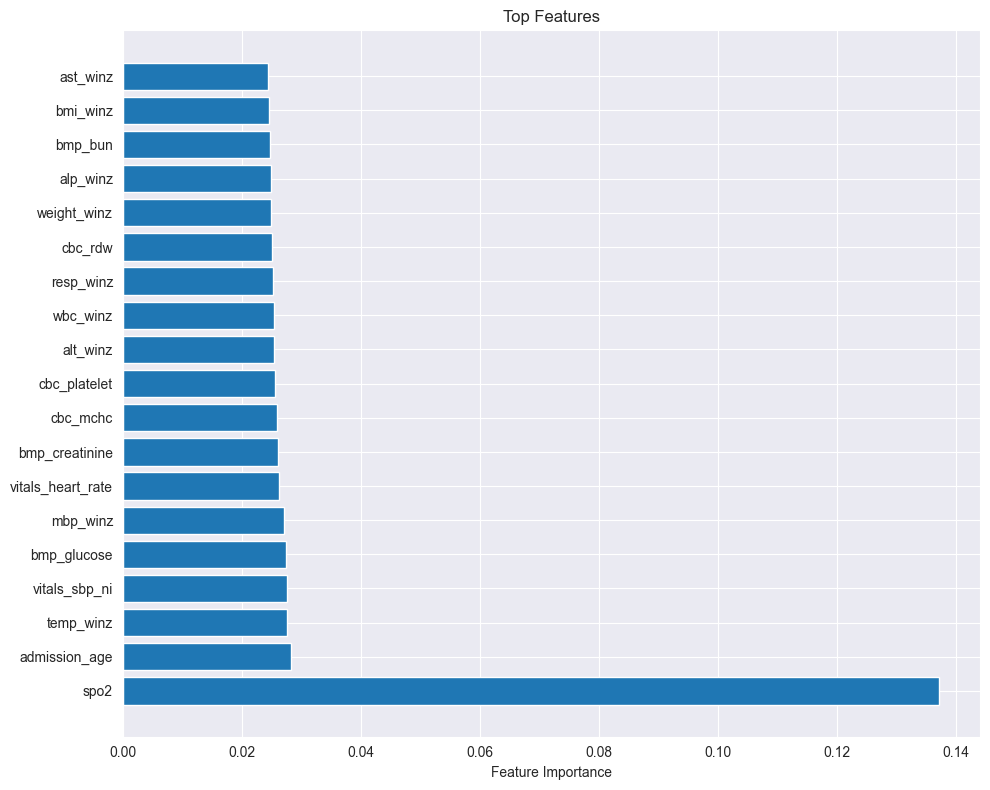

In [119]:
# Get feature importance
importances = rfr.feature_importances_
feature_names = X_train_smoter.columns
indices = np.argsort(importances)[::-1]

# Plot only top features
plt.figure(figsize=(10, 8))
plt.barh(range(19), importances[indices][:19])
plt.yticks(range(19), [feature_names[i] for i in indices[:19]])
plt.xlabel('Feature Importance')
plt.title('Top Features')
plt.tight_layout()
plt.show()

> **Note**: The output from this code is _tracking_ of the process, _not an error_.

In [120]:
# Define the objective function for Optuna (~ 10 hr 15 min)
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 800),
        'max_depth': trial.suggest_int('max_depth', 10, 80, log=True),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', 0.5, None]),
        'max_samples': trial.suggest_categorical('max_samples', [0.7, 0.9, None])
    }

    rf = RandomForestRegressor(**params, random_state=42)
    score = cross_val_score(
        rf,
        X_train_selected,
        y_train_smoter,
        cv=3,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    # Convert MSE to RMSE
    return np.sqrt(-np.mean(score))  # Square root of MSE = RMSE

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2025-03-31 23:18:53,974] A new study created in memory with name: no-name-2e19b5cf-271f-4140-b2a6-ca10130daebf
[I 2025-03-31 23:19:23,481] Trial 0 finished with value: 3.437134039861393 and parameters: {'n_estimators': 264, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 0.5, 'max_samples': None}. Best is trial 0 with value: 3.437134039861393.
[I 2025-03-31 23:19:42,088] Trial 1 finished with value: 3.3312001661434807 and parameters: {'n_estimators': 232, 'max_depth': 43, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.7}. Best is trial 1 with value: 3.3312001661434807.
[I 2025-03-31 23:21:08,485] Trial 2 finished with value: 3.2428630157702356 and parameters: {'n_estimators': 437, 'max_depth': 25, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 0.5, 'max_samples': 0.9}. Best is trial 2 with value: 3.2428630157702356.
[I 2025-03-31 23:22:08,652] Trial 3 finished with value: 3.3096582641204417 and

Best trial:
  Value: 3.189528794222912
  Params: 
    n_estimators: 775
    max_depth: 74
    min_samples_split: 6
    min_samples_leaf: 3
    max_features: None
    max_samples: 0.9


In [121]:
# Save the completed study
joblib.dump(study, 'optuna_study.pkl')

# To load it later:
# loaded_study = joblib.load('optuna_study.pkl')

['optuna_study.pkl']

In [122]:
# Train the best model on the full training set
best_params = study.best_params
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train_selected, y_train_smoter)

RandomForestRegressor(max_depth=74, max_features=None, max_samples=0.9,
                      min_samples_leaf=3, min_samples_split=6, n_estimators=775,
                      random_state=42)

In [123]:
# Make predictions
y_pred_optuna = best_rf.predict(X_test_selected)

In [124]:
#Evaluation metrics
mse_optuna = round(mean_squared_error(y_test, y_pred_optuna), 2)
rmse_optuna = round(np.sqrt(mean_squared_error(y_test, y_pred_optuna)), 2)
# View accuracy scores
print("Mean Absolute Error:", round(mean_absolute_error(y_test, y_pred_optuna), 2))
print("Mean Squared Error:", mse_optuna)
print("Root Mean Squared Error:", rmse_optuna)
print("R² Score:", round(r2_score(y_test, y_pred_optuna), 4))

Mean Absolute Error: 2.38
Mean Squared Error: 12.08
Root Mean Squared Error: 3.48
R² Score: 0.1614


##### Comparison of SMOTER basic and final model

| Metric | Initial | Final  |
|--------|---------|--------|
| Mean Absolute Error | 3.14    | 2.38   |
| Mean Squared Error | 16.79   | 12.08  |
| Root Mean Squared Error | 4.1     | 3.48   |
| R² Score | -0.1658 | 0.1614 |


Return to [Table of Contents](#Table-of-Contents)

## F: Sources
-----------

Brownlee, J. (2020, August 15). _Data Leakage in Machine Learning._ Machine Learning Mastery. Retrieved February 15, 2025, from https://machinelearningmastery.com/data-leakage-machine-learning/

Grippi, M. A., MD (2020, December 4). _How to calculate the total oxygen content of arterial blood._ MedMastery. Retrieved February 15, 2025, from https://www.medmastery.com/guides/blood-gas-analysis-clinical-guide/how-calculate-total-oxygen-content-arterial-blood

Horsch, A. (2021, February 15). _Detecting and Treating Outliers In Python – Part 3._ Towards Data Science. Retrieved February 1, 2025, from https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-3-dcb54abaf7b0/

Kunz, N. (2020). _SMOGN: Synthetic Minority Over-Sampling Technique for Regression with Gaussian Noise (Version 0.1.2)_ [Computer software]. PyPI. Retrieved February 20, 2025, from https://pypi.org/project/smogn/

Preferred Networks, Inc. (2024). _Optuna - A hyperparameter optimization framework._ Optuna. Retrieved February 15, 2025, from https://optuna.org/

McKinney, W. (2022). _Python for Data Analysis_ (3rd ed.). O'Reilly.

Molnar, C. (2025). _Interpretable machine learning: A guide for making black box models explainable_ (3rd ed.). Retrieved March 15, 2025 from https://christophm.github.io/interpretable-ml-book/

National Institutes of Health, National Heart, Lung, and Blood Institute. (2025). ARDSNet Protocol Card. Retrieved February 15, 2025,  from https://icu.smhs.gwu.edu/sites/g/files/zaskib1161/files/2025-01/ardsnet_protocol_card.pdf

Roepke , B. (2024, March 5). _Don’t Get Caught in the Trap of Imbalanced Data When Building a Model._ Data Knows All. Retrieved February 20, 2025, from https://dataknowsall.com/blog/imbalanced.html

Sjoding, M. W., Iwashyna, T. J., & Valley, T. S. (2023). _Change the framework for pulse oximeter regulation to ensure clinicians can give patients the oxygen they need._ American journal of respiratory and critical care medicine, 207(6), 661-664.

Varshney, P. (2023, February 28). _Q-Q Plots Explained._ BuiltIn. Retrieved February 25, 2025, from https://builtin.com/data-science/q-q-plot

Wong AI, Charpignon M, Kim H, et al. _Analysis of Discrepancies Between Pulse Oximetry and Arterial Oxygen Saturation Measurements by Race and Ethnicity and Association With Organ Dysfunction and Mortality._ JAMA Netw Open. 2021;4(11):e2131674. doi:10.1001/jamanetworkopen.2021.31674
